In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
# Directory of the catalog: where the catalog is located
# 1 = cosweb
# 2 = ceers
# 3 = fresco
# 4 = primer

#cat_dir = '/Users/abdurrouf/Research/students_projects/ITB/JWST_projects/catalogs/ngdeep/'
cat_eazy1 = fits.open('cosweb-grizli-v6.0-fix.eazypy.zout.fits')
cat_eazy2 = fits.open('ceers-full-grizli-v6.0-fix.eazypy.zout.fits')
cat_eazy3 = fits.open('gds-grizli-v6.1-fix.eazypy.zout.fits')
cat_eazy4 = fits.open('sub-primer-uds-grizli-v6.0-fix.eazypy.zout.fits')

# get the catalog data
cat_eazy_data1 = cat_eazy1[1].data
cat_eazy_data2 = cat_eazy2[1].data
cat_eazy_data3 = cat_eazy3[1].data
cat_eazy_data4 = cat_eazy4[1].data

# Right ascension and declination
ra1 = cat_eazy_data1['ra']
dec1 = cat_eazy_data1['dec']

ra2 = cat_eazy_data2['ra']
dec2 = cat_eazy_data2['dec']

ra3 = cat_eazy_data3['ra']
dec3 = cat_eazy_data3['dec']

ra4 = cat_eazy_data4['ra']
dec4 = cat_eazy_data4['dec']

# redshifts: spectroscopic and photometric redshifts
z_spec1 = cat_eazy_data1['z_spec']
z_phot1 = cat_eazy_data1['z_phot']

z_spec2 = cat_eazy_data2['z_spec']
z_phot2 = cat_eazy_data2['z_phot']

z_spec3 = cat_eazy_data3['z_spec']
z_phot3 = cat_eazy_data3['z_phot']

z_spec4 = cat_eazy_data4['z_spec']
z_phot4 = cat_eazy_data4['z_phot']

# rest-frame magnitudes in U, V, and J bands
restU1 = cat_eazy_data1['restU']
restV1 = cat_eazy_data1['restV']
restJ1 = cat_eazy_data1['restJ']

restU2 = cat_eazy_data2['restU']
restV2 = cat_eazy_data2['restV']
restJ2 = cat_eazy_data2['restJ']

restU3 = cat_eazy_data3['restU']
restV3 = cat_eazy_data3['restV']
restJ3 = cat_eazy_data3['restJ']

restU4 = cat_eazy_data4['restU']
restV4 = cat_eazy_data4['restV']
restJ4 = cat_eazy_data4['restJ']

# stellar mass (SM) and star formation rate (SFR)
SM1 = cat_eazy_data1['mass']
SFR1 = cat_eazy_data1['sfr']

SM2 = cat_eazy_data2['mass']
SFR2 = cat_eazy_data2['sfr']

SM3 = cat_eazy_data3['mass']
SFR3 = cat_eazy_data3['sfr']

SM4 = cat_eazy_data4['mass']
SFR4 = cat_eazy_data4['sfr']

z_phot = np.concatenate((z_phot1, z_phot2, z_phot3, z_phot4))
SM = np.concatenate((SM1, SM2, SM3, SM4))

cat_eazy1.close()
cat_eazy2.close()
cat_eazy3.close()
cat_eazy4.close()

In [2]:
cat_photo1 = fits.open('cosweb-grizli-v6.0-fix_phot_apcorr.fits')
cat_photo2 = fits.open('ceers-full-grizli-v6.0-fix_phot_apcorr.fits')
cat_photo3 = fits.open('gds-grizli-v6.1-fix_phot_apcorr.fits')
cat_photo4 = fits.open('sub-primer-uds-grizli-v6.0-fix_phot_apcorr.fits')

# get the catalog data
cat_photo_data1 = cat_photo1[1].data
cat_photo_data2 = cat_photo2[1].data
cat_photo_data3 = cat_photo3[1].data
cat_photo_data4 = cat_photo4[1].data

# check the list of filters and their names from the header information printed above
filter_names1 = ['f105w', 'f110w','f115w', 'f125w', 'f140w', 'f150w', 'f160w', 'f277w',
                'f350lpu', 'f435w', 'f444w', 'f475w', 'f606w', 'f814w', 'f850lp']
filter_names2 = ['f105w', 'f115w', 'f125w', 'f140w', 'f150w', 'f160w', 'f200w', 'f277w',
                'f356w', 'f410m', 'f435w', 'f444w', 'f606w', 'f606wu', 'f814w']
filter_names3 = ['f090w', 'f105w', 'f110w', 'f115w', 'f125w', 'f140w', 'f150w', 'f160w', 'f182m', 'f200w', 'f210m', 'f277w',
                'f335m', 'f356w', 'f410m', 'f430m', 'f435w', 'f444w', 'f460m', 'f475w', 'f480m', 'f606w', 'f606wu', 'f775w', 
                'f814w', 'f814wu', 'f850lp', 'f850lpu']
filter_names4 = ['f090w', 'f105w', 'f115w', 'f125w', 'f140w', 'f150w', 'f160w', 'f200w', 'f277w',
                'f350lpu', 'f356w', 'f410m', 'f435w', 'f444w', 'f606w', 'f775w', 'f814w', 'f850lp']
nfilters1 = len(filter_names1)
nfilters2 = len(filter_names2)
nfilters3 = len(filter_names3)
nfilters4 = len(filter_names4)
print ('Number of filters: %d' % nfilters1)
print ('Number of filters: %d' % nfilters2)
print ('Number of filters: %d' % nfilters3)
print ('Number of filters: %d' % nfilters4)

# get central wavelength of the filters
filter_cwave1 = np.zeros(nfilters1)
for bb in range(nfilters1):
    filter_cwave1[bb] = cat_photo1[1].header[filter_names1[bb]+'_PLAM']

filter_cwave2 = np.zeros(nfilters2)
for bb in range(nfilters2):
    filter_cwave2[bb] = cat_photo2[1].header[filter_names2[bb]+'_PLAM']

filter_cwave3 = np.zeros(nfilters3)
for bb in range(nfilters3):
    filter_cwave3[bb] = cat_photo3[1].header[filter_names3[bb]+'_PLAM']

filter_cwave4 = np.zeros(nfilters4)
for bb in range(nfilters4):
    filter_cwave4[bb] = cat_photo4[1].header[filter_names4[bb]+'_PLAM']
    
flux1 = pd.read_csv('flux1.csv')
flux_err1 = pd.read_csv('flux_err1.csv')
flux2 = pd.read_csv('flux2.csv')
flux_err2 = pd.read_csv('flux_err2.csv')
flux3 = pd.read_csv('flux3.csv')
flux_err3 = pd.read_csv('flux_err3.csv')
flux4 = pd.read_csv('flux4.csv')
flux_err4 = pd.read_csv('flux_err4.csv')

ABmag1 = pd.read_csv('ABmag1.csv')
ABmag2 = pd.read_csv('ABmag2.csv')
ABmag3 = pd.read_csv('ABmag3.csv')
ABmag4 = pd.read_csv('ABmag4.csv')

Number of filters: 15
Number of filters: 15
Number of filters: 28
Number of filters: 18


In [37]:
import glob
from piXedfit.piXedfit_fitting import get_bestfit_params
from piXedfit.piXedfit_analysis import plot_SED
from piXedfit.piXedfit_analysis import plot_corner
from piXedfit.piXedfit_analysis import plot_sfh_mcmc

# Search for files in the same directory as the script
files = glob.glob("*_pixedfit_mcmc_*.fits")
list_id1 = []
list_id2 = []
list_id3 = []
list_id4 = []

mass_pixedfit1 = []
sfr_pixedfit1 = []
mw_age1 = []
metal1 = []

mass_pixedfit2 = []
sfr_pixedfit2 = []
mw_age2 = []
metal2 = []

mass_pixedfit3 = []
sfr_pixedfit3 = []
mw_age3 = []
metal3 = []

mass_pixedfit4 = []
sfr_pixedfit4 = []
mw_age4 = []
metal4 = []

mass_eazy1 = []
sfr_eazy1 = []

mass_eazy2 = []
sfr_eazy2 = []

mass_eazy3 = []
sfr_eazy3 = []

mass_eazy4 = []
sfr_eazy4 = []

not_quiescent1 = [495, 714, 716, 1153, 1252, 1617, 3565, 3973, 4127, 4245, 4367, 4582, 4616, 4670, 5083, 5493, 5952, 6513, 6864, 7838, 8103, 8407, 8884, 8885, 9039, 9426, 9673, 9800, 9938, 9953, 9987, 11242, 11617, 11768, 12333, 12851, 13214, 13223, 13895, 14201, 14248, 14521, 14748, 14788, 15332, 16255, 18104, 18105, 18693, 19135, 19368, 19924, 20947, 21561, 22679, 22724, 23294, 24131, 24321, 24336, 24830, 24878, 25132, 25835, 25967, 26316, 26875, 28366, 28586, 28832, 29064, 29069]

# Extract and print the id numbers without the '.fits' extension
for file in files:
    # Remove the '.fits' extension
    file_without_extension = file[:-5]  # Assumes '.fits' is always 5 characters
    # Split the filename using "_" as the separator
    parts = file_without_extension.split("_")

    # Extract the id (assuming it's the third part of the filename)

    if 'ceers' in file:
        id_number = int(parts[4])
        list_id2.append(id_number-1)

        mass_eazy2.append(SM2[id_number-1])
        sfr_eazy2.append(SFR2[id_number-1])

        params, bfit_params = get_bestfit_params(file)
        mass_pixedfit2.append(bfit_params['log_mass'])
        sfr_pixedfit2.append(bfit_params['log_sfr'])
        mw_age2.append(bfit_params['log_mw_age'])
        metal2.append(bfit_params['logzsol'])

    elif 'fresco' in file:
        id_number = int(parts[4])
        list_id3.append(id_number-1)

        mass_eazy3.append(SM3[id_number-1])
        sfr_eazy3.append(SFR3[id_number-1])

        params, bfit_params = get_bestfit_params(file)
        mass_pixedfit3.append(bfit_params['log_mass'])
        sfr_pixedfit3.append(bfit_params['log_sfr'])
        mw_age3.append(bfit_params['log_mw_age'])
        metal3.append(bfit_params['logzsol'])

    elif 'primer' in file:
        id_number = int(parts[4])
        list_id4.append(id_number-1)

        mass_eazy4.append(SM4[id_number-1])
        sfr_eazy4.append(SFR4[id_number-1])

        params, bfit_params = get_bestfit_params(file)
        mass_pixedfit4.append(bfit_params['log_mass'])
        sfr_pixedfit4.append(bfit_params['log_sfr'])
        mw_age4.append(bfit_params['log_mw_age'])
        metal4.append(bfit_params['logzsol'])

    else:
        id_number = int(parts[3])
        
        if (id_number-1) not in not_quiescent1:
            
            list_id1.append(id_number-1)

            mass_eazy1.append(SM1[id_number-1])
            sfr_eazy1.append(SFR1[id_number-1])

            params, bfit_params = get_bestfit_params(file)
            mass_pixedfit1.append(bfit_params['log_mass'])
            sfr_pixedfit1.append(bfit_params['log_sfr'])
            mw_age1.append(bfit_params['log_mw_age'])
            metal1.append(bfit_params['logzsol'])

mass_pixedfit1 = np.array(mass_pixedfit1)
sfr_pixedfit1 = np.array(sfr_pixedfit1)
mw_age1 = np.array(mw_age1)
metal1 = np.array(metal1)

mass_pixedfit2 = np.array(mass_pixedfit2)
sfr_pixedfit2 = np.array(sfr_pixedfit2)
mw_age2 = np.array(mw_age2)
metal2 = np.array(metal2)

mass_pixedfit3 = np.array(mass_pixedfit3)
sfr_pixedfit3 = np.array(sfr_pixedfit3)
mw_age3 = np.array(mw_age3)
metal3 = np.array(metal3)

mass_pixedfit4 = np.array(mass_pixedfit4)
sfr_pixedfit4 = np.array(sfr_pixedfit4)
mw_age4 = np.array(mw_age4)
metal4 = np.array(metal4)


mass_eazy1 = np.array(mass_eazy1)
sfr_eazy1 = np.array(sfr_eazy1)

mass_eazy2 = np.array(mass_eazy2)
sfr_eazy2 = np.array(sfr_eazy2)

mass_eazy3 = np.array(mass_eazy3)
sfr_eazy3 = np.array(sfr_eazy3)

mass_eazy4 = np.array(mass_eazy4)
sfr_eazy4 = np.array(sfr_eazy4)


list_id1 = np.array(list_id1)
list_id2 = np.array(list_id2)
list_id3 = np.array(list_id3)
list_id4 = np.array(list_id4)

z_sel1 = z_phot1[list_id1]
ra_sel1 = ra1[list_id1]
dec_sel1 = dec1[list_id1]

z_sel2 = z_phot2[list_id2]
ra_sel2 = ra2[list_id2]
dec_sel2 = dec2[list_id2]

z_sel3 = z_phot3[list_id3]
ra_sel3 = ra3[list_id3]
dec_sel3 = dec3[list_id3]

z_sel4 = z_phot4[list_id4]
ra_sel4 = ra4[list_id4]
dec_sel4 = dec4[list_id4]

In [38]:
n01 = len(mass_pixedfit1)
n02 = len(mass_pixedfit2)
n03 = len(mass_pixedfit3)
n04 = len(mass_pixedfit4)

In [5]:
with open('test.txt', 'w') as file:
    for i in range(len(list_id1)):
        line = f"{i+1}\t{list_id1[i]}\t{ra_sel1[i]}\t{dec_sel1[i]}\t{z_sel1[i]}\n"
        file.write(line)

In [6]:
# Open a file in write mode ('w')


with open('index_1_cosweb.txt', 'w') as file:
    for i in range(len(list_id1)):
        line = f"{i+1}\t{list_id1[i]}\t{ra_sel1[i]}\t{dec_sel1[i]}\t{z_sel1[i]}\n"
        file.write(line)

with open('index_2_ceers.txt', 'w') as file:
    for i in range(len(list_id2)):
        line = f"{i+1}\t{list_id2[i]}\t{ra_sel2[i]}\t{dec_sel2[i]}\t{z_sel2[i]}\n"
        file.write(line)

with open('index_3_fresco.txt', 'w') as file:
    for i in range(len(list_id3)):
        line = f"{i+1}\t{list_id3[i]}\t{ra_sel3[i]}\t{dec_sel3[i]}\t{z_sel3[i]}\n"
        file.write(line)

with open('index_4_primer.txt', 'w') as file:
    for i in range(len(list_id4)):
        line = f"{i+1}\t{list_id4[i]}\t{ra_sel4[i]}\t{dec_sel4[i]}\t{z_sel4[i]}\n"
        file.write(line)

In [39]:
z_sel = np.concatenate((z_sel1, z_sel2, z_sel3, z_sel4))

mass_pixedfit = np.concatenate((mass_pixedfit1, mass_pixedfit2, mass_pixedfit3, mass_pixedfit4))

sfr_pixedfit = np.concatenate((sfr_pixedfit1, sfr_pixedfit2, sfr_pixedfit3, sfr_pixedfit4))

mass_eazy = np.concatenate((mass_eazy1, mass_eazy2, mass_eazy3, mass_eazy4))

sfr_eazy = np.concatenate((sfr_eazy1, sfr_eazy2, sfr_eazy3, sfr_eazy4))

mw_age = np.concatenate((mw_age1, mw_age2, mw_age3, mw_age4))

metal = np.concatenate((metal1, metal2, metal3, metal4))

In [46]:
len(mass_pixedfit[:,2])

522

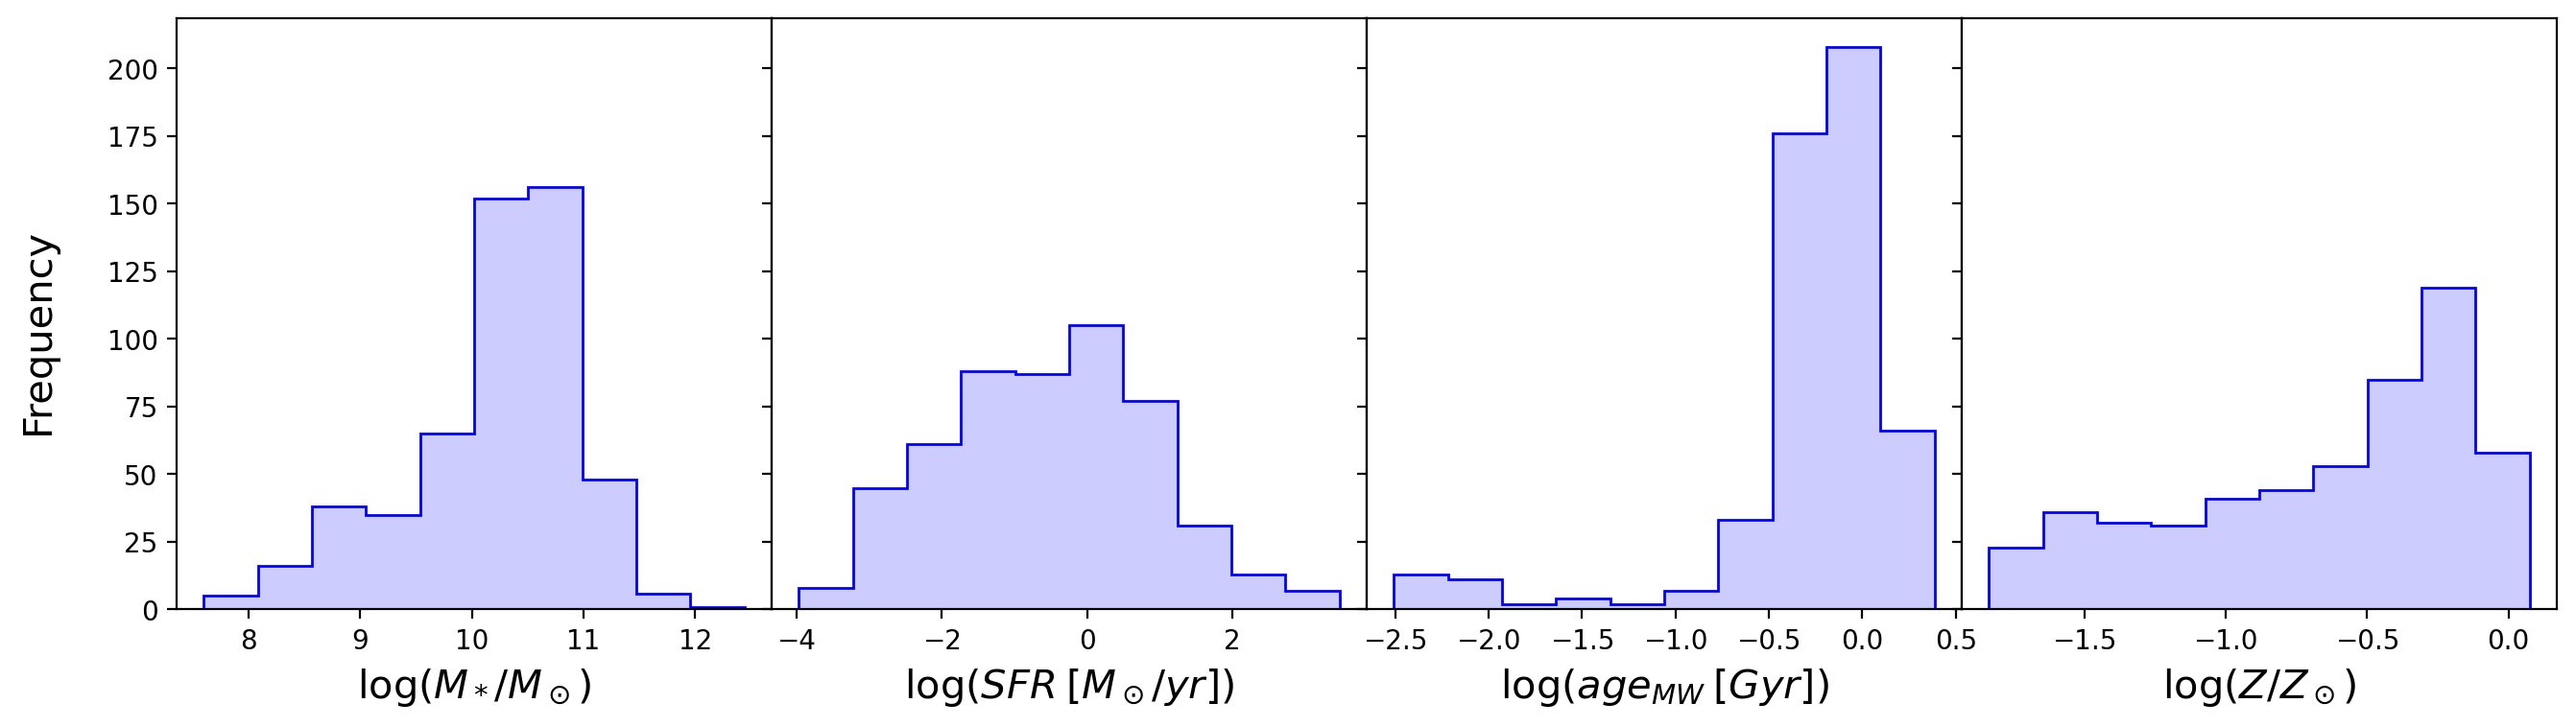

In [76]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), dpi=200, sharey='row')

ax1.hist(mass_pixedfit[:,1], color='blue', histtype='step')
ax1.hist(mass_pixedfit[:,1], color='blue', alpha=0.2)
ax1.set_xlabel(r'$\log(M_*/M_\odot)$', size=15)

ax2.hist(sfr_pixedfit[:,1], color='blue', histtype='step')
ax2.hist(sfr_pixedfit[:,1], color='blue', alpha=0.2)
ax2.set_xlabel(r'$\log(SFR\: [M_\odot/yr])$', size=15)

ax3.hist(mw_age[:,1], color='blue', histtype='step')
ax3.hist(mw_age[:,1], color='blue', alpha=0.2)
ax3.set_xlabel(r'$\log(age_{MW}\: [Gyr])$', size=15)

ax4.hist(metal[:,1], color='blue', histtype='step')
ax4.hist(metal[:,1], color='blue', alpha=0.2)
ax4.set_xlabel(r'$\log(Z/Z_\odot)$', size=15)

'''
ax1.errorbar(np.log10(mass_eazy), mass_mid, yerr=[mass_low_error, mass_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax1.plot(mass,mass,c='red', linestyle='--')
ax1.set_xlabel(r'$\log(M_*\: [M_\odot])$ (EAZY)')

ax2.errorbar(np.log10(sfr_eazy), sfr_mid, yerr=[sfr_low_error, sfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax2.plot(sfr,sfr,c='red', linestyle='--')
ax2.set_ylabel(r'$\log(SFR\: [M_\odot\: yr^{-1}])$ (piXedfit)')
ax2.set_xlabel(r'$\log(SFR\: [M_\odot\: yr^{-1}])$ (EAZY)')

ax3.errorbar(np.log10(sfr_eazy/mass_eazy), ssfr_mid, yerr=[ssfr_low_error, ssfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax3.plot(ssfr,ssfr,c='red', linestyle='--')
ax3.set_ylabel(r'$\log(sSFR\: [yr^{-1}])$ (piXedfit)')
ax3.set_xlabel(r'$\log(sSFR\: [yr^{-1}])$ (EAZY)')
'''

plt.subplots_adjust(wspace=0)
fig.text(0.08, 0.35, r'Frequency', rotation=90, ha='center', fontsize=15)

plt.show()

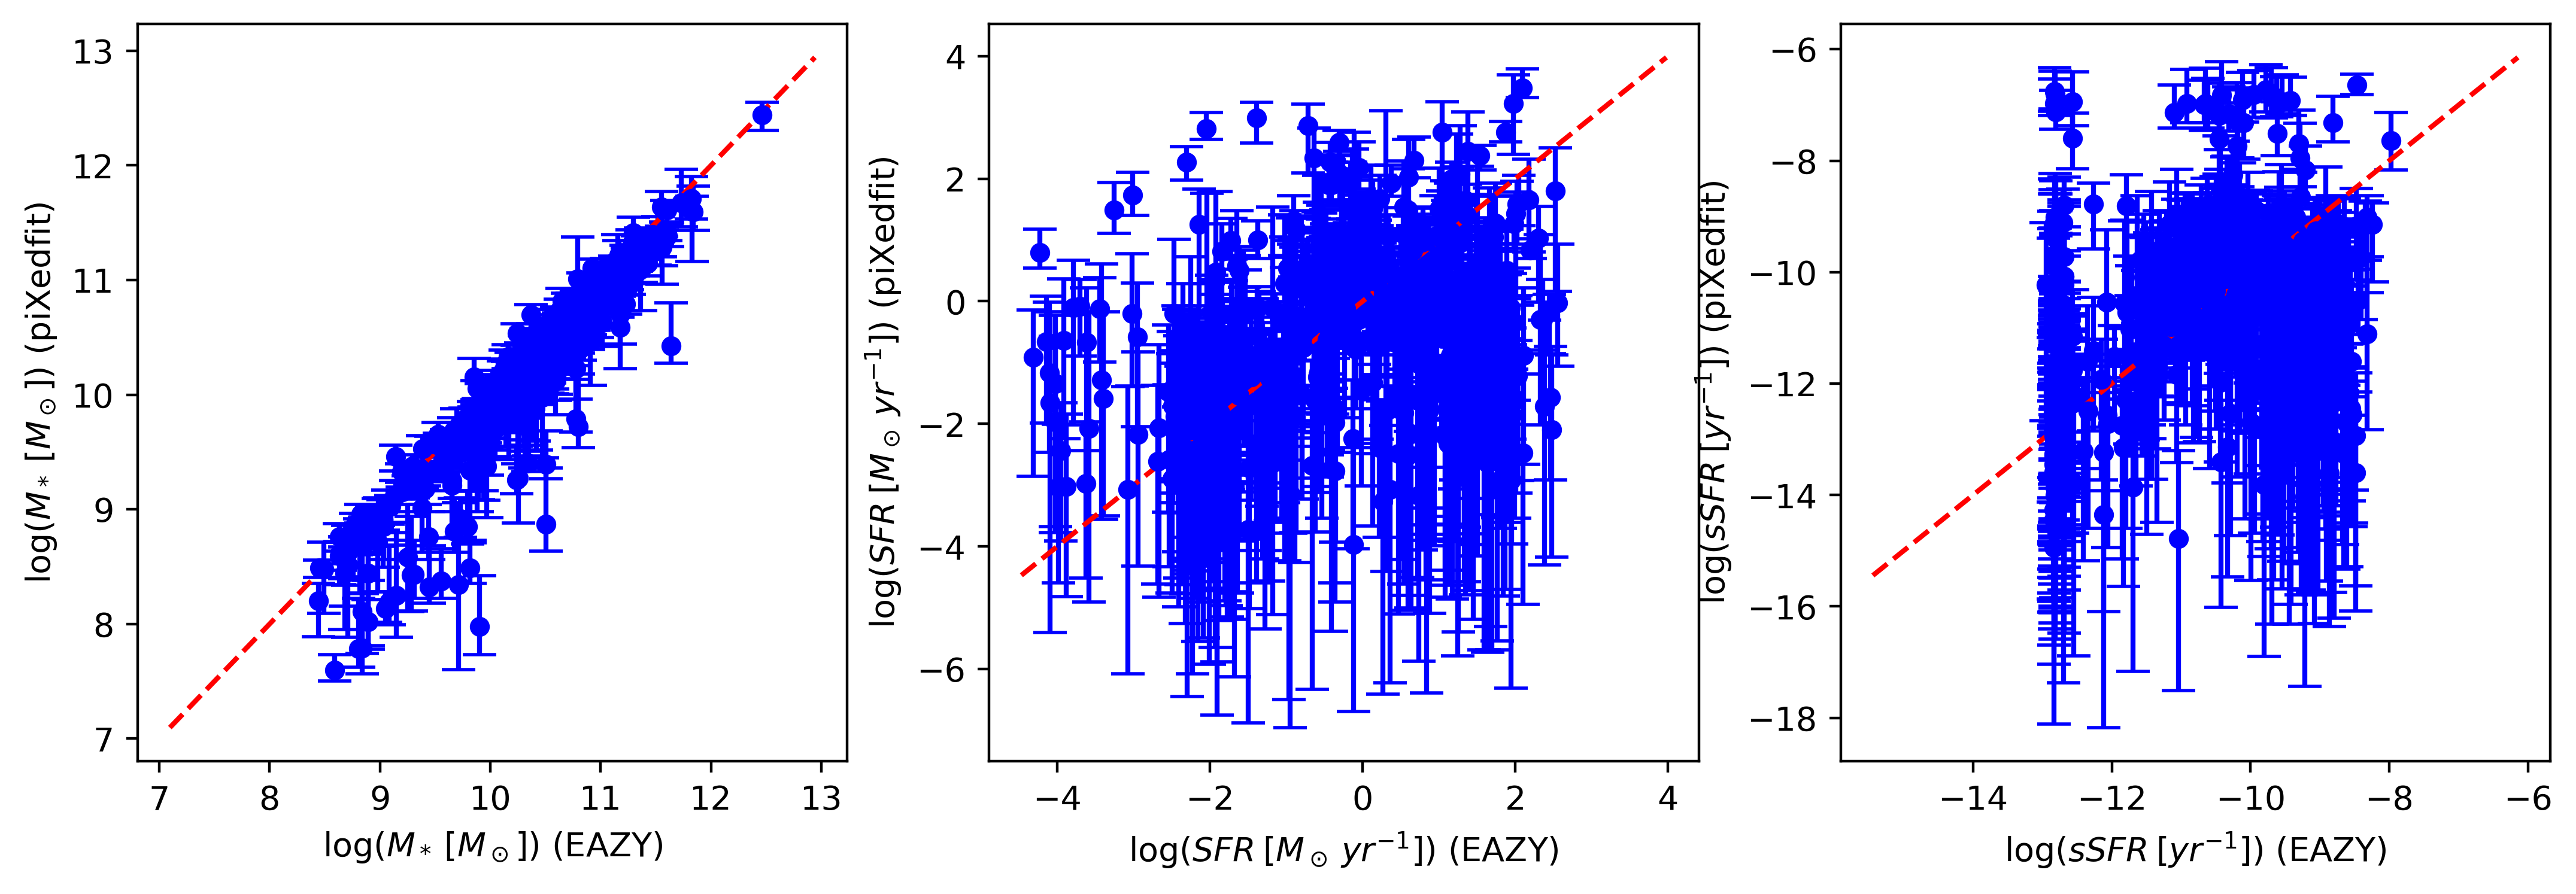

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

mass_up_error = mass_pixedfit[:,2] - mass_pixedfit[:,1]
mass_low_error = mass_pixedfit[:,1] - mass_pixedfit[:,0]
mass_mid = mass_pixedfit[:,1]

sfr_up_error = sfr_pixedfit[:,2] - sfr_pixedfit[:,1]
sfr_low_error = sfr_pixedfit[:,1] - sfr_pixedfit[:,0]
sfr_mid = sfr_pixedfit[:,1]

ssfr_up_error = np.sqrt(sfr_up_error**2 + mass_up_error**2)
ssfr_low_error = np.sqrt(sfr_low_error**2 + mass_low_error**2)
ssfr_mid = sfr_mid-mass_mid

mass_min = mass_mid.min() - 0.5
mass_max = mass_mid.max() + 0.5
mass = np.linspace(mass_min, mass_max, 100)

sfr_min = sfr_mid.min() - 0.5
sfr_max = sfr_mid.max() + 0.5
sfr = np.linspace(sfr_min, sfr_max, 100)

ssfr_min = ssfr_mid.min() - 0.5
ssfr_max = ssfr_mid.max() + 0.5
ssfr = np.linspace(ssfr_min, ssfr_max, 100)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4), dpi=400)

ax1.errorbar(np.log10(mass_eazy), mass_mid, yerr=[mass_low_error, mass_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax1.plot(mass,mass,c='red', linestyle='--')
ax1.set_ylabel(r'$\log(M_*\: [M_\odot])$ (piXedfit)')
ax1.set_xlabel(r'$\log(M_*\: [M_\odot])$ (EAZY)')

ax2.errorbar(np.log10(sfr_eazy), sfr_mid, yerr=[sfr_low_error, sfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax2.plot(sfr,sfr,c='red', linestyle='--')
ax2.set_ylabel(r'$\log(SFR\: [M_\odot\: yr^{-1}])$ (piXedfit)')
ax2.set_xlabel(r'$\log(SFR\: [M_\odot\: yr^{-1}])$ (EAZY)')

ax3.errorbar(np.log10(sfr_eazy/mass_eazy), ssfr_mid, yerr=[ssfr_low_error, ssfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')
ax3.plot(ssfr,ssfr,c='red', linestyle='--')
ax3.set_ylabel(r'$\log(sSFR\: [yr^{-1}])$ (piXedfit)')
ax3.set_xlabel(r'$\log(sSFR\: [yr^{-1}])$ (EAZY)')

plt.show()

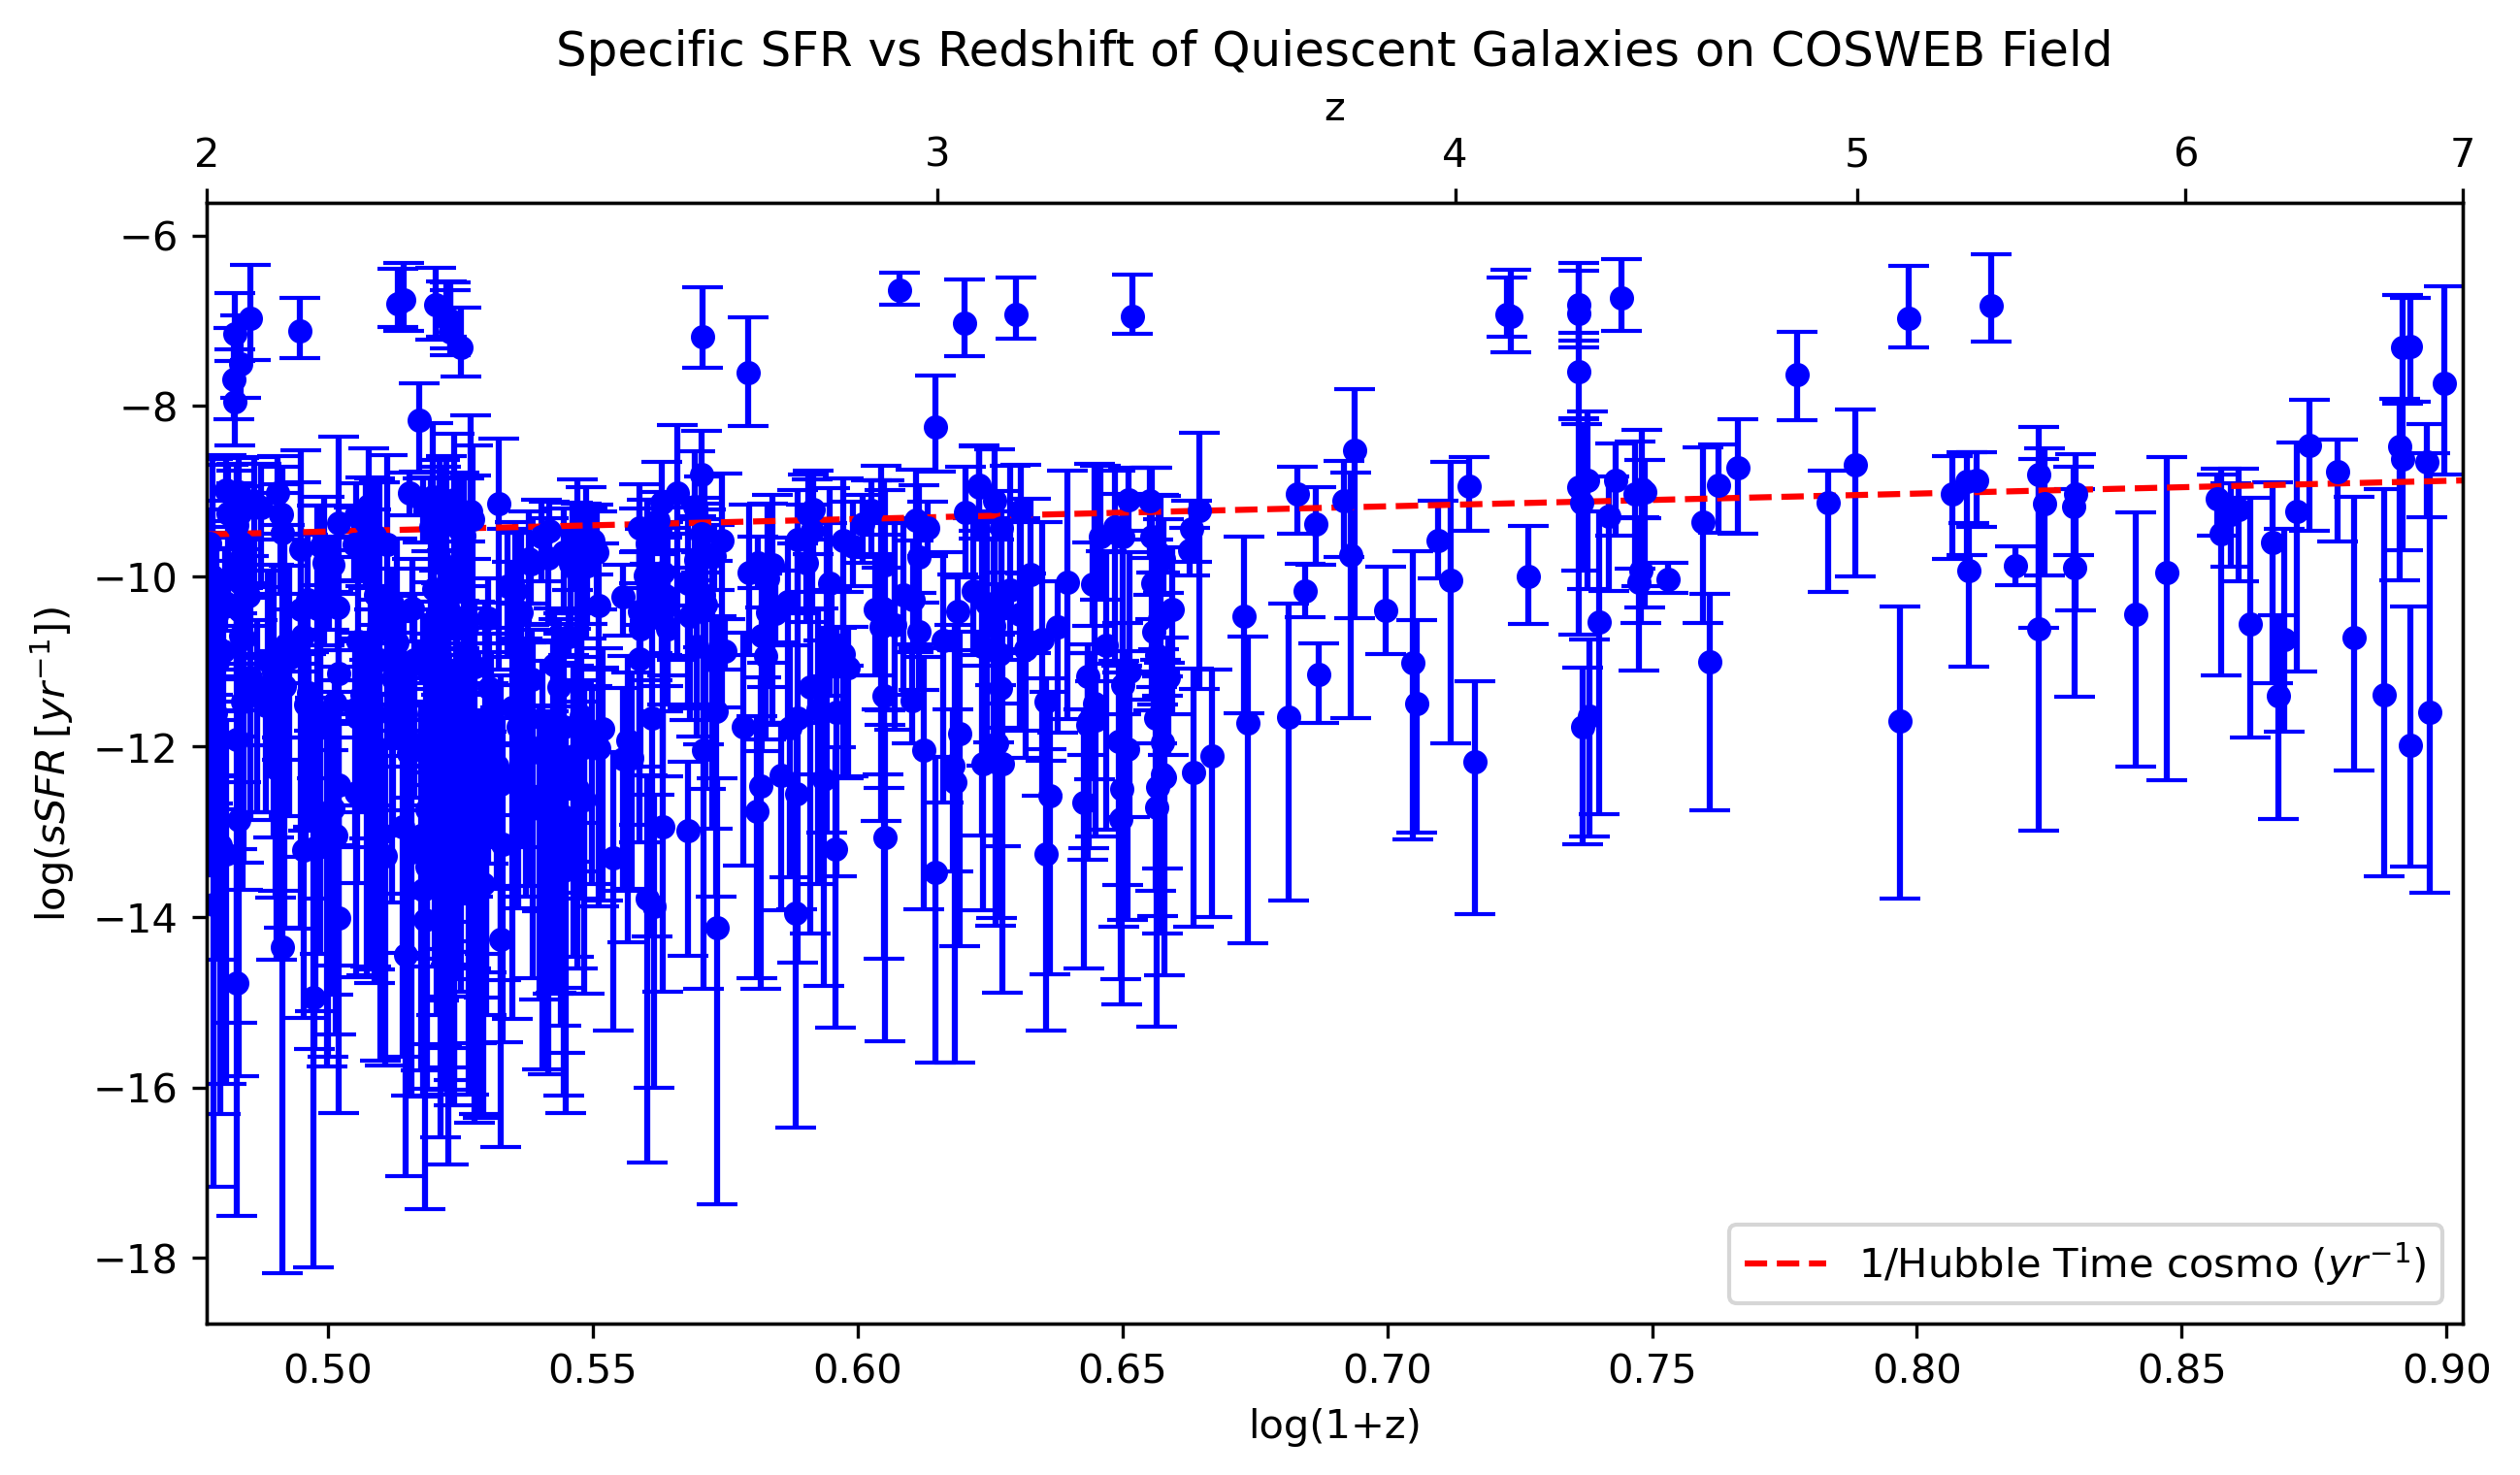

In [10]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

z = np.linspace(2,7,100)
t = cosmo.age(z)
hubble = 1/t * 1e-9

fig, ax1 = plt.subplots(figsize=(10,5), dpi=300)
ax1.set_xlim(np.log10(3), np.log10(8))

ax1.errorbar(np.log10(z_sel+1), ssfr_mid, yerr=[ssfr_low_error, ssfr_up_error], fmt='o', capsize=5, markersize=5, linestyle='None', c = 'blue')

ax2 = plt.twiny()

# Set the limits and label for the second x-axis
ax2.set_xlim(np.log10(2),np.log10(7))

# Define the positions for the ticks
new_tick_positions = np.array([2,3,4,5,6,7])
log_ticks = np.log10(new_tick_positions)

# Set the ticks and labels for the second x-axis
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([2,3,4,5,6,7])

# Set label for the second x-axis
ax2.set_xlabel('z_phot')

plt.title('Specific SFR vs Redshift of Quiescent Galaxies on COSWEB Field')        
ax1.set_xlabel('log(1+z)')
ax2.set_xlabel('z')
ax1.set_ylabel(r'log($sSFR\: [yr^{-1}]$)')
#plt.show()


# Set the limits and label for the second y-axis
#plt.xlabel(r'$log(1+z_{phot})$')
z = np.linspace(2,7,100)

ax1.plot(np.log10(1+z), np.log10(hubble.value), label=r"1/Hubble Time cosmo $(yr^{-1})$", linestyle='--', color='red')


#ax1.plot(np.log10(1+z), np.log10(H(z)), label=r"1/Hubble Time $(yr^{-1})$", linestyle='--', color='red')
ax1.legend()
plt.show()

In [11]:
def H(z):
    H0 = 70
    omega0_m = 0.3
    omega0_de = 0.7
    a = 1 / (1+z)
    H = H0 * np.sqrt(omega0_m * a**(-3) + omega0_de) # in km/s/MPC
    H = H * 1000 / (3.086e22) # in s^-1
    H = H * 365.25 * 24 * 3600
    return H

def age(z):
    t = 2/3 * 1/H(0) * ((1+z)**(-3/2))
    return t/1e9

def log_sfr(logM,z):
    t = cosmo.age(z).value
    #t = age(z)
    m = (0.84 - 0.026 * t)
    c = 6.51 - 0.11 * t
    
    if z > 5:
        m = 0.8 - 0.022 * t
        c = 6.09 - 0.07 * t

    val = m * logM - c
    return val

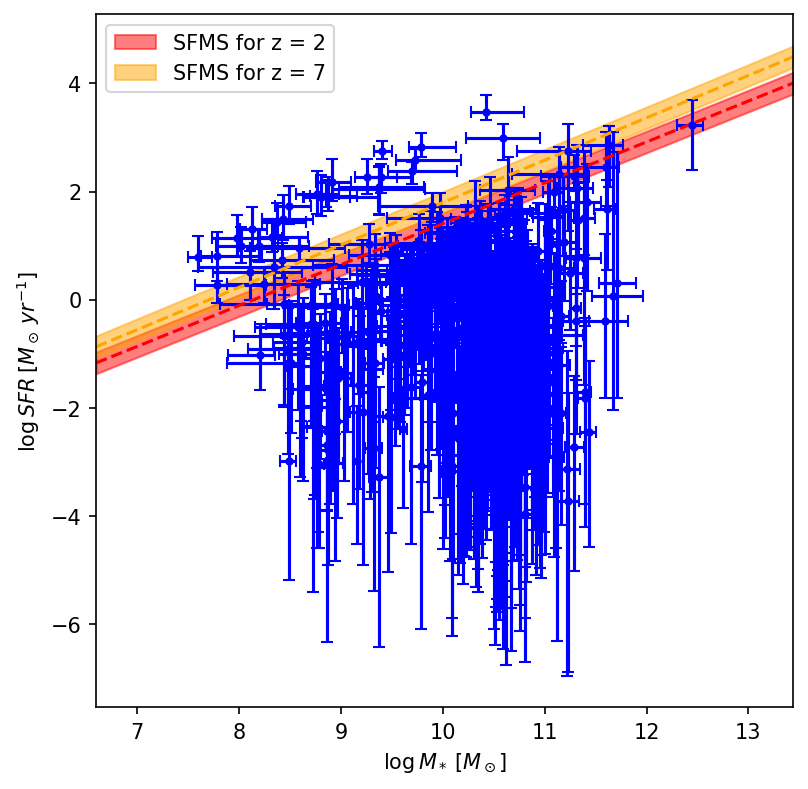

In [12]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_mid, sfr_mid, xerr = [mass_low_error, mass_up_error], yerr = [sfr_low_error, sfr_up_error], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue')

plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')

#plt.scatter(mass_mid, sfr_mid)

plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$')
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.savefig('newmodel_sfms.png')
plt.show()

## Selecting quiescent galaxies based on SFMS

In [13]:
gap = 1

idx_sfms = []
idx_sfms_no = []

for i in range(len(mass_mid)):
    if sfr_mid[i] < (log_sfr(mass_mid[i], z_sel[i]) - gap):
        idx_sfms.append(i)
    else:
        idx_sfms_no.append(i)
        
idx_sfms = np.array(idx_sfms)
idx_sfms_no = np.array(idx_sfms_no)

mass_sel = mass_mid[idx_sfms]
sfr_sel = sfr_mid[idx_sfms]
mass_low_sel = mass_low_error[idx_sfms]
mass_up_sel = mass_low_error[idx_sfms]
sfr_low_sel = sfr_low_error[idx_sfms]
sfr_up_sel = sfr_up_error[idx_sfms]

ssfr_up_sel = np.sqrt(sfr_up_sel**2 + mass_up_sel**2)
ssfr_low_sel = np.sqrt(sfr_low_sel**2 + mass_low_sel**2)
ssfr_sel = sfr_sel-mass_sel

len(idx_sfms)

411

In [14]:
mass_sel_no = mass_mid[idx_sfms_no]
sfr_sel_no = sfr_mid[idx_sfms_no]
mass_low_sel_no = mass_low_error[idx_sfms_no]
mass_up_sel_no = mass_low_error[idx_sfms_no]
sfr_low_sel_no = sfr_low_error[idx_sfms_no]
sfr_up_sel_no = sfr_up_error[idx_sfms_no]

ssfr_up_sel_no = np.sqrt(sfr_up_sel_no**2 + mass_up_sel_no**2)
ssfr_low_sel_no = np.sqrt(sfr_low_sel_no**2 + mass_low_sel_no**2)
ssfr_sel_no = sfr_sel_no-mass_sel_no

len(idx_sfms_no)

111

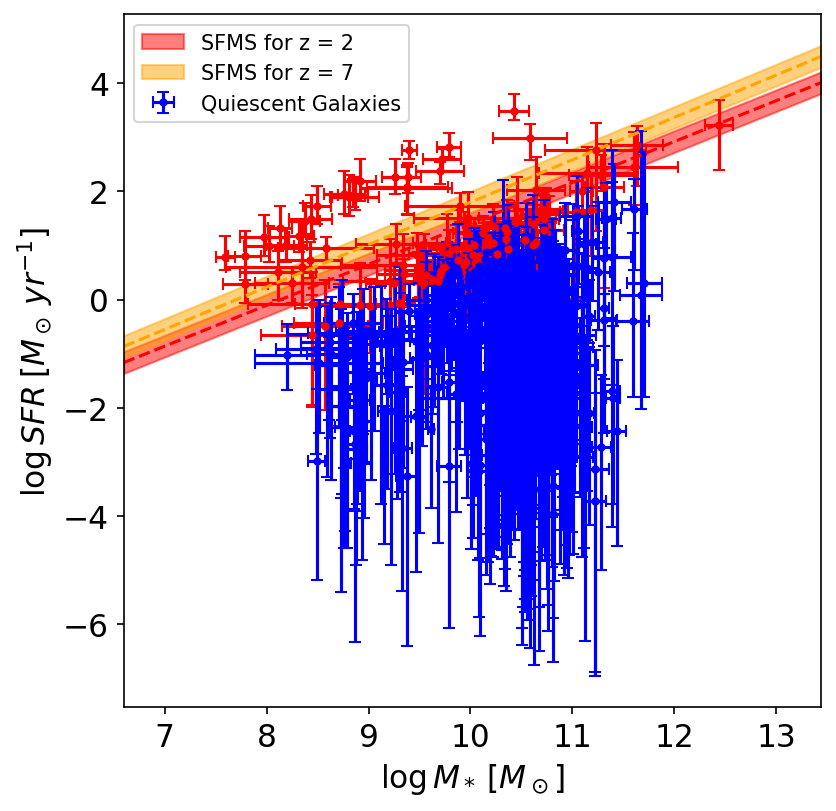

In [15]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_sel_no, sfr_sel_no, xerr = [mass_low_sel_no, mass_up_sel_no], yerr = [sfr_low_sel_no, sfr_up_sel_no], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'red')
plt.errorbar(mass_sel, sfr_sel, xerr = [mass_low_sel, mass_up_sel], yerr = [sfr_low_sel, sfr_up_sel], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue', label='Quiescent Galaxies')

plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')

plt.xlabel(r'$\log{M_*\: [M_\odot]}$', size=15)
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$', size=15)

plt.tick_params(axis='both', which='both', labelsize=15)
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.savefig('SFMS_ppt.png')
plt.show()

In [16]:
# extracting the quiescent galaxies index from each field

len1 = len(list_id1)
len2 = len(list_id2)
len3 = len(list_id3)
len4 = len(list_id4)

# cosweb

idx_idx_sfms1 = np.where(idx_sfms < (len1))

idx_qui_final1 = list_id1[idx_sfms[idx_idx_sfms1]]

# ceers

idx_idx_sfms2 = np.where((idx_sfms > (len1 - 1)) & (idx_sfms < (len1+len2)))

idx_qui_final2 = list_id2[idx_sfms[idx_idx_sfms2] - len1]

# fresco

idx_idx_sfms3 = np.where((idx_sfms > (len1 + len2 - 1)) & (idx_sfms < (len1+len2+len3)))

idx_qui_final3 = list_id3[idx_sfms[idx_idx_sfms3] - len1 - len2]

# primer

idx_idx_sfms4 = np.where((idx_sfms > (len1 + len2 + len3 - 1)) & (idx_sfms < (len1+len2+len3+len4)))

idx_qui_final4 = list_id4[idx_sfms[idx_idx_sfms4] - len1 - len2 - len3]

idx_qui_final4

array([35805, 41300, 43940, 28624, 52828, 54790, 51316,  6997, 40086,
       65112, 13147, 21921, 33158, 42804, 32335,  9779, 13256, 25626,
       18660, 62049, 14509, 10858, 12185, 43190, 22207, 51114, 45270,
       30370, 33552, 15340, 21261, 45153,   740, 29671, 43488,  8245,
       12448, 11225, 54785,  3586, 13433, 39932, 54626, 63093, 54098,
       42512, 17401, 23273, 53570,  2374, 54274, 52115, 60820, 60174,
        8270, 47023, 24397, 36596, 24114, 33053, 19884, 40804, 43228,
       34433, 50909, 53569, 46509, 29381, 32471, 36347, 54164,  1056,
       34476,  4716, 58489, 62596, 53117, 14913, 37326, 54464,  8976,
       17399, 48410, 14738, 62794, 63078, 13090,  2864, 47299, 26868,
       20338, 10016, 34052, 32995,  4670, 17122, 18843, 42967, 14254,
       31284, 11848,  7122, 10074, 53512, 30893, 26994, 18827, 25571,
       26644, 27794, 55382, 17599, 14580, 51848,  6957, 19289, 26602,
       13542, 60664,   554, 53780, 32964,  7859, 27729, 26433, 35057,
       37119, 18142,

In [17]:
n1 = len(idx_qui_final1)
n2 = len(idx_qui_final2)
n3 = len(idx_qui_final3)
n4 = len(idx_qui_final4)

z_qui = z_sel[idx_sfms]
z_qui1 = z_qui[:n1]
z_qui2 = z_qui[n1:n1+n2]
z_qui3 = z_qui[n1+n2:n1+n2+n3]
z_qui4 = z_qui[n1+n2+n3:]

mass_qui1 = mass_sel[:n1]
mass_qui2 = mass_sel[n1:n1+n2]
mass_qui3 = mass_sel[n1+n2:n1+n2+n3]
mass_qui4 = mass_sel[n1+n2+n3:]

mass_qui_up1 = mass_up_sel[:n1]
mass_qui_up2 = mass_up_sel[n1:n1+n2]
mass_qui_up3 = mass_up_sel[n1+n2:n1+n2+n3]
mass_qui_up4 = mass_up_sel[n1+n2+n3:]

mass_qui_low1 = mass_low_sel[:n1]
mass_qui_low2 = mass_low_sel[n1:n1+n2]
mass_qui_low3 = mass_low_sel[n1+n2:n1+n2+n3]
mass_qui_low4 = mass_low_sel[n1+n2+n3:]

sfr_qui1 = sfr_sel[:n1]
sfr_qui2 = sfr_sel[n1:n1+n2]
sfr_qui3 = sfr_sel[n1+n2:n1+n2+n3]
sfr_qui4 = sfr_sel[n1+n2+n3:]

sfr_qui_up1 = sfr_up_sel[:n1]
sfr_qui_up2 = sfr_up_sel[n1:n1+n2]
sfr_qui_up3 = sfr_up_sel[n1+n2:n1+n2+n3]
sfr_qui_up4 = sfr_up_sel[n1+n2+n3:]

sfr_qui_low1 = sfr_low_sel[:n1]
sfr_qui_low2 = sfr_low_sel[n1:n1+n2]
sfr_qui_low3 = sfr_low_sel[n1+n2:n1+n2+n3]
sfr_qui_low4 = sfr_low_sel[n1+n2+n3:]

In [18]:
idx_qui_final1[np.where((z_qui1<5.5) & (z_qui1>4.0))]

array([ 5396, 24388, 28308, 23310, 18558])

In [19]:
idx_qui_final2[np.where((z_qui2<5.5) & (z_qui2>4.0))]

array([67311, 18187, 63207, 53742, 15229,  7556, 27517, 51851])

In [20]:
idx_qui_final3[np.where((z_qui3<5.5) & (z_qui3>4.0))]

array([ 7098,  3241, 10997])

In [21]:
idx_qui_final4[np.where((z_qui4<5.5) & (z_qui4>4.0))]

array([50909, 55382])

In [22]:
n1+n2+n3+n4

411

In [23]:
eazy_mass1 = SM1[idx_qui_final1]
eazy_mass2 = SM2[idx_qui_final2]
eazy_mass3 = SM3[idx_qui_final3]
eazy_mass4 = SM4[idx_qui_final4]

eazy_sfr1 = SFR1[idx_qui_final1]
eazy_sfr2 = SFR2[idx_qui_final2]
eazy_sfr3 = SFR3[idx_qui_final3]
eazy_sfr4 = SFR4[idx_qui_final4]

In [24]:
eazy_sfr1

array([9.88593526e-01, 2.06708467e+00, 7.14041900e-01, 1.17946122e+00,
       2.80319362e-02, 2.89502347e-03, 1.15868491e-02, 5.60612989e-03,
       2.62767093e-04, 2.85637570e-01, 1.17129992e-02, 1.70726610e+01,
       4.04444446e-01, 6.25612377e+01, 2.75976082e-02, 9.42442675e-03,
       4.39760471e-01, 4.06412341e-03, 1.27619132e+00, 2.22733363e-02,
       7.36265098e+01, 3.45581892e-02, 1.22075868e-04, 3.36900625e-03,
       2.88702825e-01, 1.35398841e-01, 6.14670781e-01, 2.66451567e-01,
       2.12512967e+02, 1.23796106e+01, 2.70845255e-01, 3.99139586e-04,
       2.97403795e-01, 8.63355105e-03, 3.88922880e-01, 4.06125461e+00,
       9.81116512e-02, 1.12506540e-03, 1.45387390e+00, 1.03244031e-01,
       2.59628774e+01, 1.33917741e-01, 1.16539647e-02, 3.12148178e+01,
       4.70650983e-02, 4.69891289e-01, 2.83080254e-01, 9.54639260e-04,
       2.95757718e-01, 4.40547642e-02, 2.10108164e+00, 7.20952911e-02,
       2.40891137e-04, 6.34389276e-03, 2.85054520e-02, 6.93235452e-03,
      

In [25]:
# Open a file in write mode ('w')

with open('cat1_COSWEB.txt', 'w') as file:
    line = f"#no\tindex\tz_phot\t\t\tlogM\t\t\tlogSFR\t\t\terr_logM_up\t\terr_logM_low\t\terr_logSFR_up\t\terr_logSFR_low\t\tmass_EAZY\t\tSFR_EAZY\n"
    file.write(line)
    for i in range(n1):
        line = f"{i+1}\t{idx_qui_final1[i]}\t{z_qui1[i]}\t{mass_qui1[i]}\t{sfr_qui1[i]}\t{mass_qui_up1[i]}\t{mass_qui_low1[i]}\t{sfr_qui_up1[i]}\t{sfr_qui_low1[i]}\t{eazy_mass1[i]}\t{eazy_sfr1[i]}\n"
        file.write(line)

with open('cat2_CEERS.txt', 'w') as file:
    line = f"#no\tindex\tz_phot\t\t\tlogM\t\t\tlogSFR\t\t\terr_logM_up\t\terr_logM_low\t\terr_logSFR_up\t\terr_logSFR_low\t\tmass_EAZY\t\tSFR_EAZY\n"
    file.write(line)
    for i in range(n2):
        line = f"{i+1}\t{idx_qui_final2[i]}\t{z_qui2[i]}\t{mass_qui2[i]}\t{sfr_qui2[i]}\t{mass_qui_up2[i]}\t{mass_qui_low2[i]}\t{sfr_qui_up2[i]}\t{sfr_qui_low2[i]}\t{eazy_mass2[i]}\t{eazy_sfr2[i]}\n"
        file.write(line)

with open('cat3_FRESCO_GOOD-S.txt', 'w') as file:
    line = f"#no\tindex\tz_phot\t\t\tlogM\t\t\tlogSFR\t\t\terr_logM_up\t\terr_logM_low\t\terr_logSFR_up\t\terr_logSFR_low\t\tmass_EAZY\t\tSFR_EAZY\n"
    file.write(line)
    for i in range(n3):
        line = f"{i+1}\t{idx_qui_final3[i]}\t{z_qui3[i]}\t{mass_qui3[i]}\t{sfr_qui3[i]}\t{mass_qui_up3[i]}\t{mass_qui_low3[i]}\t{sfr_qui_up3[i]}\t{sfr_qui_low3[i]}\t{eazy_mass3[i]}\t{eazy_sfr3[i]}\n"
        file.write(line)

with open('cat4_PRIMER-UDS.txt', 'w') as file:
    line = f"#no\tindex\tz_phot\t\t\tlogM\t\t\tlogSFR\t\t\terr_logM_up\t\terr_logM_low\t\terr_logSFR_up\t\terr_logSFR_low\t\tmass_EAZY\t\tSFR_EAZY\n"
    file.write(line)
    for i in range(n4):
        line = f"{i+1}\t{idx_qui_final4[i]}\t{z_qui4[i]}\t{mass_qui4[i]}\t{sfr_qui4[i]}\t{mass_qui_up4[i]}\t{mass_qui_low4[i]}\t{sfr_qui_up4[i]}\t{sfr_qui_low4[i]}\t{eazy_mass4[i]}\t{eazy_sfr4[i]}\n"
        file.write(line)

In [ ]:
l

## Mass and redshift bin distribution

In [26]:
std_mass = np.std(mass_sel)

N = len(mass_sel)

bin_width = 3.5*std_mass / N**(1/3)

bin_width

0.3057412766000685

In [27]:
area = np.array([0.18*(np.pi/180)**2, 100/3600*(np.pi/180)**2, 62/3600*(np.pi/180)**2, 175.17/3600*(np.pi/180)**2 ])


In [28]:
rs_bins = [[2.0, 2.5], [2.5, 3.0], [3.0, 3.5], [3.5, 4.5], [4.5, 5.5], [5.5, 7.0]]

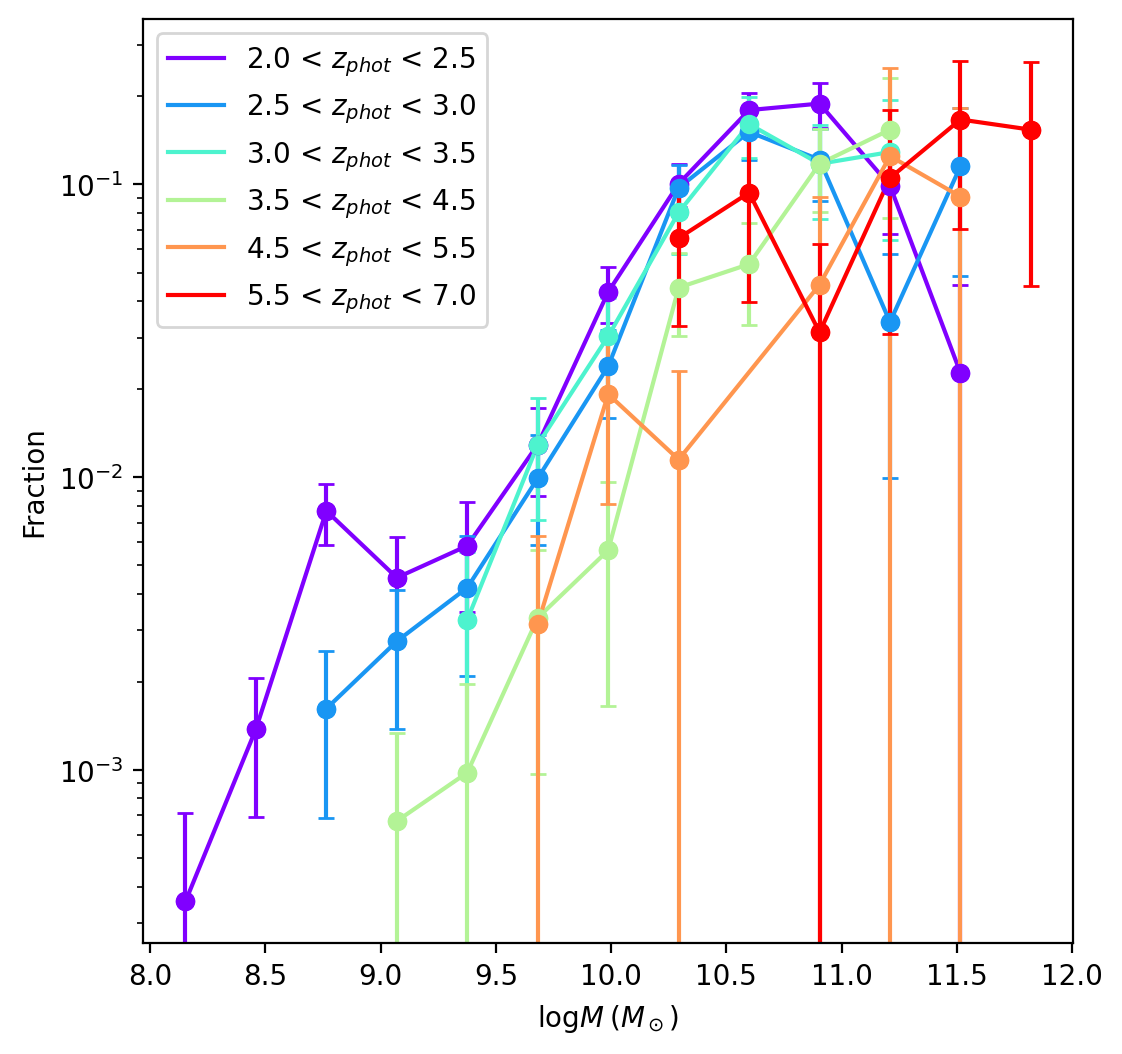

In [29]:
import math
z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = bin_width
bin_gap_rs = 1

plt.figure(figsize=(6,6), dpi = 200)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

n = math.ceil(5/bin_gap_rs)

m = math.ceil((12-8.0)/bin_gap_mass)

mass_bins = []

for i in range(m):
    mass_bins.append((8.0 + i * bin_gap_mass, 8.0 + (i+1) * bin_gap_mass))

colors = plt.cm.rainbow(np.linspace(0, 1, 6))

list_frac_com = []
list_qui_com = []
list_mass_com = []
list_num = []
list_err_com = []

for i in range(0, len(rs_bins)):
    
    list_frac_dum = []
    list_mass_dum = []
    list_qui_dum = []
    list_err_dum = []
    
    z_low = rs_bins[i][0]
    z_high = rs_bins[i][1]
    
    idx_sel_tot = np.where((z_phot > z_low) & (z_phot < z_high))
    idx_sel_qui = np.where((z_qui > z_low) & (z_qui < z_high))
    
    list_num.append(len(idx_sel_qui[0]))
    
    if len(idx_sel_qui[0]) > 0:
        
        for j in range(m):
            
            bin_range = mass_bins[j]
            
            idx_sel_mass_tot = np.where((np.log10(SM[idx_sel_tot[0]]) > bin_range[0]) & (np.log10(SM[idx_sel_tot[0]]) < bin_range[1]))
            idx_sel_mass_qui = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]))
            
            if len(idx_sel_mass_qui[0]) > 0:
                
                list_frac_dum.append(len(idx_sel_mass_qui[0])/len(idx_sel_mass_tot[0]))
                list_mass_dum.append((bin_range[0]+bin_range[1])/2)
                list_qui_dum.append(len(idx_sel_mass_qui[0]))
            
        list_frac_com.append(list_frac_dum)
        list_qui_com.append(list_qui_dum)
        list_mass_com.append(list_mass_dum)
        
        list_frac = np.array(list_frac_dum)
        list_mass = np.array(list_mass_dum)
        list_qui = np.array(list_qui_dum)
        
        tot = list_qui / list_frac
        err_qui = np.sqrt(list_qui)
        err_tot = np.sqrt(tot)
        error = np.sqrt( list_frac**2 * err_qui**2 / list_qui**2 + list_frac**4 * err_tot**2 / tot**2 )
        
        list_err_com.append(error)
        
        plt.plot(list_mass, list_frac, label=str(z_low) + r' < $z_{phot}$ < ' + str(z_high), c = colors[i])
        plt.errorbar(list_mass, list_frac, yerr=error, fmt='o', capsize=3, markersize=6, linestyle='None', c = colors[i])
        plt.scatter(list_mass, list_frac, c=colors[i])
        
        #plt.scatter(list_mass, list_frac)
        plt.xlabel(r'log$M\: (M_\odot)$')
        plt.ylabel('Fraction')
        plt.yscale('log')
        plt.legend(loc='upper left')

#plt.xlim(6,12)
#plt.ylim(0,0.2)
plt.show()
        
            

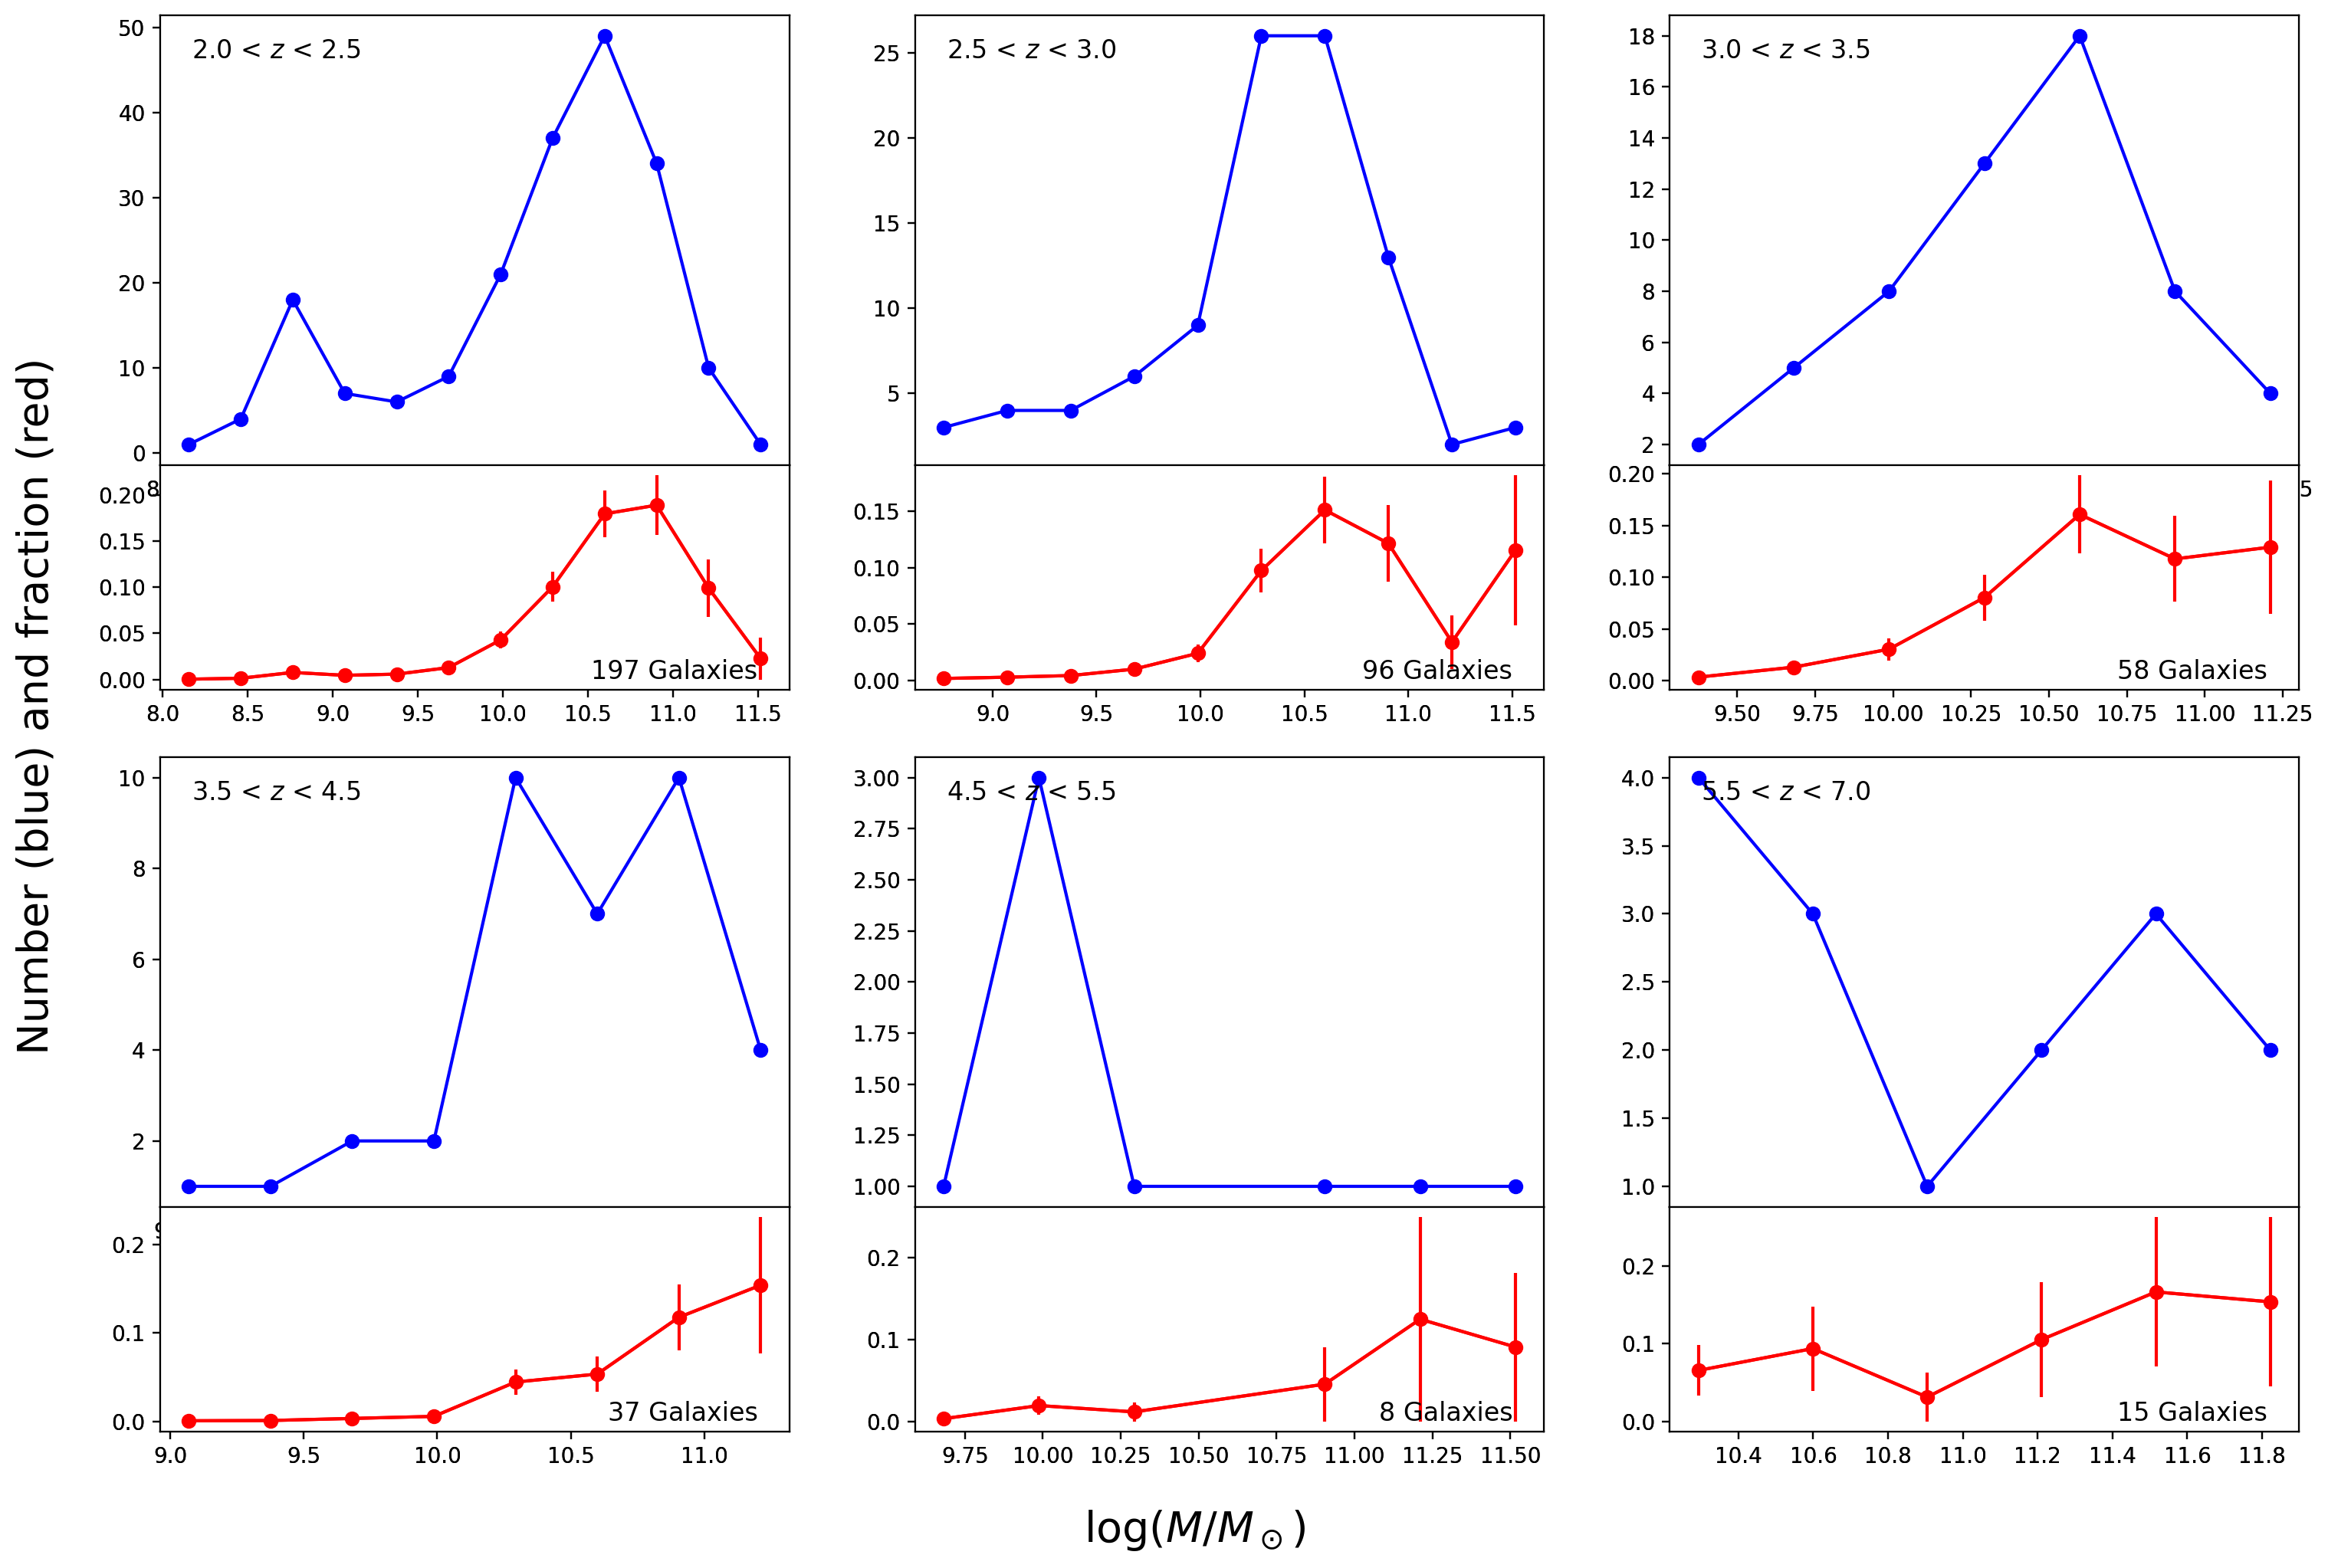

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 12), dpi=200)
outer = gridspec.GridSpec(2, 3, wspace=0.2, hspace=0.1)

for i in range(6):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0., height_ratios=[2,1])

    z_min = rs_bins[i][0]
    z_max = rs_bins[i][1]
    ntot = list_num[i]
    error = list_err_com[i]
    
    for j in range(2):
        ax1 = plt.Subplot(fig, inner[0])
        ax2 = plt.Subplot(fig, inner[1])
        
        ax1.scatter(list_mass_com[i], list_qui_com[i], c='blue')
        ax1.plot(list_mass_com[i], list_qui_com[i], c='blue')
        ax1.text(0.05, 0.92, r'{} < $z$ < {}'.format(z_min, z_max),
                        horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes,
                        fontsize=12)
        
        ax2.scatter(list_mass_com[i], list_frac_com[i], c='red')
        ax2.errorbar(list_mass_com[i], list_frac_com[i], yerr = error, c='red')
        ax2.plot(list_mass_com[i], list_frac_com[i], c='red')
        ax2.text(0.95, 0.08, r'{} Galaxies'.format(ntot),
                        horizontalalignment='right', verticalalignment='center', transform=ax2.transAxes,
                        fontsize=12)
        
        fig.add_subplot(ax1)
        fig.add_subplot(ax2)

fig.text(0.5, 0.05, r'$\log(M/M_\odot)$', ha='center', fontsize=20)
fig.text(0.08, 0.32, r'Number (blue) and fraction (red)', rotation=90, ha='center', fontsize=20) 
        
fig.show()

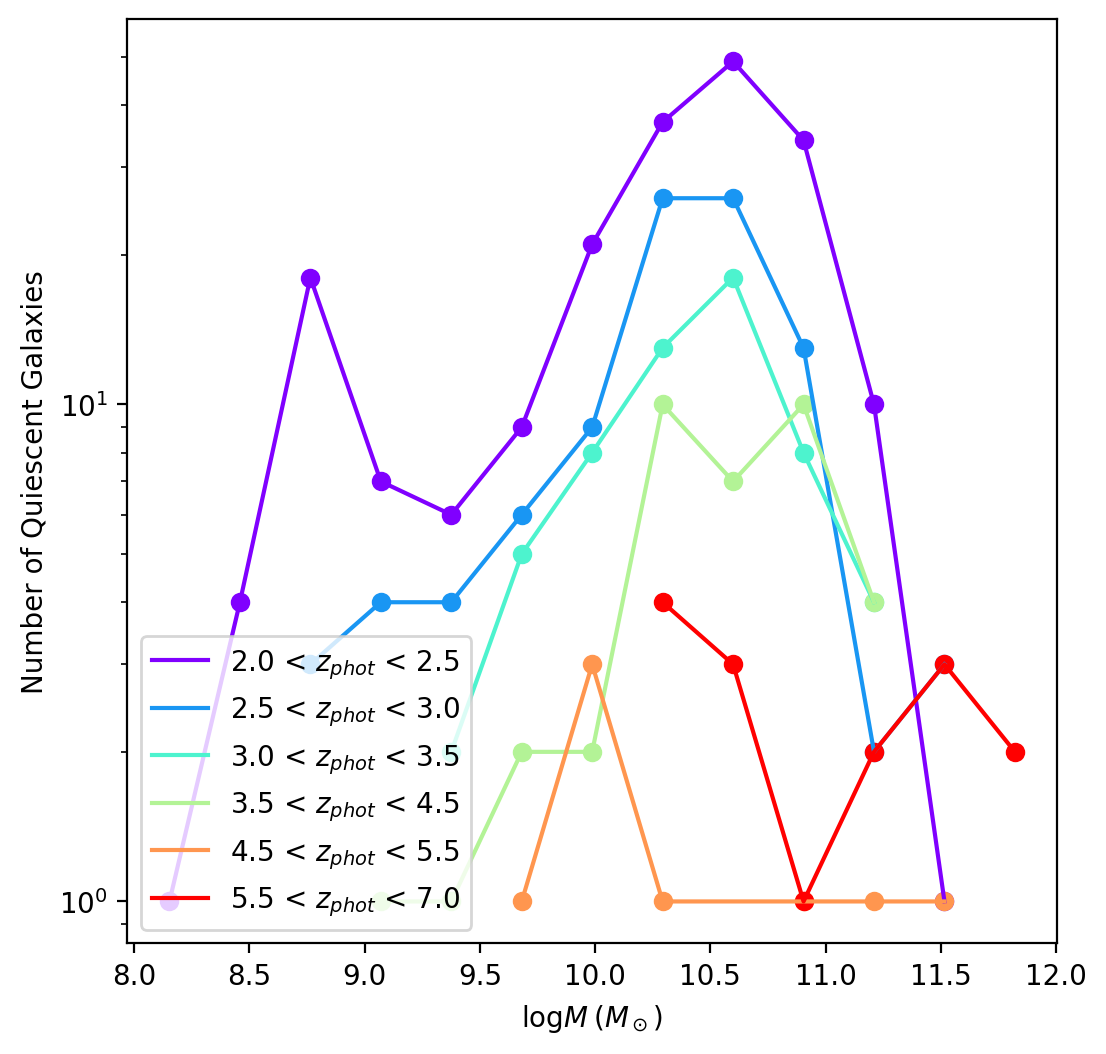

In [31]:
import math
z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = bin_width
bin_gap_rs = 1
init_mass = 8

plt.figure(figsize=(6,6), dpi = 200)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

n = math.ceil(5/bin_gap_rs)

m = math.ceil((12-init_mass)/bin_gap_mass)

mass_bins = []

for i in range(m):
    mass_bins.append((init_mass + i * bin_gap_mass, init_mass + (i+1) * bin_gap_mass))

colors = plt.cm.rainbow(np.linspace(0, 1, 6))

for i in range(0, len(rs_bins)):
    
    list_frac_dum = []
    list_mass_dum = []
    list_qui_dum = []
    list_qui_dens = []
    
    z_low = rs_bins[i][0]
    z_high = rs_bins[i][1]
    
    idx_sel_qui = np.where((z_qui > z_low) & (z_qui < z_high))
    
    idx_sel_tot = np.where((z_phot > z_low) & (z_phot < z_high))
    
    if len(idx_sel_qui[0]) > 0:
        
        for j in range(m):
            
            bin_range = mass_bins[j]
            
            idx_sel_mass_tot = np.where((np.log10(SM[idx_sel_tot[0]]) > bin_range[0]) & (np.log10(SM[idx_sel_tot[0]]) < bin_range[1]))
            idx_sel_mass_qui = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]))
            
            if len(idx_sel_mass_qui[0]) > 0:
                
                list_frac_dum.append(len(idx_sel_mass_qui[0])/len(idx_sel_mass_tot[0]))
                list_mass_dum.append((bin_range[0]+bin_range[1])/2)
                list_qui_dum.append(len(idx_sel_mass_qui[0]))
                
            
        list_frac = np.array(list_frac_dum)
        list_mass = np.array(list_mass_dum)
        list_qui = np.array(list_qui_dum)
        
        tot = list_qui / list_frac
        err_qui = np.sqrt(list_qui)
        err_tot = np.sqrt(tot)
        error = np.sqrt( list_frac**2 * err_qui**2 / list_qui**2 + list_frac**4 * err_tot**2 / tot**2 )
        
        plt.plot(list_mass, list_qui, label=str(z_low) + r' < $z_{phot}$ < ' + str(z_high), c = colors[i])
        #plt.errorbar(list_mass, list_qui, yerr=np.sqrt(list_qui), fmt='o', capsize=3, markersize=6, linestyle='None', c = colors[i])
        plt.scatter(list_mass, list_qui, c = colors[i])
        
        plt.xlabel(r'log$M\: (M_\odot)$')
        plt.ylabel('Number of Quiescent Galaxies')
        plt.yscale('log')
        plt.legend(loc='lower left')

#plt.xlim(6,12)
#plt.ylim(0,0.2)
plt.show()
        
            

In [32]:
area = np.array([0.54*(np.pi/180)**2, 100/3600*(np.pi/180)**2, 62/3600*(np.pi/180)**2, 234.02/3600*(np.pi/180)**2 ])
pix = np.array([173188402, 206292334, 153878190, 346245184])

In [33]:
area2 = pix*0.04**2/(180*3600/np.pi)**2

In [36]:
area2*(180/np.pi)**2*3600

array([ 76.97262311,  91.68548178,  68.39030667, 153.88674844])

In [72]:
rs_bins = [[2.0, 2.5], [2.5, 3.0], [3.0, 3.5], [3.5, 4.], [4., 5.0], [5.0, 7.0]]

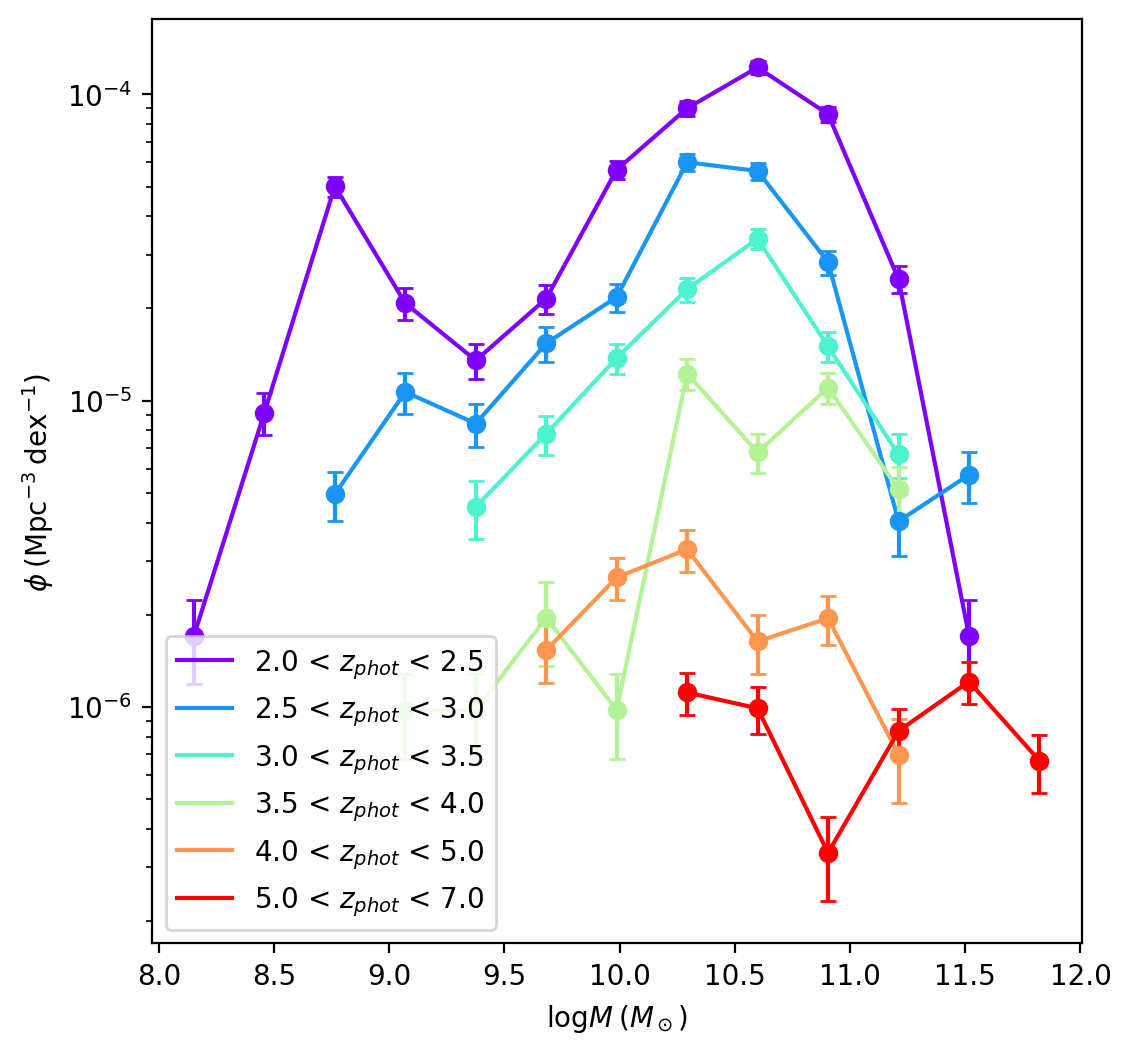

In [75]:
#rs_bins = [[4.5,5.5]]
#rs_bins = [[3.5,4.]]
import math
import piXedfit

z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = bin_width
bin_gap_rs = 0.5
init_mass = 8.0

plt.figure(figsize=(6,6),dpi=200)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

n = math.ceil(5/bin_gap_rs)

m = math.ceil((15-init_mass)/bin_gap_mass)

mass_bins = []

for i in range(m):
    mass_bins.append((init_mass + i * bin_gap_mass, init_mass + (i+1) * bin_gap_mass))

colors = plt.cm.rainbow(np.linspace(0, 1, len(rs_bins)))

for i in range(0, len(rs_bins)):

    list_mass_dum = []
    list_qui_dens = []
    list_err_dum = []
    
    z_low = rs_bins[i][0]
    z_high = rs_bins[i][1]
    
    idx_sel_qui = np.where((z_qui > z_low) & (z_qui < z_high))

    d_low = cosmo.luminosity_distance(z_low).value
    d_high = cosmo.luminosity_distance(z_high).value
    Mpc_per_pix_low = piXedfit.piXedfit_images.kpc_per_pixel(z_low,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*(z_low+1)/1000
    Mpc_per_pix_high = piXedfit.piXedfit_images.kpc_per_pixel(z_high,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*(z_high+1)/1000
    Mpc_per_pix = (Mpc_per_pix_low+Mpc_per_pix_high)/2
    #Mpc_per_pix = piXedfit.piXedfit_images.kpc_per_pixel((z_low+z_high)/2,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*((z_high+z_low)/2+1)/1000
    
    vol1 = (pix[0]*Mpc_per_pix**2*(d_high-d_low))
    vol2 = (pix[1]*Mpc_per_pix**2*(d_high-d_low))
    vol3 = (pix[2]*Mpc_per_pix**2*(d_high-d_low))
    vol4 = (pix[3]*Mpc_per_pix**2*(d_high-d_low))

    if len(idx_sel_qui[0]) > 0:

        for j in range(m):

            bin_range = mass_bins[j]

            idx_sel_mass_qui1 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 < n1))
            idx_sel_mass_qui2 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1) & (idx_sel_qui[0]+1 < n1+n2))
            idx_sel_mass_qui3 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1+n2) & (idx_sel_qui[0]+1 < n1+n2+n3))
            idx_sel_mass_qui4 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1+n2+n3))
            
            qui1 = len(idx_sel_mass_qui1[0])
            qui2 = len(idx_sel_mass_qui2[0])
            qui3 = len(idx_sel_mass_qui3[0])
            qui4 = len(idx_sel_mass_qui4[0])
            
            if qui1 + qui2 + qui3 + qui4 > 0:
            
                density1 = qui1/vol1
                density2 = qui2/vol2
                density3 = qui3/vol3
                density4 = qui4/vol4

                err1 = np.sqrt(qui1)/vol1
                err2 = np.sqrt(qui2)/vol2
                err3 = np.sqrt(qui3)/vol3
                err4 = np.sqrt(qui4)/vol4

                list_mass_dum.append((bin_range[0]+bin_range[1])/2)
                list_qui_dens.append(density1+density2+density3+density4)
                list_err_dum.append(np.sqrt(err1**2+err2**2+err3**2+err4**2))

        list_mass = np.array(list_mass_dum)
        list_qui_dens = np.array(list_qui_dens)
        list_err = np.array(list_err_dum)

        plt.plot(list_mass, list_qui_dens/bin_gap_mass, label=str(z_low) + r' < $z_{phot}$ < ' + str(z_high), c = colors[i])
        plt.errorbar(list_mass, list_qui_dens/bin_gap_mass, yerr=list_err, fmt='o', capsize=3, markersize=6, linestyle='None', c = colors[i])

        #plt.scatter(list_mass, list_frac)
        plt.xlabel(r'log$M\: (M_\odot)$')
        plt.ylabel(r'$\phi\: (\text{Mpc}^{-3}\: \text{dex}^{-1})$')
        plt.yscale('log')
        plt.legend(loc='lower left')
        
#plt.xlim(6,12)
#plt.ylim(1e-12,1e-9)
plt.show()

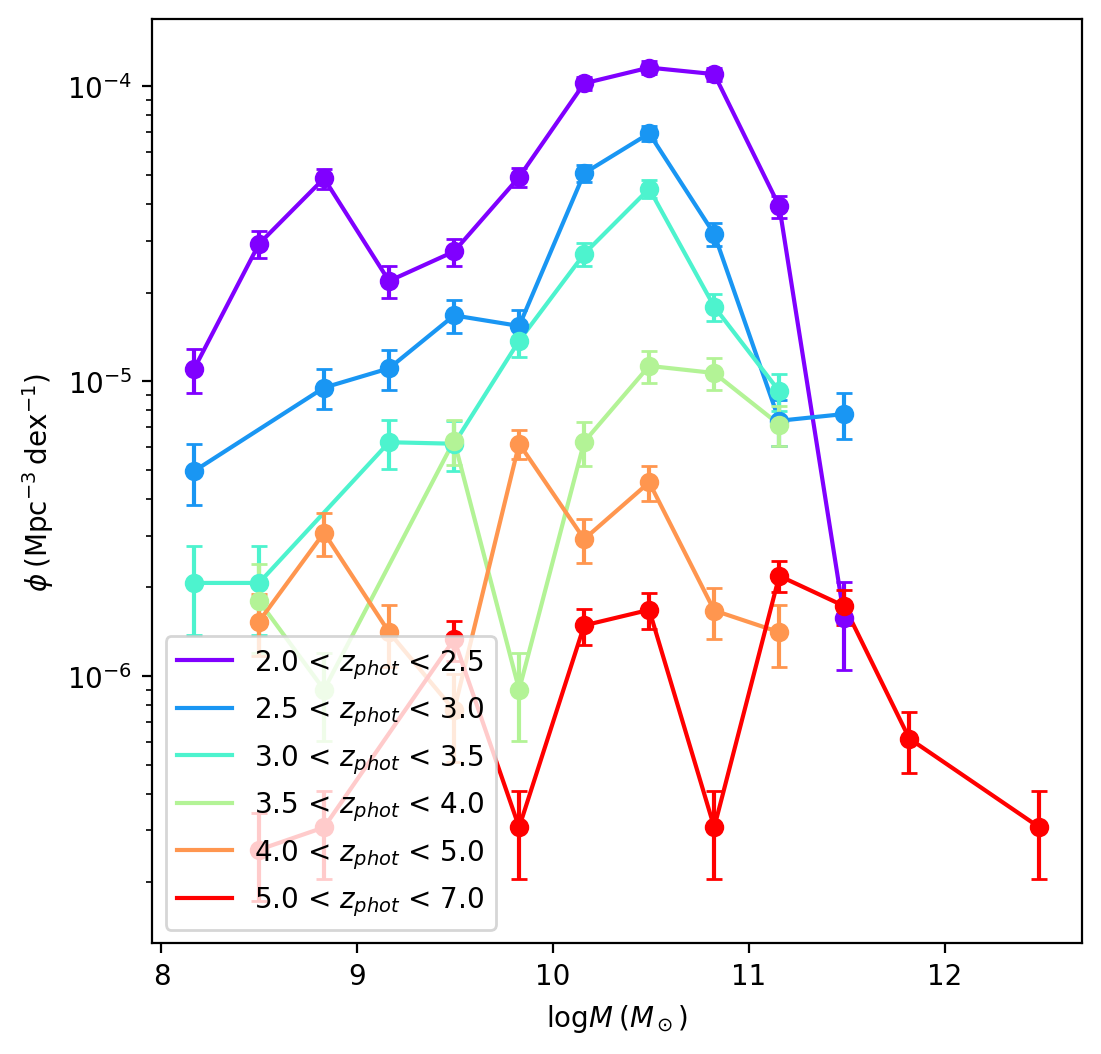

In [64]:

std_mass = np.std(mass_mid)

N = len(mass_mid)

bin_width1 = 3.5*std_mass / N**(1/3)

import math
import piXedfit

z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = bin_width1
bin_gap_rs = 0.5
init_mass = 8.0

plt.figure(figsize=(6,6),dpi=200)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

n = math.ceil(5/bin_gap_rs)

m = math.ceil((15-init_mass)/bin_gap_mass)

mass_bins = []

for i in range(m):
    mass_bins.append((init_mass + i * bin_gap_mass, init_mass + (i+1) * bin_gap_mass))

colors = plt.cm.rainbow(np.linspace(0, 1, 6))

for i in range(0, len(rs_bins)):

    list_mass_dum = []
    list_qui_dens = []
    list_err_dum = []
    
    z_low = rs_bins[i][0]
    z_high = rs_bins[i][1]
    
    idx_sel_qui = np.where((z_sel > z_low) & (z_sel < z_high))

    d_low = cosmo.luminosity_distance(z_low).value
    d_high = cosmo.luminosity_distance(z_high).value
    Mpc_per_pix_low = piXedfit.piXedfit_images.kpc_per_pixel(z_low,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*(z_low+1)/1000
    Mpc_per_pix_high = piXedfit.piXedfit_images.kpc_per_pixel(z_high,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*(z_high+1)/1000
    Mpc_per_pix = (Mpc_per_pix_low+Mpc_per_pix_high)/2
    #Mpc_per_pix = piXedfit.piXedfit_images.kpc_per_pixel((z_low+z_high)/2,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*((z_high+z_low)/2+1)/1000
    
    vol1 = (pix[0]*Mpc_per_pix**2*(d_high-d_low))
    vol2 = (pix[1]*Mpc_per_pix**2*(d_high-d_low))
    vol3 = (pix[2]*Mpc_per_pix**2*(d_high-d_low))
    vol4 = (pix[3]*Mpc_per_pix**2*(d_high-d_low))

    if len(idx_sel_qui[0]) > 0:

        for j in range(m):

            bin_range = mass_bins[j]

            idx_sel_mass_qui1 = np.where((mass_mid[idx_sel_qui[0]] > bin_range[0]) & (mass_mid[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 < n01))
            idx_sel_mass_qui2 = np.where((mass_mid[idx_sel_qui[0]] > bin_range[0]) & (mass_mid[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n01) & (idx_sel_qui[0]+1 < n01+n02))
            idx_sel_mass_qui3 = np.where((mass_mid[idx_sel_qui[0]] > bin_range[0]) & (mass_mid[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n01+n02) & (idx_sel_qui[0]+1 < n01+n02+n03))
            idx_sel_mass_qui4 = np.where((mass_mid[idx_sel_qui[0]] > bin_range[0]) & (mass_mid[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n01+n02+n03))
            
            qui1 = len(idx_sel_mass_qui1[0])
            qui2 = len(idx_sel_mass_qui2[0])
            qui3 = len(idx_sel_mass_qui3[0])
            qui4 = len(idx_sel_mass_qui4[0])
            
            if qui1 + qui2 + qui3 + qui4 > 0:
            
                density1 = qui1/vol1
                density2 = qui2/vol2
                density3 = qui3/vol3
                density4 = qui4/vol4

                err1 = np.sqrt(qui1)/vol1
                err2 = np.sqrt(qui2)/vol2
                err3 = np.sqrt(qui3)/vol3
                err4 = np.sqrt(qui4)/vol4

                list_mass_dum.append((bin_range[0]+bin_range[1])/2)
                list_qui_dens.append(density1+density2+density3+density4)
                list_err_dum.append(np.sqrt(err1**2+err2**2+err3**2+err4**2))

        list_mass = np.array(list_mass_dum)
        list_qui_dens = np.array(list_qui_dens)
        list_err = np.array(list_err_dum)

        plt.plot(list_mass, list_qui_dens/bin_gap_mass, label=str(z_low) + r' < $z_{phot}$ < ' + str(z_high), c = colors[i])
        plt.errorbar(list_mass, list_qui_dens/bin_gap_mass, yerr=list_err, fmt='o', capsize=3, markersize=6, linestyle='None', c = colors[i])

        #plt.scatter(list_mass, list_frac)
        plt.xlabel(r'log$M\: (M_\odot)$')
        plt.ylabel(r'$\phi\: (\text{Mpc}^{-3}\: \text{dex}^{-1})$')
        plt.yscale('log')
        plt.legend(loc='lower left')
        
#plt.xlim(6,12)
#plt.ylim(1e-12,1e-9)
plt.show()

In [29]:
def phi(M):
    x = 10**(M-Mc)
    return np.log(10) * np.exp(-x) * x * (phi1c * x**alph1 + phi2c * x**alph2)

Mc = 10.54
phi1c = 10**(-3.92)
phi2c = 10**(-6.88)
alph1 = 0.46
alph2 = -1.30

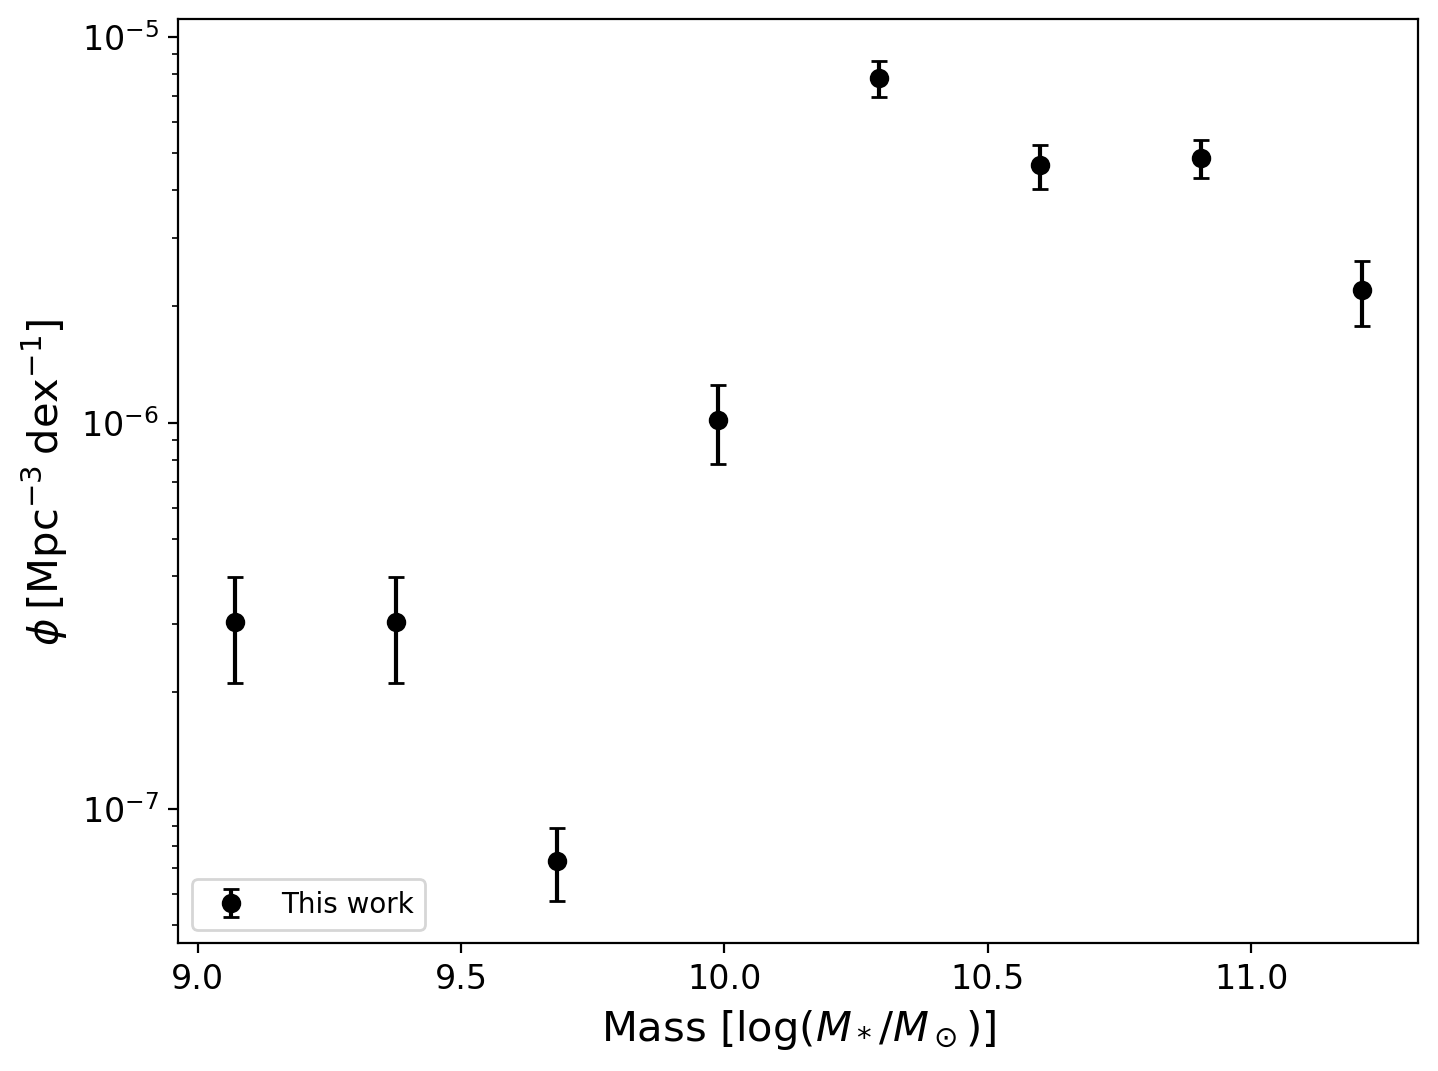

In [30]:
rs_bins = [[3.5,4.5]]

import math
z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = bin_width
bin_gap_rs = 0.5
init_mass = 8.0

plt.figure(figsize=(8,6), dpi = 200)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

n = math.ceil(5/bin_gap_rs)

m = math.ceil((12-init_mass)/bin_gap_mass)

mass_bins = []

for i in range(m):
    mass_bins.append((init_mass + i * bin_gap_mass, init_mass + (i+1) * bin_gap_mass))

colors = plt.cm.viridis(np.linspace(0, 1, len(rs_bins)+1))

for i in range(0, len(rs_bins)):

    list_mass_dum = []
    list_qui_dens = []
    list_err_dum = []
    
    z_low = rs_bins[i][0]
    z_high = rs_bins[i][1]
    
    idx_sel_qui = np.where((z_qui > z_low) & (z_qui < z_high))

    d_low = cosmo.luminosity_distance(z_low).value
    d_high = cosmo.luminosity_distance(z_high).value
    ang_d_low = cosmo.comoving_distance(z_low).value
    ang_d_high = cosmo.comoving_distance(z_high).value
    ang_d_mid = (ang_d_low+ang_d_high)/2
    
    vol1 = (area[0]*ang_d_mid**2*(d_high-d_low))
    vol2 = (area[1]*ang_d_mid**2*(d_high-d_low))
    vol3 = (area[2]*ang_d_mid**2*(d_high-d_low))
    vol4 = (area[3]*ang_d_mid**2*(d_high-d_low))

    if len(idx_sel_qui[0]) > 0:

        for j in range(m):

            bin_range = mass_bins[j]

            idx_sel_mass_qui1 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 < n1))
            idx_sel_mass_qui2 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1) & (idx_sel_qui[0]+1 < n1+n2))
            idx_sel_mass_qui3 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1+n2) & (idx_sel_qui[0]+1 < n1+n2+n3))
            idx_sel_mass_qui4 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1+n2+n3))
            
            qui1 = len(idx_sel_mass_qui1[0])
            qui2 = len(idx_sel_mass_qui2[0])
            qui3 = len(idx_sel_mass_qui3[0])
            qui4 = len(idx_sel_mass_qui4[0])
            
            if qui1 + qui2 + qui3 + qui4 > 0:
            
                density1 = qui1/vol1
                density2 = qui2/vol2
                density3 = qui3/vol3
                density4 = qui4/vol4

                err1 = np.sqrt(qui1)/vol1
                err2 = np.sqrt(qui2)/vol2
                err3 = np.sqrt(qui3)/vol3
                err4 = np.sqrt(qui4)/vol4

                list_mass_dum.append((bin_range[0]+bin_range[1])/2)
                list_qui_dens.append(density1+density2+density3+density4)
                list_err_dum.append(np.sqrt(err1**2+err2**2+err3**2+err4**2))

        list_mass = np.array(list_mass_dum)
        list_qui_dens = np.array(list_qui_dens)
        list_err = np.array(list_err_dum)

        #plt.plot(list_mass, list_qui_dens/bin_gap_mass, label=str(z_low) + r' < $z_{phot}$ < ' + str(z_high), c = colors[i])
        plt.errorbar(list_mass, list_qui_dens/bin_gap_mass, yerr=list_err, fmt='o', capsize=3, markersize=6, linestyle='None', c = 'black',label='This work')

        #plt.scatter(list_mass, list_frac)

#plt.xlim(6,12)
#plt.ylim(1e-12,1e-9)
mass = np.linspace(9.5,11.5,100)
#plt.plot(mass,phi(mass), c = 'blue', linestyle='--',label='Edward et al. (2023)')
plt.xlabel(r'Mass [log$(M_*/M_\odot)]$', size=15)
plt.ylabel(r'$\phi\: [\text{Mpc}^{-3}\: \text{dex}^{-1}]$', size=15)
plt.tick_params(axis='both', which='both', labelsize=12)
plt.yscale('log')
plt.legend(loc='lower left')
plt.show()

In [60]:
with open('3.5z4.5.txt', 'w') as file:
    line = f"log_mass\t\tphi\t\t\tphi_err\n"
    file.write(line)
    for i in range(len(list_mass)):
        line = f"{list_mass[i]}\t{list_qui_dens[i]/bin_gap_mass}\t{list_err[i]}\n"
        file.write(line)

In [36]:
import piXedfit
rs_bins = [[2.0, 2.5], [2.5, 3.0], [3.0, 3.5], [3.5, 4.], [4., 5.], [5., 7.0]]
#rs_bins = [[2.0, 2.5], [2.5, 3.0], [3.0, 3.5], [3.5, 4.0], [4.0, 5.5], [5.5, 7.0]]

import math
z_qui = z_sel[idx_sfms]
# total galaxy

bin_gap_mass = bin_width
bin_gap_rs = 0.5
init_mass = 8.0

plt.figure(figsize=(8,6), dpi = 200)
#plt.title('Fraction of Quiescent Galaxies Compared to Total Number of Galaxies in a Given Mass')

n = math.ceil(5/bin_gap_rs)

m = math.ceil((12-init_mass)/bin_gap_mass)

mass_bins = []

for i in range(m):
    mass_bins.append((init_mass + i * bin_gap_mass, init_mass + (i+1) * bin_gap_mass))

colors = plt.cm.viridis(np.linspace(0, 1, len(rs_bins)+1))

for i in range(0, len(rs_bins)):

    list_mass_dum = []
    list_qui_dens = []
    list_err_dum = []
    
    z_low = rs_bins[i][0]
    z_high = rs_bins[i][1]
    
    idx_sel_qui = np.where((z_qui > z_low) & (z_qui < z_high))

    d_low = cosmo.luminosity_distance(z_low).value
    d_high = cosmo.luminosity_distance(z_high).value
    Mpc_per_pix_low = piXedfit.piXedfit_images.kpc_per_pixel(z_low,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*(z_low+1)/1000
    Mpc_per_pix_high = piXedfit.piXedfit_images.kpc_per_pixel(z_high,0.04, cosmo='flat_LCDM', H0=70.0, Om0=0.3)*(z_high+1)/1000
    Mpc_per_pix = (Mpc_per_pix_low+Mpc_per_pix_high)/2
    
    vol1 = (pix[0]*Mpc_per_pix**2*(d_high-d_low))
    vol2 = (pix[1]*Mpc_per_pix**2*(d_high-d_low))
    vol3 = (pix[2]*Mpc_per_pix**2*(d_high-d_low))
    vol4 = (pix[3]*Mpc_per_pix**2*(d_high-d_low))

    if len(idx_sel_qui[0]) > 0:

        for j in range(m):

            bin_range = mass_bins[j]

            idx_sel_mass_qui1 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 < n1))
            idx_sel_mass_qui2 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1) & (idx_sel_qui[0]+1 < n1+n2))
            idx_sel_mass_qui3 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1+n2) & (idx_sel_qui[0]+1 < n1+n2+n3))
            idx_sel_mass_qui4 = np.where((mass_sel[idx_sel_qui[0]] > bin_range[0]) & (mass_sel[idx_sel_qui[0]] < bin_range[1]) & (idx_sel_qui[0]+1 > n1+n2+n3))
            
            qui1 = len(idx_sel_mass_qui1[0])
            qui2 = len(idx_sel_mass_qui2[0])
            qui3 = len(idx_sel_mass_qui3[0])
            qui4 = len(idx_sel_mass_qui4[0])
            
            if qui1 + qui2 + qui3 + qui4 > 0:
            
                density1 = qui1/vol1
                density2 = qui2/vol2
                density3 = qui3/vol3
                density4 = qui4/vol4

                err1 = np.sqrt(qui1)/vol1
                err2 = np.sqrt(qui2)/vol2
                err3 = np.sqrt(qui3)/vol3
                err4 = np.sqrt(qui4)/vol4

                list_mass_dum.append((bin_range[0]+bin_range[1])/2)
                list_qui_dens.append(density1+density2+density3+density4)
                list_err_dum.append(np.sqrt(err1**2+err2**2+err3**2+err4**2))

        list_mass = np.array(list_mass_dum)
        list_qui_dens = np.array(list_qui_dens)
        list_err = np.array(list_err_dum)
        with open('r{}z{}.txt'.format(z_low,z_high), 'w') as file:
            line = f"#log_mass\t\tphi\t\t\tphi_err\n"
            file.write(line)
            for i in range(len(list_mass)):
                line = f"{list_mass[i]}\t{list_qui_dens[i]/bin_gap_mass}\t{list_err[i]}\n"
                file.write(line)

<Figure size 1600x1200 with 0 Axes>

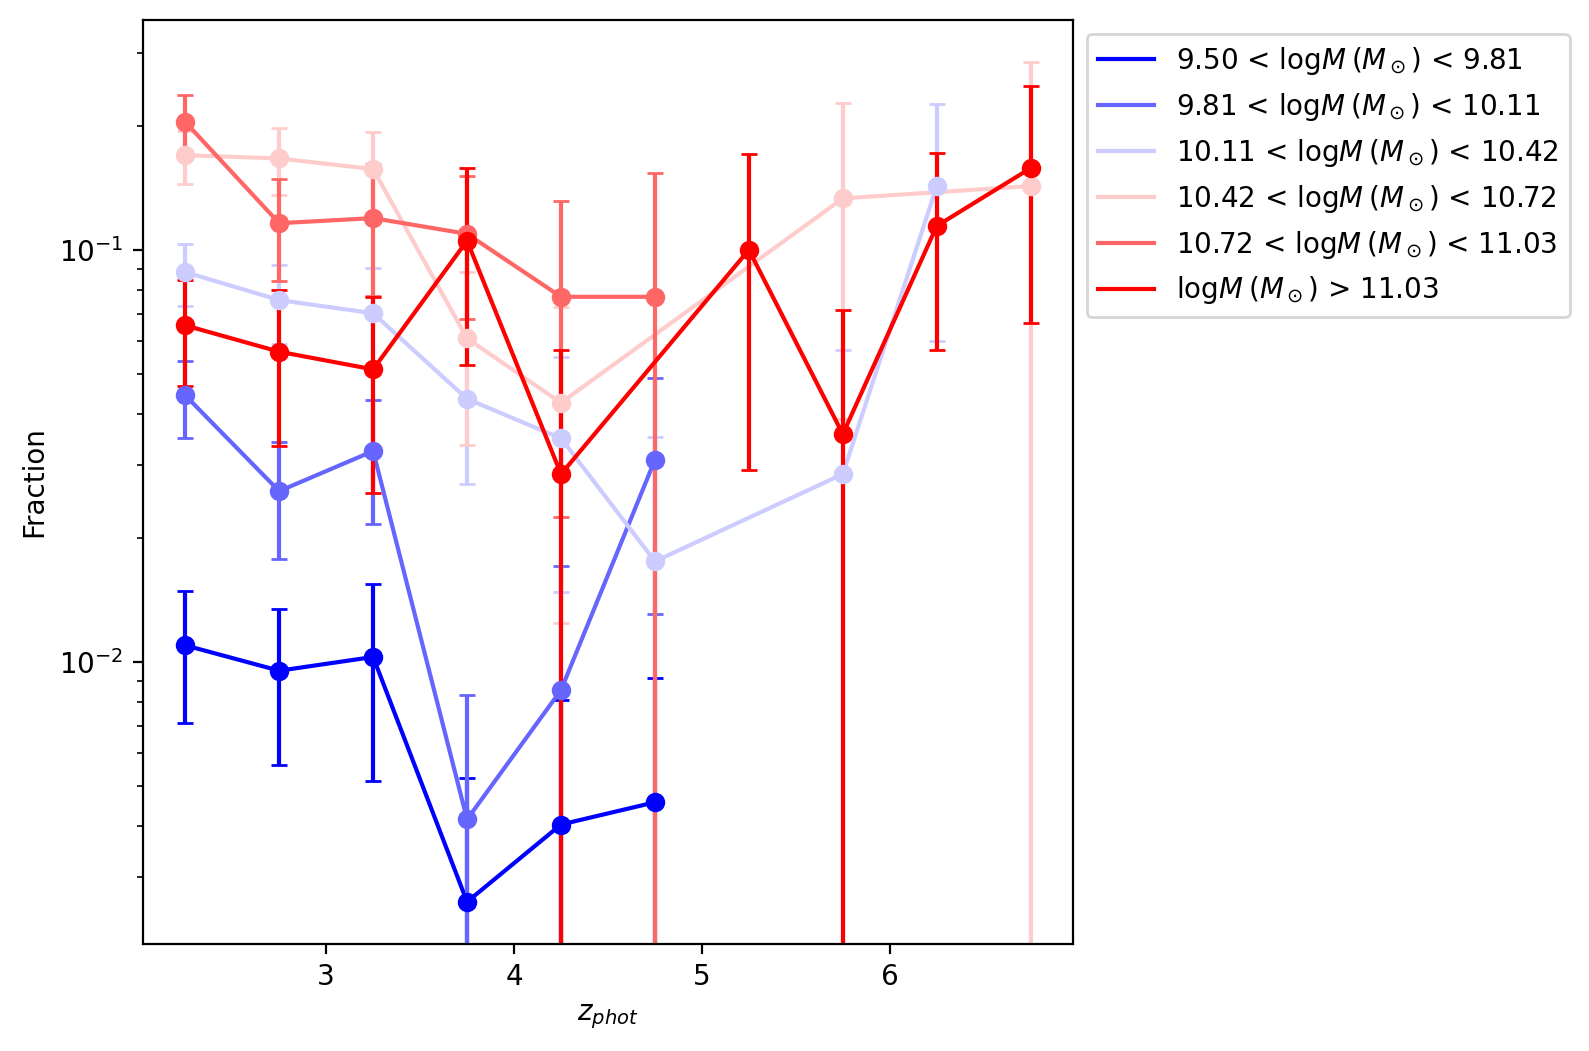

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt

z_qui = z_sel[idx_sfms]
bin_gap_mass = bin_width
bin_gap_rs = 0.5

plt.figure(figsize=(6, 6), dpi=200)
plt.xlabel(r'$z_{phot}$')
plt.ylabel('Fraction')
plt.yscale('log')

n = math.ceil((11-9.5)/bin_gap_mass)

mass_bins = []

for i in range(n):
    mass_bins.append((9.5 + i * bin_gap_mass, 9.5 + (i+1) * bin_gap_mass))
    
mass_bins.append((9.5 + n * bin_gap_mass, np.inf))

label_list = []

for i in range(n):
    label_list.append(f"{mass_bins[i][0]:.2f} < log$M\: (M_\odot)$ < {mass_bins[i][1]:.2f}")
    
label_list.append(f"log$M\: (M_\odot)$ > {mass_bins[n][0]:.2f}")

colors = plt.cm.bwr(np.linspace(0, 1, n+1))

for idx in range(n+1):
    list_frac_dum = []
    list_rs_dum = []
    list_qui_dum = []
    
    bin_range = mass_bins[idx]

    idx_sel_tot = np.where((np.log10(SM) > bin_range[0]) & (np.log10(SM) < bin_range[1]))
    idx_sel_qui = np.where((mass_sel > bin_range[0]) & (mass_sel < bin_range[1]))

    if len(idx_sel_qui[0]) > 0:

        for i in range(0, math.ceil(5 / bin_gap_rs)):
            idx_sel_rs_tot = np.where((z_phot[idx_sel_tot[0]] > (2 + i * bin_gap_rs)) & (z_phot[idx_sel_tot[0]] < (2 + (i + 1) * bin_gap_rs)))
            idx_sel_rs_qui = np.where((z_qui[idx_sel_qui[0]] > (2 + i * bin_gap_rs)) & (z_qui[idx_sel_qui[0]] < (2 + (i + 1) * bin_gap_rs)))

            if len(idx_sel_rs_qui[0]) > 0:
                list_frac_dum.append(len(idx_sel_rs_qui[0]) / len(idx_sel_rs_tot[0]))
                list_rs_dum.append((2.0 + (i + 0.5) * bin_gap_rs))
                list_qui_dum.append(len(idx_sel_rs_qui[0]))

        list_frac = np.array(list_frac_dum)
        list_rs = np.array(list_rs_dum)
        list_qui = np.array(list_qui_dum)
        
        tot = list_qui / list_frac
        err_qui = np.sqrt(list_qui)
        err_tot = np.sqrt(tot)
        error = np.sqrt( list_frac**2 * err_qui**2 / list_qui**2 + list_frac**4 * err_tot**2 / tot**2 )

        plt.plot(list_rs, list_frac, label=label_list[idx], c = colors[idx])
        plt.errorbar(list_rs, list_frac, yerr=error, fmt='o', capsize=3, markersize=6, linestyle='None', c = colors[idx])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


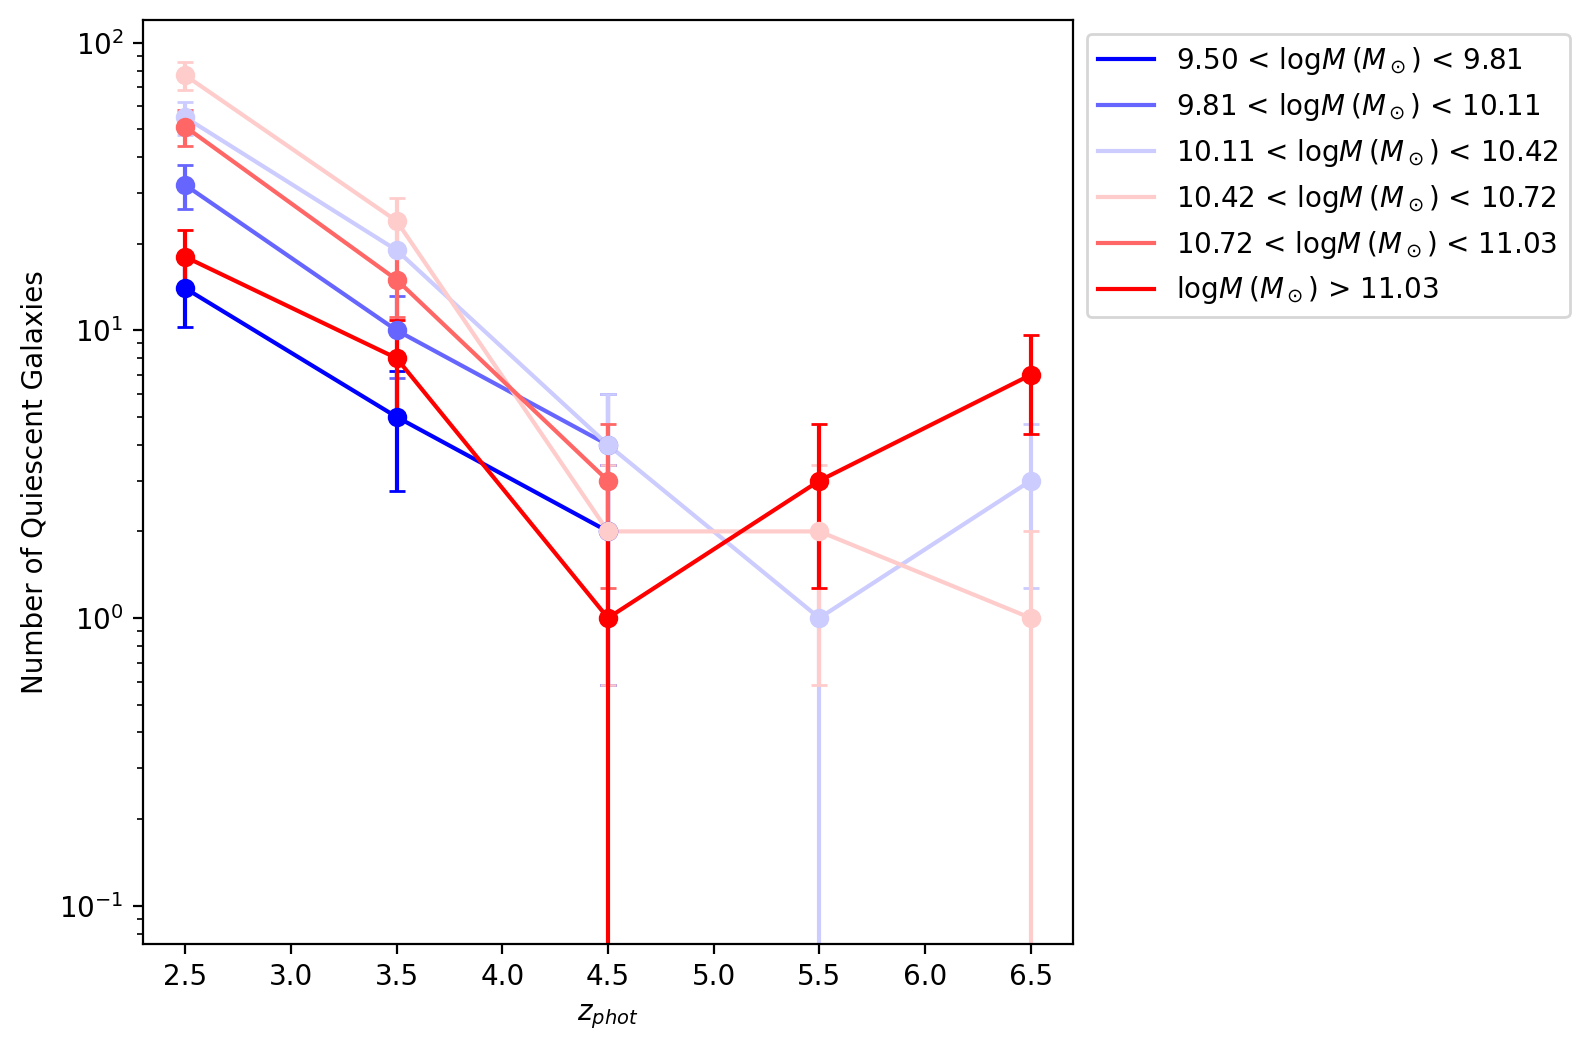

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Assuming the existence of variables z_phot, z_sel, idx_sfms, SM, and mass_sel

z_qui = z_sel[idx_sfms]
bin_gap_mass = bin_width
bin_gap_rs = 1

plt.figure(figsize=(6, 6), dpi=200)
plt.xlabel(r'$z_{phot}$')
plt.ylabel('Number of Quiescent Galaxies')
plt.yscale('log')

n = math.ceil((11-9.5)/bin_gap_mass)

# creating mass bins
mass_bins = []

for i in range(n):
    mass_bins.append((9.5 + i * bin_gap_mass, 9.5 + (i+1) * bin_gap_mass))
    
mass_bins.append((9.5 + n * bin_gap_mass, np.inf))

# creating list of labels
label_list = []

for i in range(n):
    label_list.append(f"{mass_bins[i][0]:.2f} < log$M\: (M_\odot)$ < {mass_bins[i][1]:.2f}")
    
label_list.append(f"log$M\: (M_\odot)$ > {mass_bins[n][0]:.2f}")



colors = plt.cm.bwr(np.linspace(0, 1, n+1))

for idx in range(n+1):
    list_frac_dum = []
    list_rs_dum = []
    list_qui_dum = []
    
    bin_range = mass_bins[idx]
    
    idx_sel_tot = np.where((np.log10(SM) > bin_range[0]) & (np.log10(SM) < bin_range[1]))
    idx_sel_qui = np.where((mass_sel > bin_range[0]) & (mass_sel < bin_range[1]))

    
    if len(idx_sel_qui[0]) > 0:

        for i in range(0, math.ceil(5 / bin_gap_rs)):
            idx_sel_rs_tot = np.where((z_phot[idx_sel_tot[0]] > (2 + i * bin_gap_rs)) & (z_phot[idx_sel_tot[0]] < (2 + (i + 1) * bin_gap_rs)))
            idx_sel_rs_qui = np.where((z_qui[idx_sel_qui[0]] > (2 + i * bin_gap_rs)) & (z_qui[idx_sel_qui[0]] < (2 + (i + 1) * bin_gap_rs)))

            if len(idx_sel_rs_qui[0]) > 0:

                list_frac_dum.append(len(idx_sel_rs_qui[0]) / len(idx_sel_rs_tot[0]))
                list_rs_dum.append((2.0 + ( i + 0.5 ) * bin_gap_rs))
                list_qui_dum.append(len(idx_sel_rs_qui[0]))

        list_frac = np.array(list_frac_dum)
        list_rs = np.array(list_rs_dum)
        list_qui = np.array(list_qui_dum)

        plt.plot(list_rs, list_qui, label=label_list[idx], c = colors[idx])
        plt.errorbar(list_rs, list_qui, yerr=np.sqrt(list_qui), fmt='o', capsize=3, markersize=6, linestyle='None', c = colors[idx])
        
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


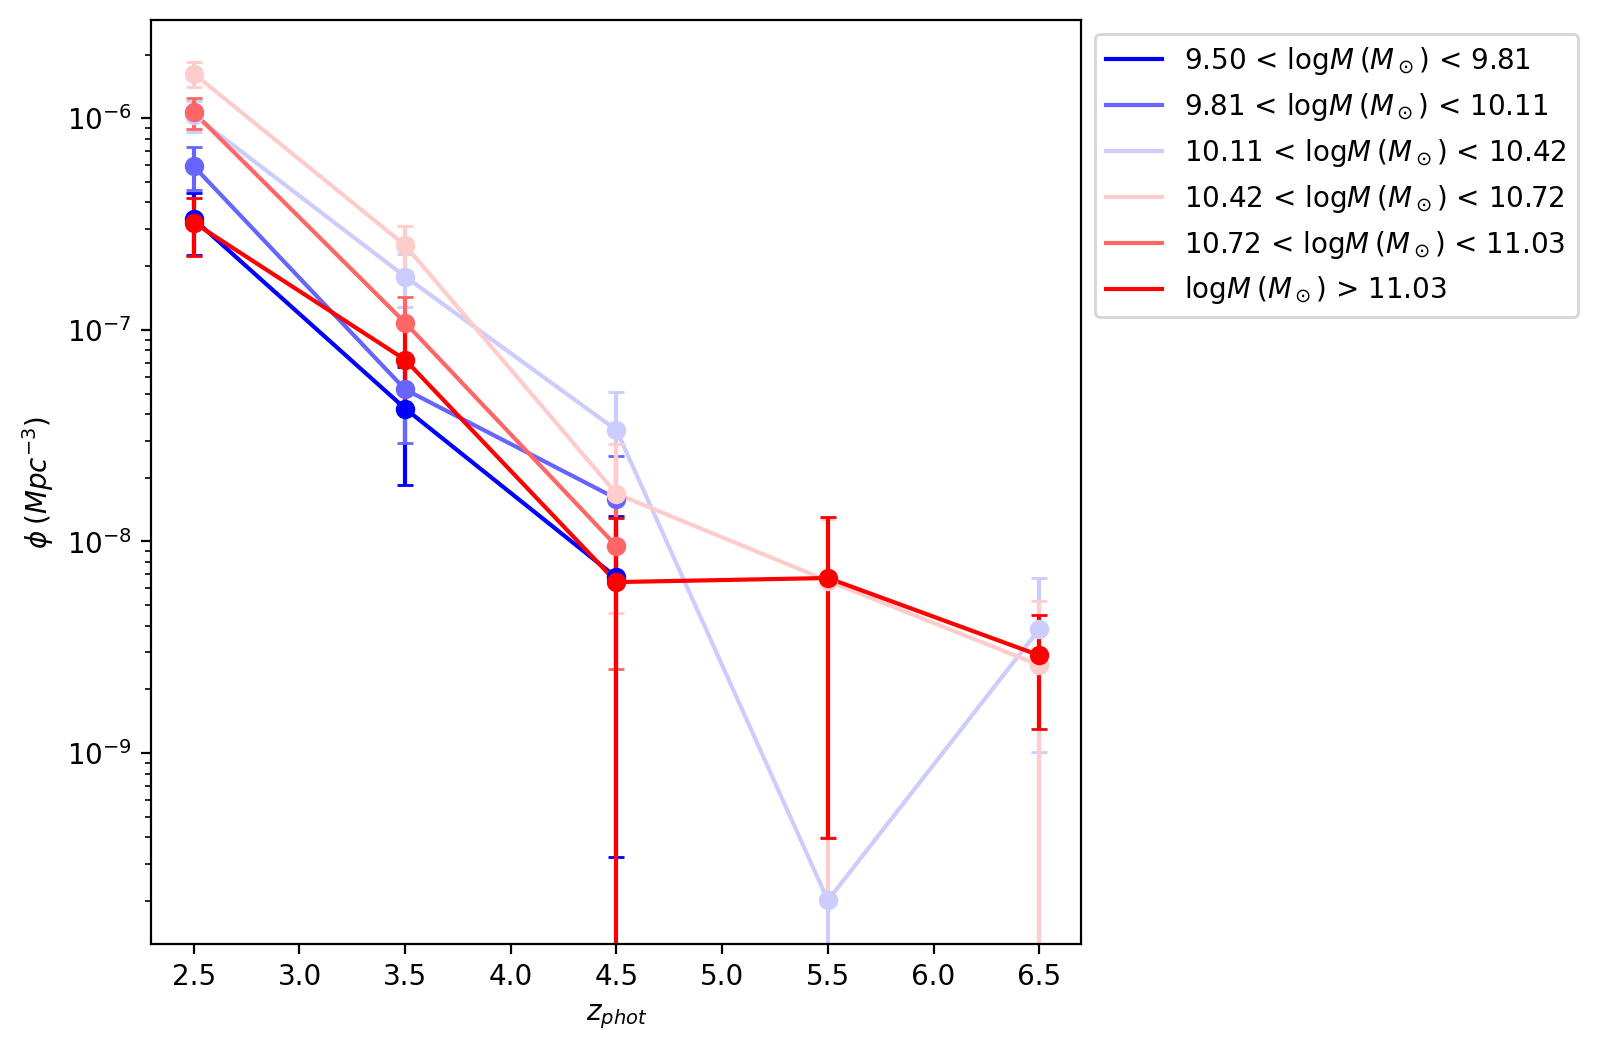

In [33]:
import math
z_qui = z_sel[idx_sfms]

bin_gap_mass = bin_width
bin_gap_rs = 1

plt.figure(figsize=(6, 6), dpi=200)
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$\phi\: (Mpc^{-3})$')
plt.yscale('log')

n = math.ceil(5/bin_gap_rs)

# creating mass bins
mass_bins = []

for i in range(n):
    mass_bins.append((9.5 + i * bin_gap_mass, 9.5 + (i+1) * bin_gap_mass))
    
mass_bins.append((9.5 + n * bin_gap_mass, np.inf))

colors = plt.cm.bwr(np.linspace(0, 1, n+1))

# creating list of labels
label_list = []

for i in range(n):
    label_list.append(f"{mass_bins[i][0]:.2f} < log$M\: (M_\odot)$ < {mass_bins[i][1]:.2f}")
    
label_list.append(f"log$M\: (M_\odot)$ > {mass_bins[n][0]:.2f}")

for idx in range(n+1):

    list_rs_dum = []
    list_qui_dens = []
    list_err_dum = []
    
    bin_range = mass_bins[idx]
    
    idx_sel_qui = np.where((mass_sel > bin_range[0]) & (mass_sel < bin_range[1]))

    if len(idx_sel_qui[0]) > 0:
        for i in range(0, math.ceil(5 / bin_gap_rs)):
            
            idx_sel_rs_qui1 = np.where((z_qui[idx_sel_qui[0]] > (2 + i * bin_gap_rs)) & (z_qui[idx_sel_qui[0]] < (2 + (i + 1) * bin_gap_rs)) & (idx_sel_qui[0]+1 < n1))
            idx_sel_rs_qui2 = np.where((z_qui[idx_sel_qui[0]] > (2 + i * bin_gap_rs)) & (z_qui[idx_sel_qui[0]] < (2 + (i + 1) * bin_gap_rs)) & (idx_sel_qui[0]+1 > n1) & (idx_sel_qui[0]+1 < n1+n2))
            idx_sel_rs_qui3 = np.where((z_qui[idx_sel_qui[0]] > (2 + i * bin_gap_rs)) & (z_qui[idx_sel_qui[0]] < (2 + (i + 1) * bin_gap_rs)) & (idx_sel_qui[0]+1 > n1+n2) & (idx_sel_qui[0]+1 < n1+n2+n3))
            idx_sel_rs_qui4 = np.where((z_qui[idx_sel_qui[0]] > (2 + i * bin_gap_rs)) & (z_qui[idx_sel_qui[0]] < (2 + (i + 1) * bin_gap_rs)) & (idx_sel_qui[0]+1 > n1+n2+n3))

            d_low = cosmo.luminosity_distance(2+i*bin_gap_rs).value
            d_high = cosmo.luminosity_distance(2+(i+1)*bin_gap_rs).value
            d_mid = (d_low+d_high)/2

            vol1 = (area[0]*d_mid**2*(d_high-d_low))
            vol2 = (area[1]*d_mid**2*(d_high-d_low))
            vol3 = (area[2]*d_mid**2*(d_high-d_low))
            vol4 = (area[3]*d_mid**2*(d_high-d_low))
            
            qui1 = len(idx_sel_rs_qui1[0])
            qui2 = len(idx_sel_rs_qui2[0])
            qui3 = len(idx_sel_rs_qui3[0])
            qui4 = len(idx_sel_rs_qui4[0])
            
            if (qui1+qui2+qui3+qui4) > 0:
                       
                density1 = qui1/vol1
                density2 = qui2/vol2
                density3 = qui3/vol3
                density4 = qui4/vol4
                       
                err1 = np.sqrt(qui1)/vol1
                err2 = np.sqrt(qui2)/vol2
                err3 = np.sqrt(qui3)/vol3
                err4 = np.sqrt(qui4)/vol4
                       
                list_rs_dum.append((2.0 + ( i + 0.5 ) * bin_gap_rs))
                list_qui_dens.append(density1+density2+density3+density4)
                list_err_dum.append(np.sqrt(err1**2+err2**2+err3**2+err4**2))

        list_rs = np.array(list_rs_dum)
        list_qui_dens = np.array(list_qui_dens)
        list_err = np.array(list_err_dum)

        plt.plot(list_rs, list_qui_dens, label=label_list[idx], c = colors[idx])
        plt.errorbar(list_rs, list_qui_dens, yerr=list_err, fmt='o', capsize=3, markersize=6, linestyle='None', c = colors[idx])

        #plt.scatter(list_mass, list_frac)
        plt.legend(loc='upper left', bbox_to_anchor=(1,1))

#plt.xlim(6,12)
#plt.ylim(1e-12,1e-9)
plt.show()

In [34]:
z225 = np.where((z_qui < 2.5) & (mass_sel < 9.5))

In [35]:
len(z225[0])

36

## Double peak in 2.0 < z < 2.5 check

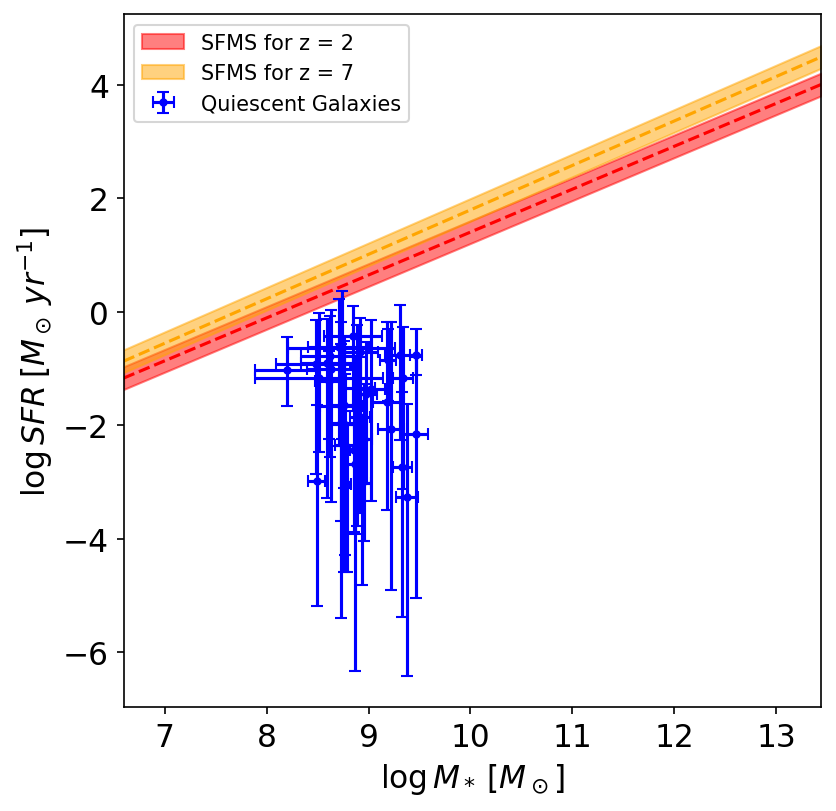

In [36]:
plt.figure(figsize=(6,6), dpi=150)

logM = np.linspace(mass_mid.min()-1, mass_mid.max()+1, 100)

plt.errorbar(mass_sel[z225[0]], sfr_sel[z225[0]], xerr = [mass_low_sel[z225[0]], mass_up_sel[z225[0]]], yerr = [sfr_low_sel[z225[0]], sfr_up_sel[z225[0]]], fmt='o', capsize=3, markersize=3, linestyle='None', c = 'blue', label='Quiescent Galaxies')

plt.plot(logM, log_sfr(logM,2), linestyle='--', c = 'red')
plt.fill_between(logM, log_sfr(logM,2)-0.2, log_sfr(logM,2)+0.2, color='red', alpha=0.5, label='SFMS for z = 2')

plt.plot(logM, log_sfr(logM,7), linestyle='--', c = 'orange')
plt.fill_between(logM, log_sfr(logM,7)-0.2, log_sfr(logM,7)+0.2, color='orange', alpha=0.5, label='SFMS for z = 7')

plt.xlabel(r'$\log{M_*\: [M_\odot]}$', size=15)
plt.ylabel(r'$\log{SFR\: [M_\odot\: yr^{-1}]}$', size=15)

plt.tick_params(axis='both', which='both', labelsize=15)
plt.xlim(mass_mid.min()-1, mass_mid.max()+1)
plt.legend()
plt.savefig('SFMS_ppt.png')
plt.show()

In [37]:
z225cosweb = []
z225ceers = []
z225fresco = []
z225primer = []

idx_comb = np.concatenate((idx_qui_final1,idx_qui_final2,idx_qui_final3,idx_qui_final4))

for i in range(len(idx_comb)):
    if idx_comb[i] in idx_comb[z225[0]]:
        if i+1 < n1:
            z225cosweb.append(idx_comb[i])
        elif n1 < i+1 < n1+n2:
            z225ceers.append(idx_comb[i])
        elif n1+n2 < i+1 < n1+n2+n3:
            z225fresco.append(idx_comb[i])
        else:
            z225primer.append(idx_comb[i])
            
z225cosweb = np.array(z225cosweb)
z225ceers = np.array(z225ceers)
z225fresco = np.array(z225fresco)
z225primer = np.array(z225primer)

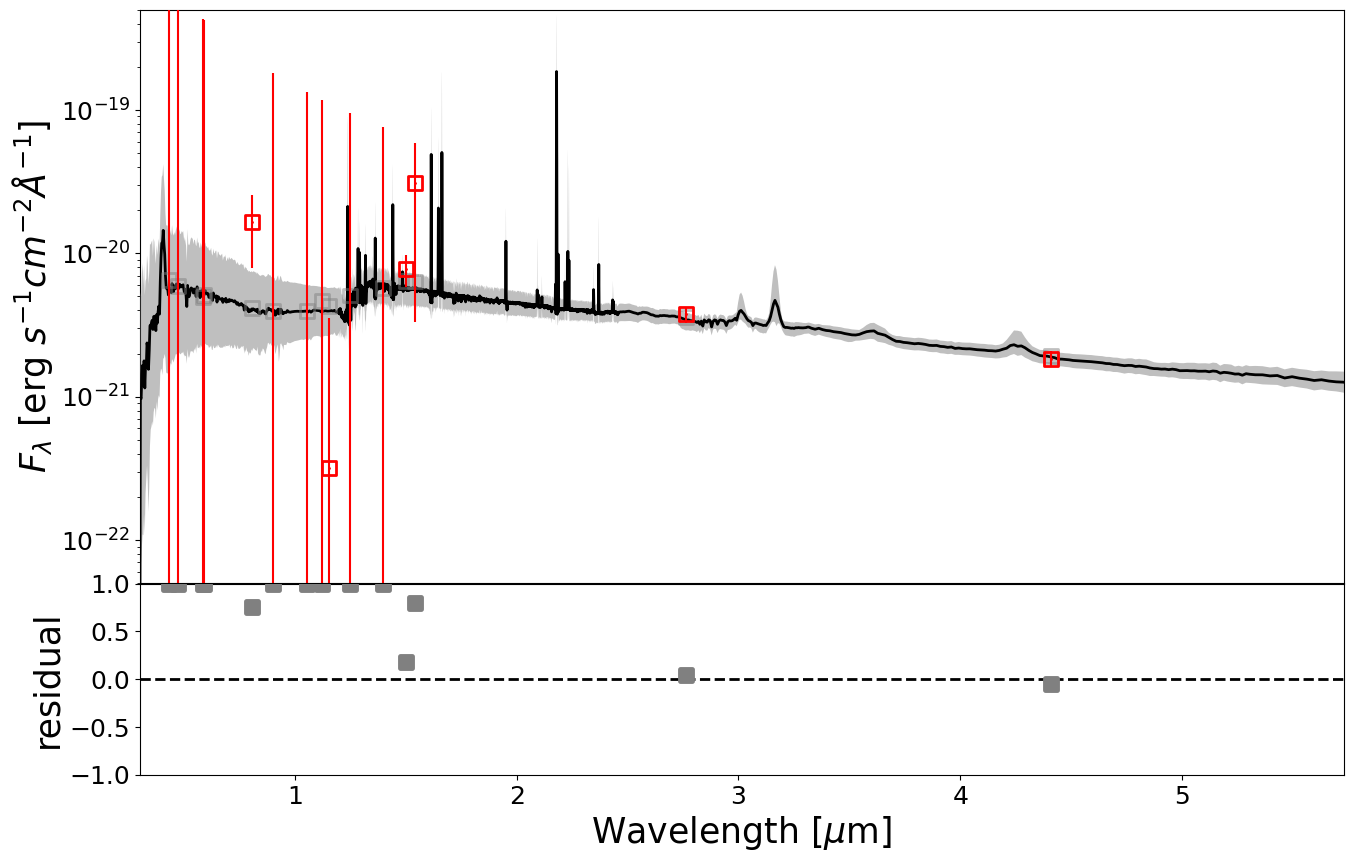

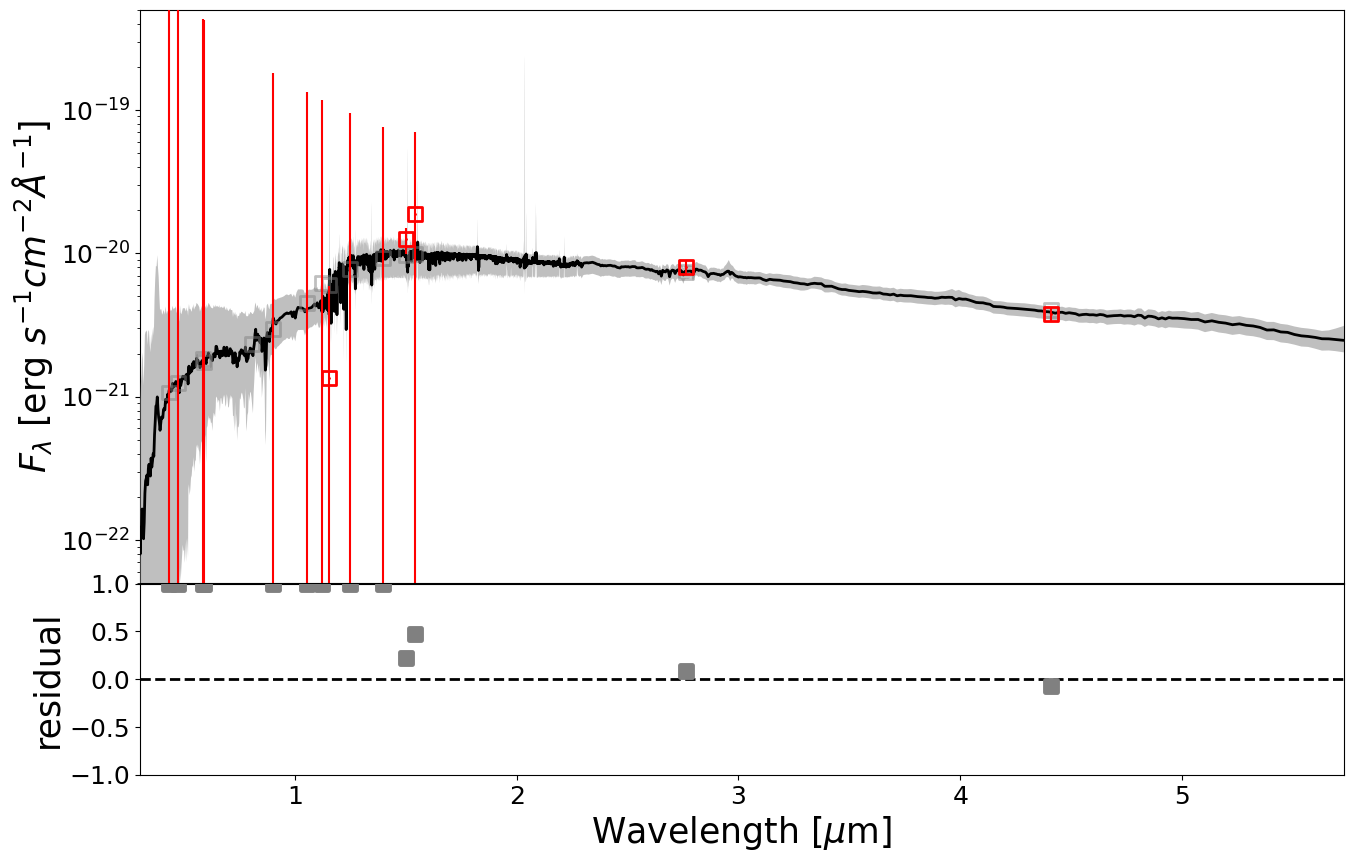

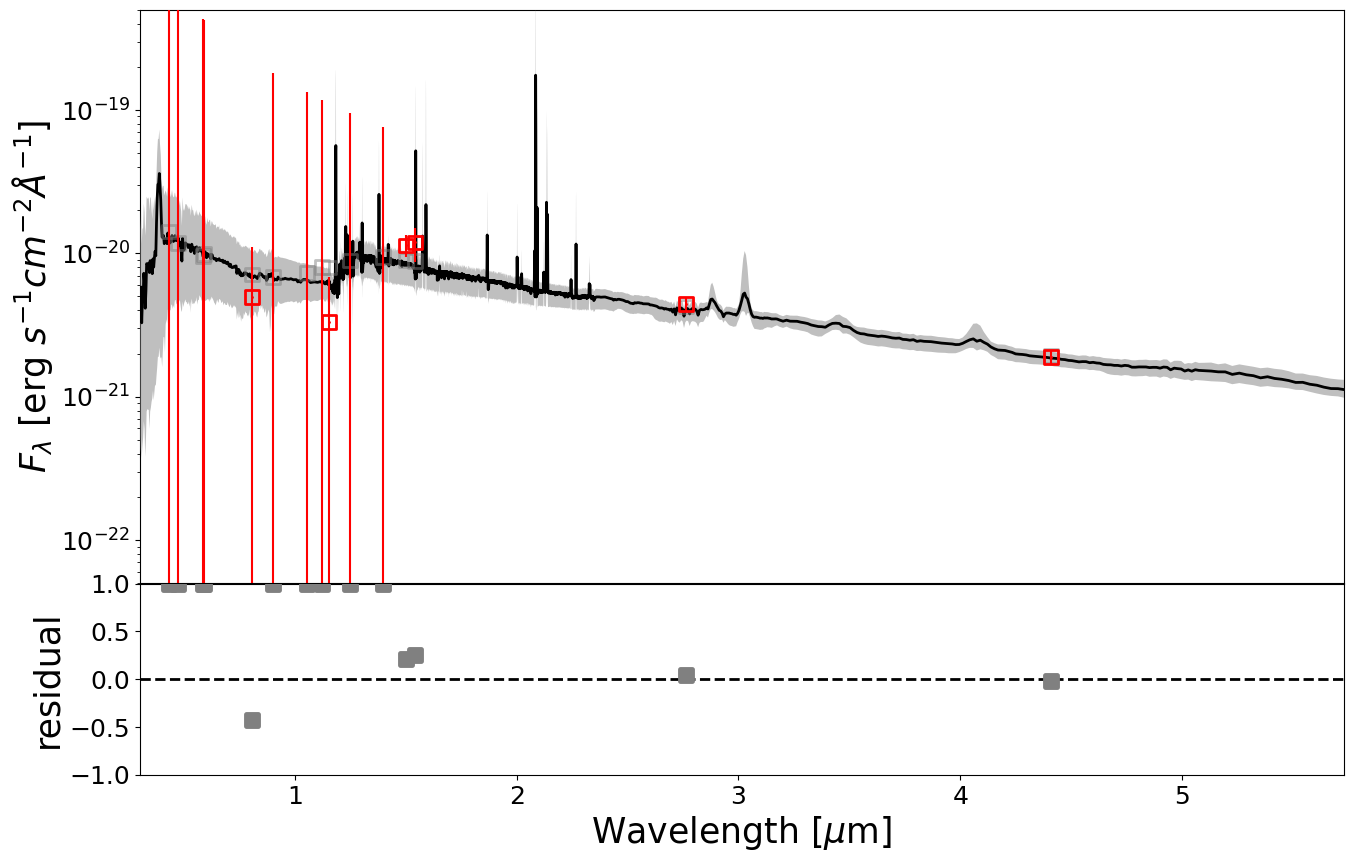

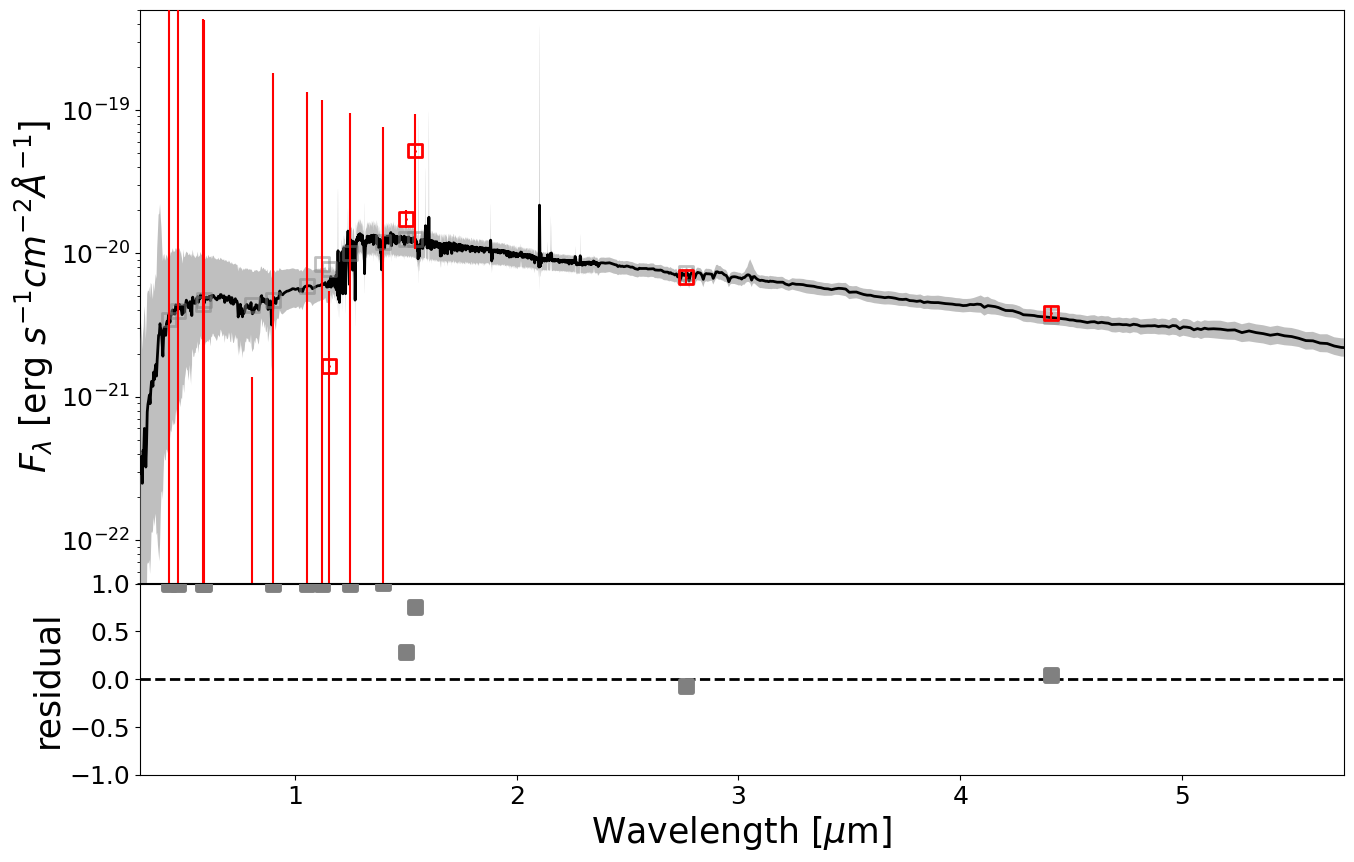

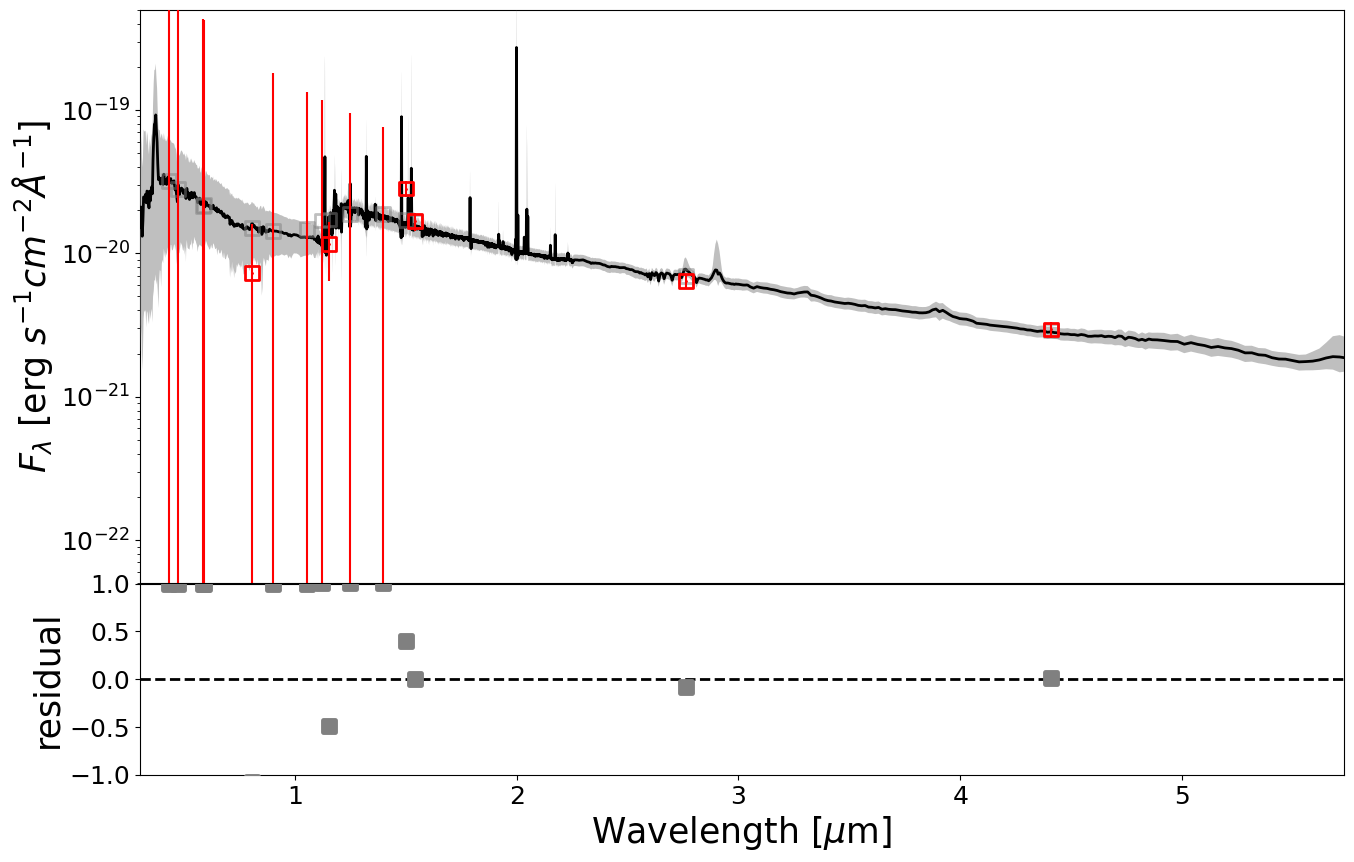

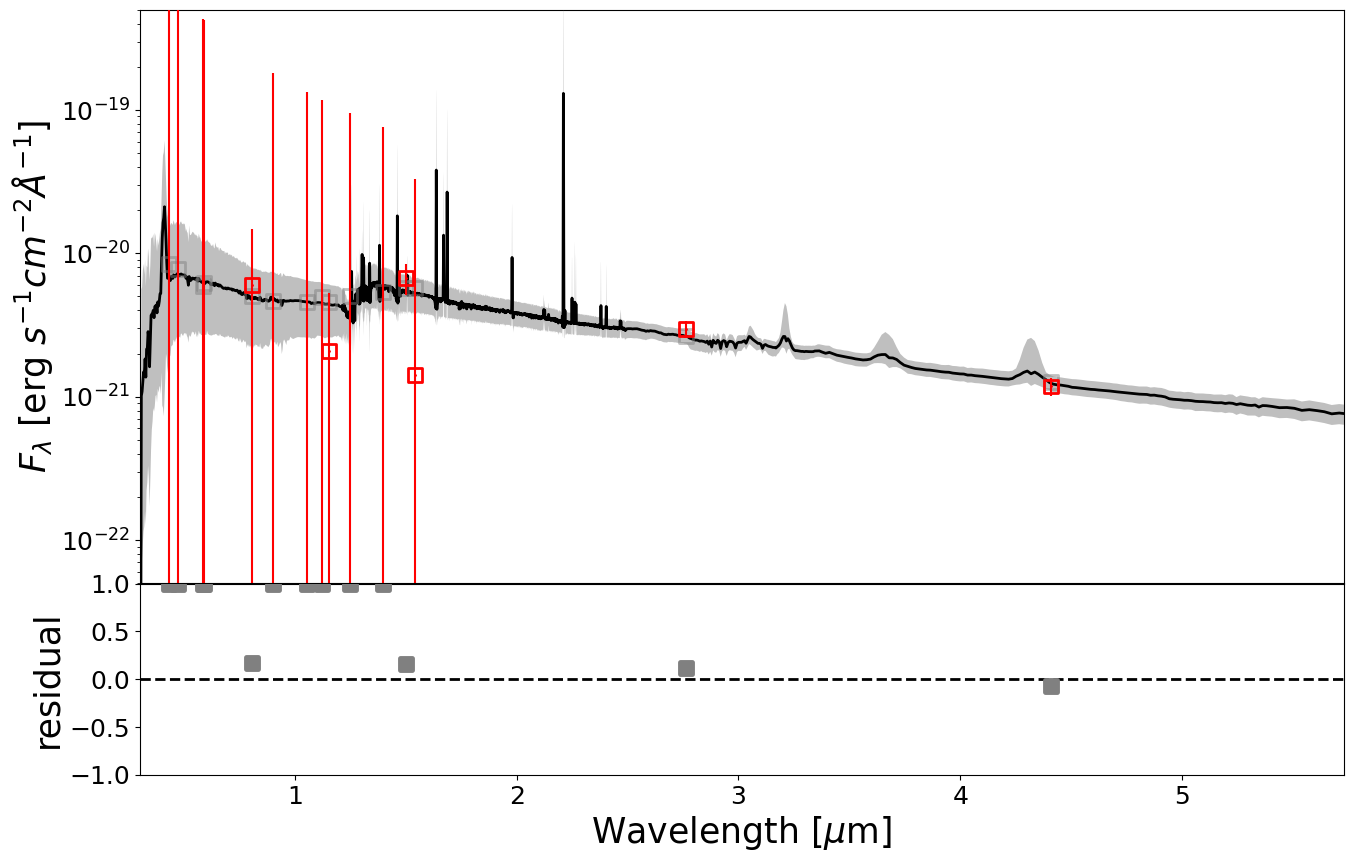

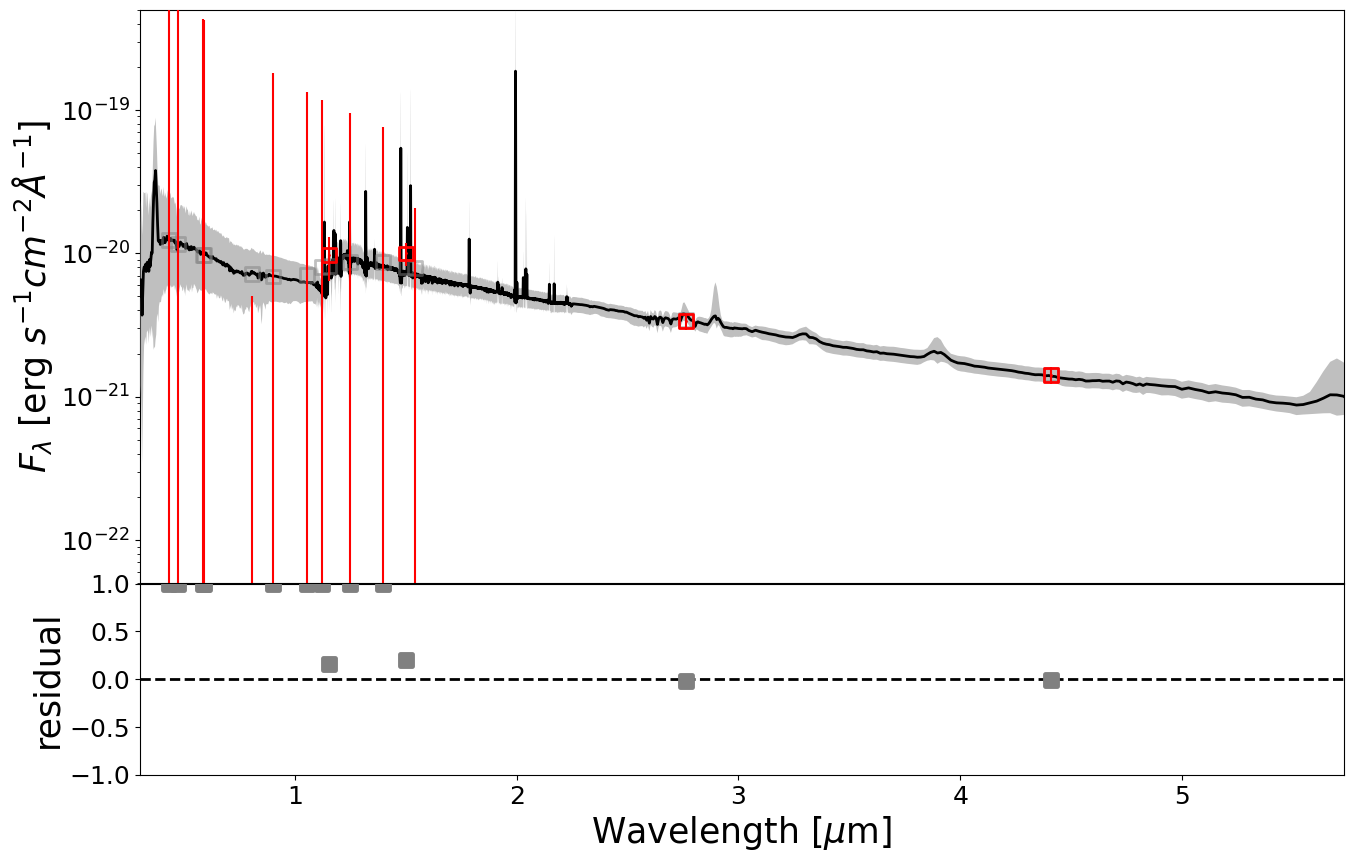

In [38]:
from piXedfit.piXedfit_analysis import plot_SED
from matplotlib.backends.backend_pdf import PdfPages

for i in z225cosweb:
    data = '2_pixedfit_mcmc_{}.fits'.format(i+1)
    plot_SED(data, decompose=0, yrange=[5e-23,5e-19])
    
    
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "SEDs_COSWEB.pdf"
save_multi_image(filename)

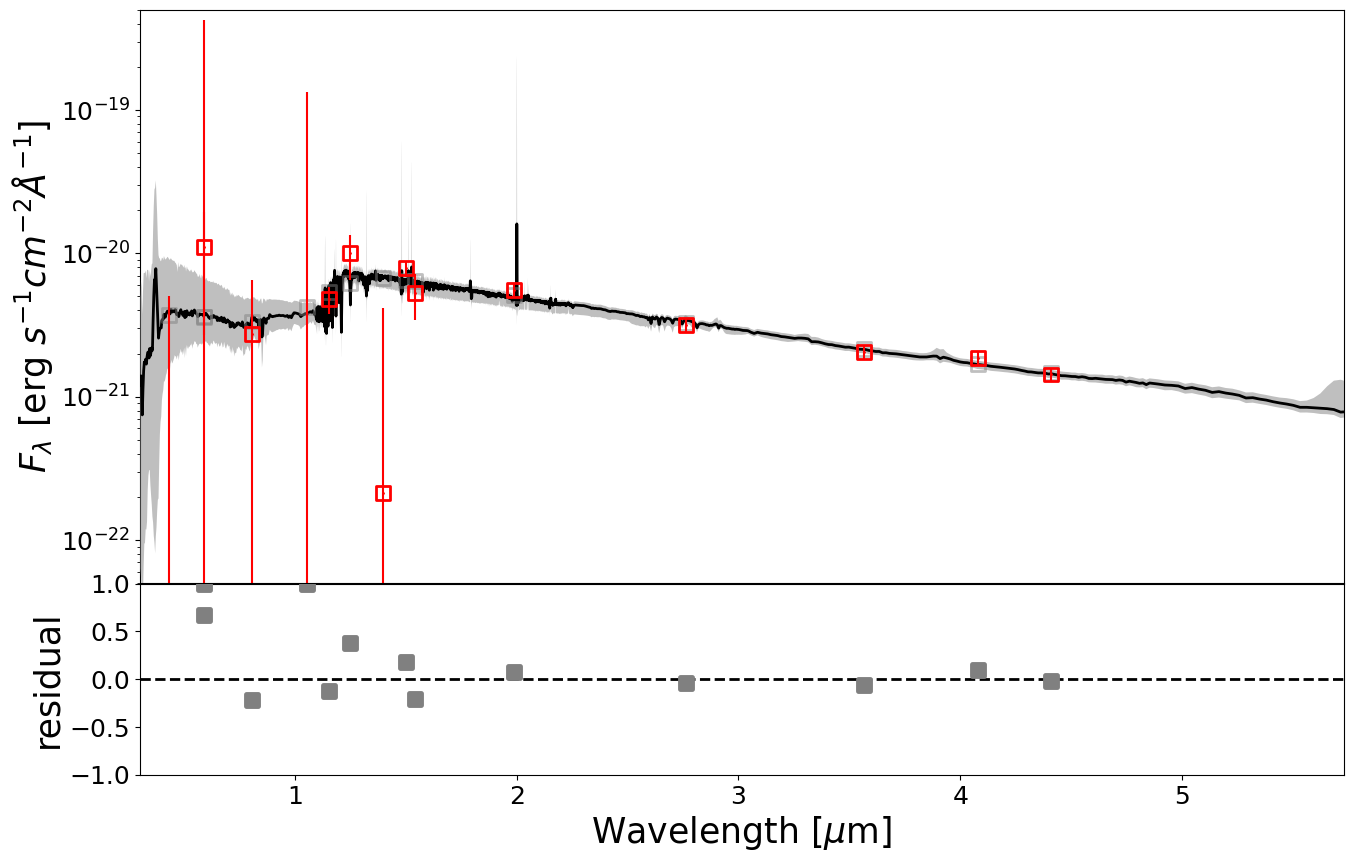

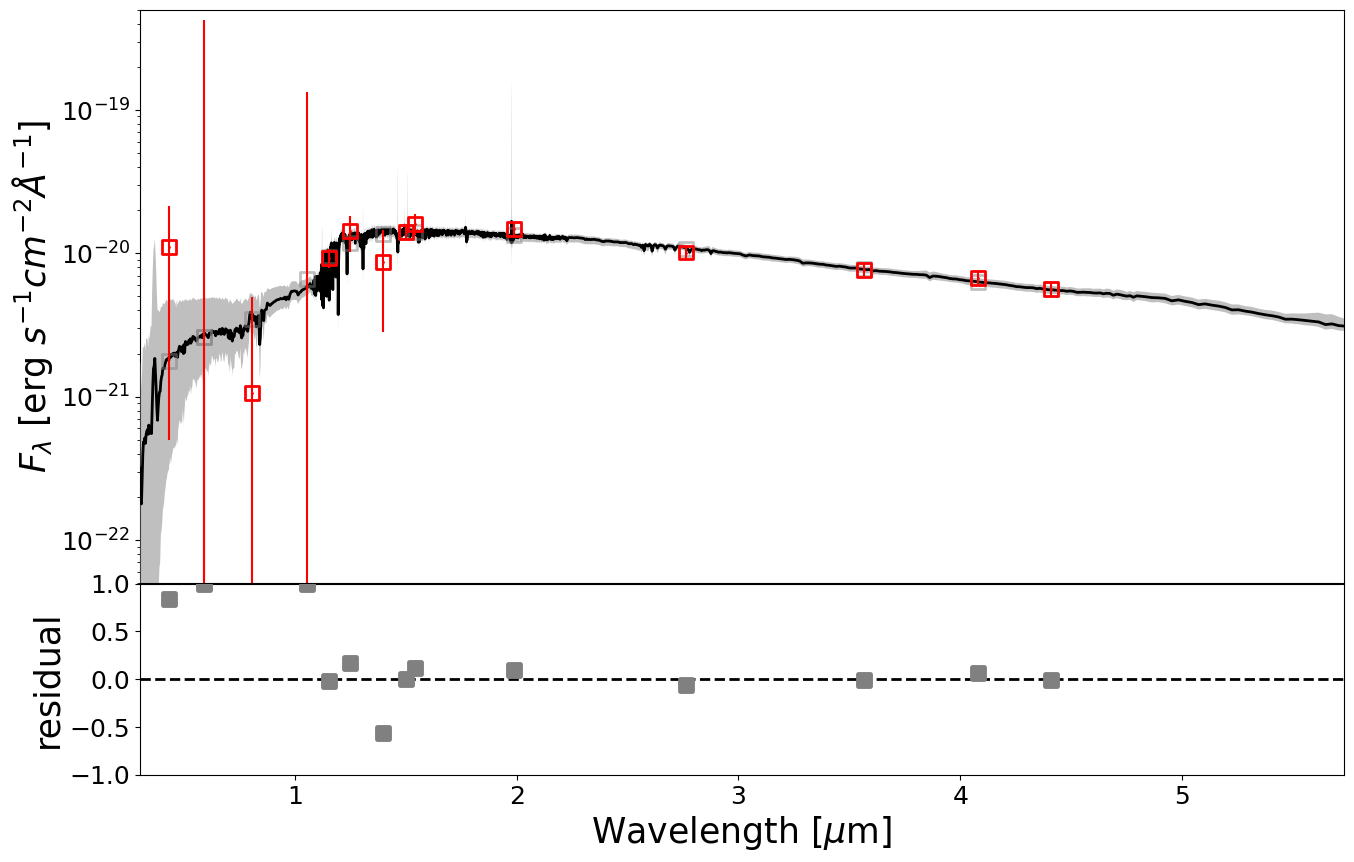

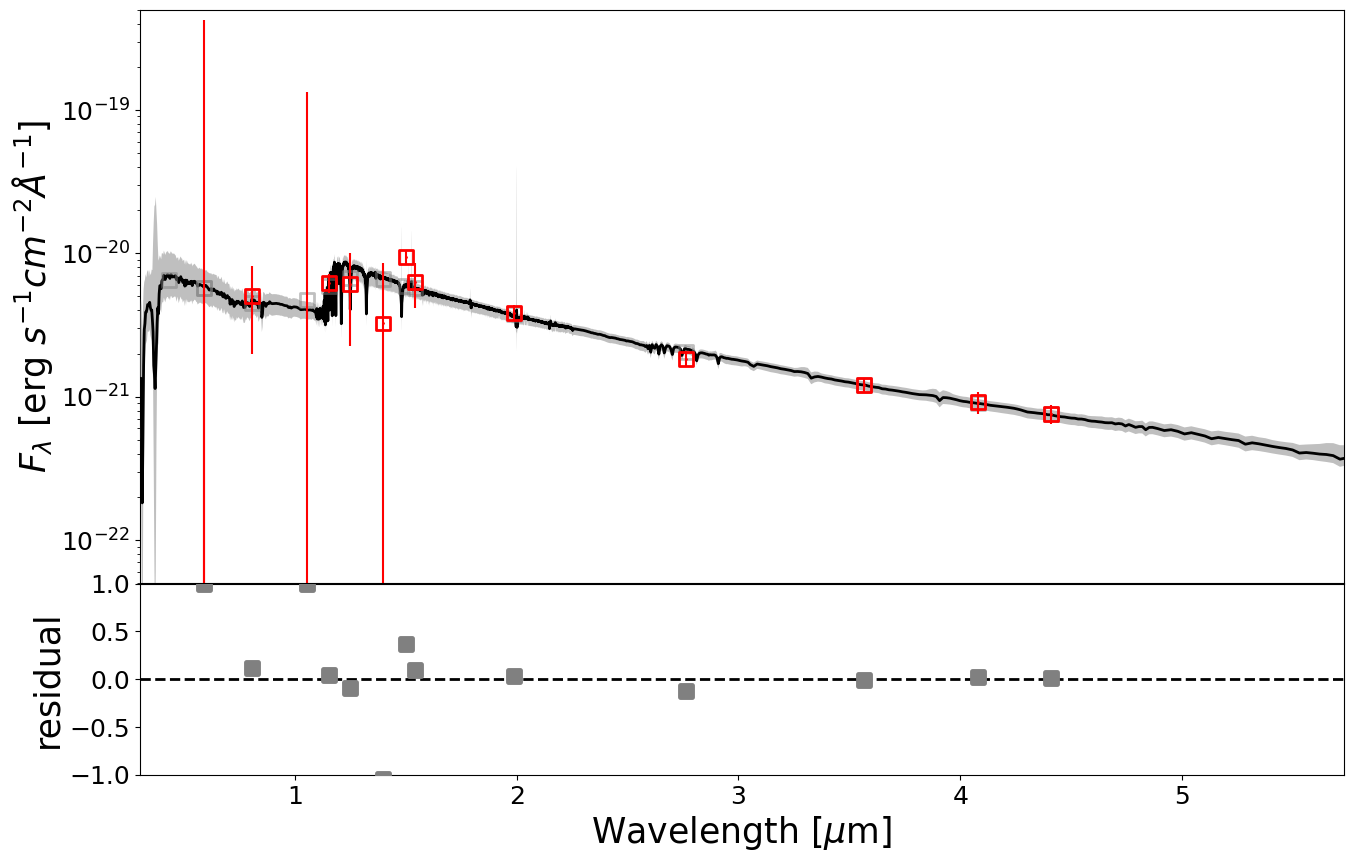

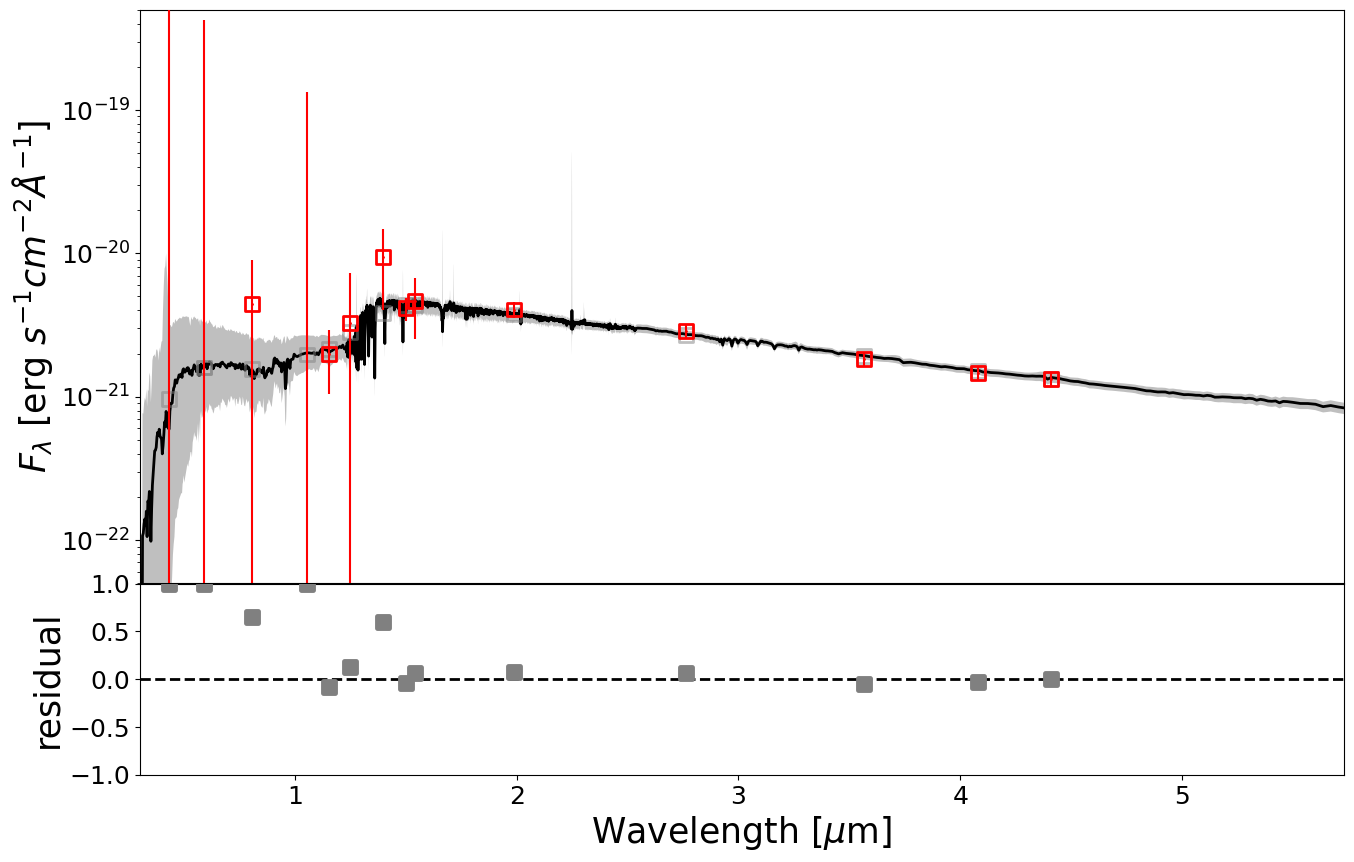

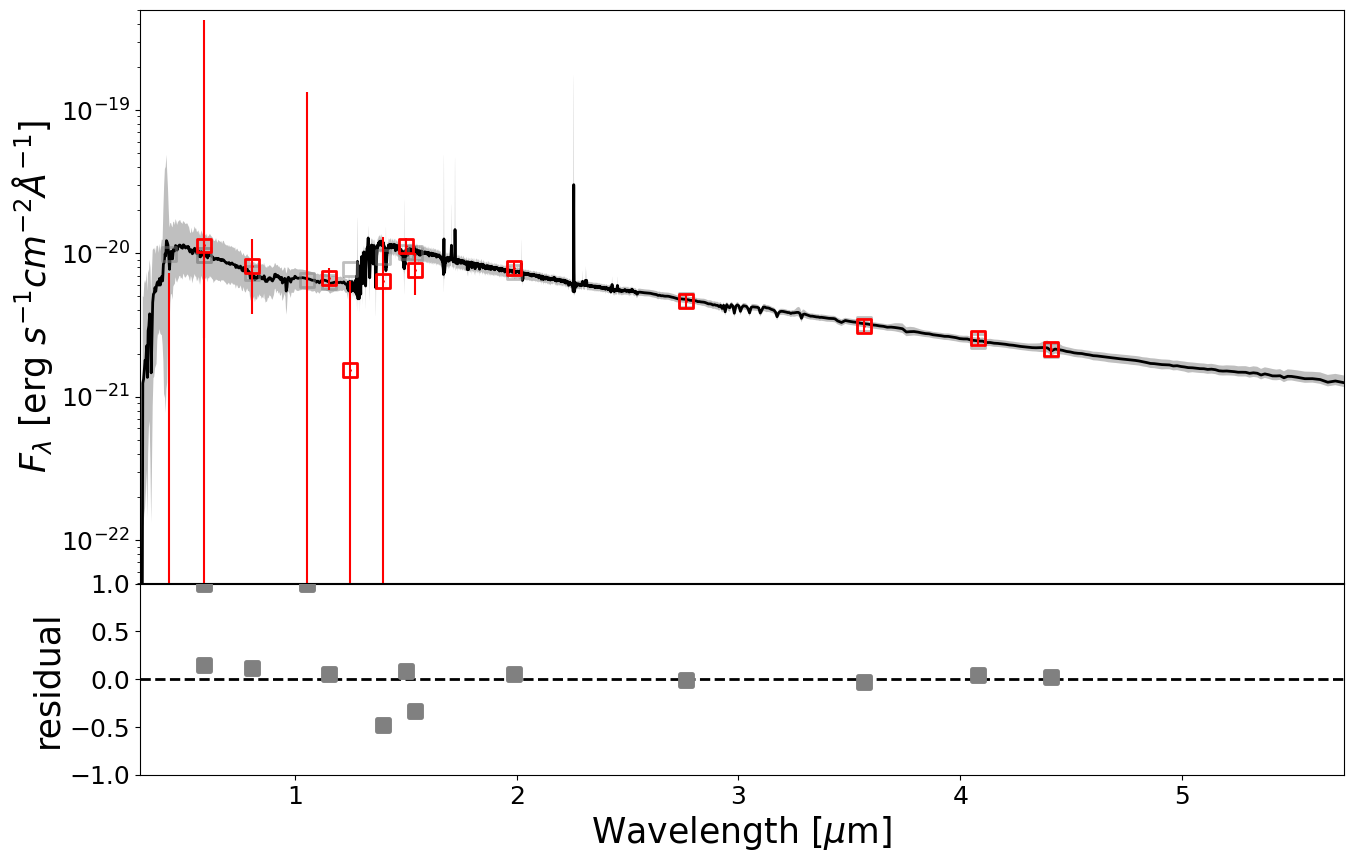

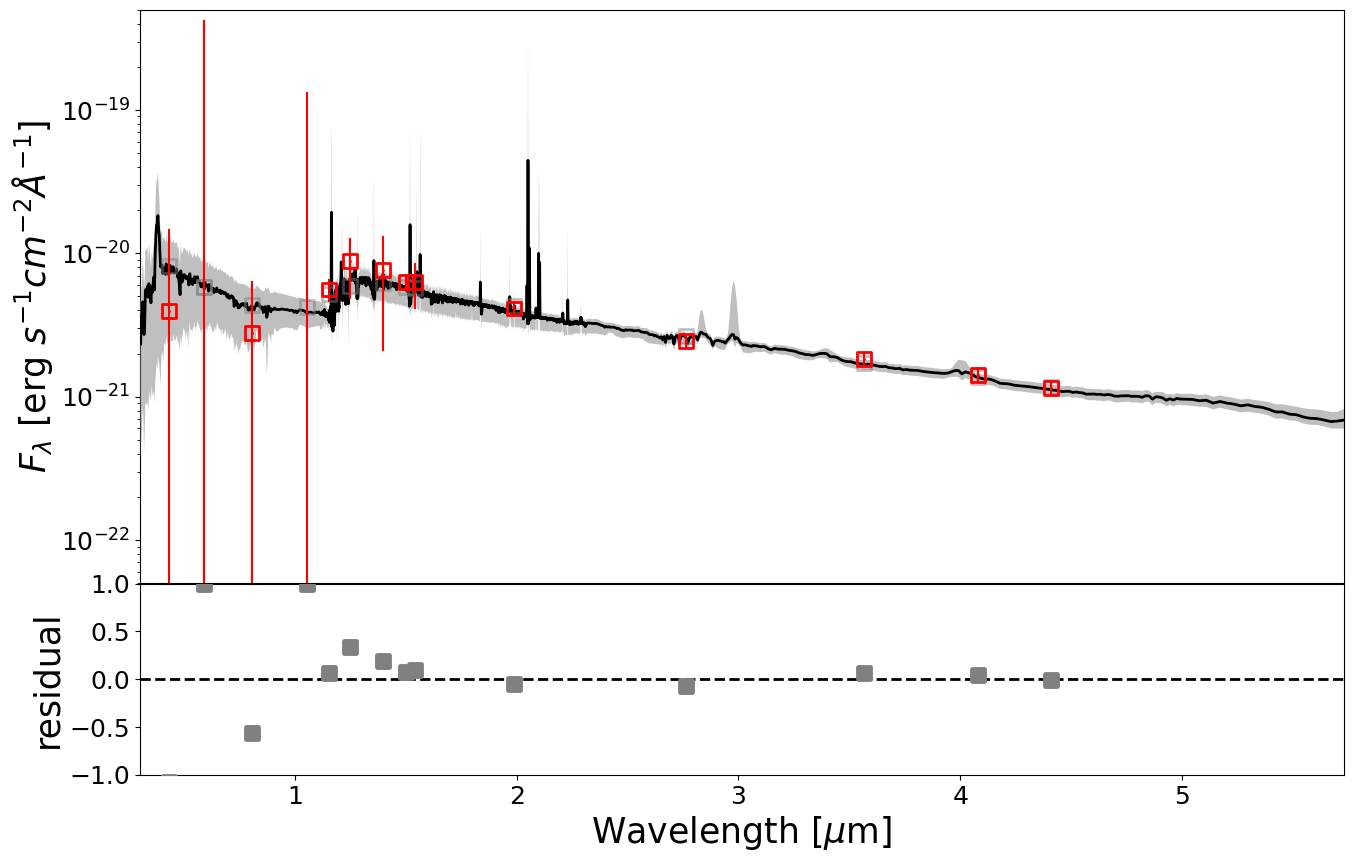

In [39]:
from piXedfit.piXedfit_analysis import plot_SED
from matplotlib.backends.backend_pdf import PdfPages

for i in z225ceers:
    data = '2_ceers_pixedfit_mcmc_{}.fits'.format(i+1)
    plot_SED(data, decompose=0, yrange=[5e-23,5e-19])
    
    
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "SEDs_CEERS.pdf"
save_multi_image(filename)

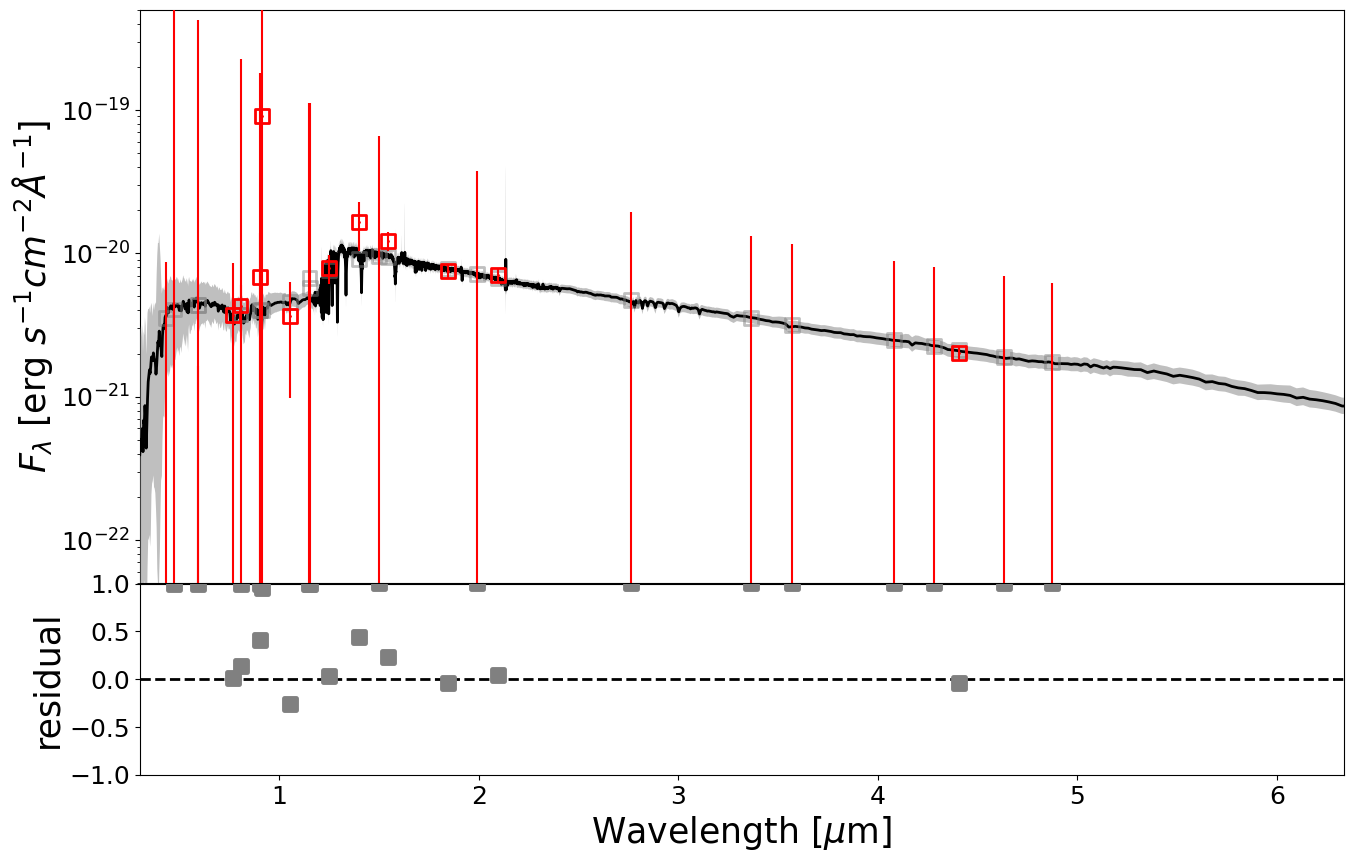

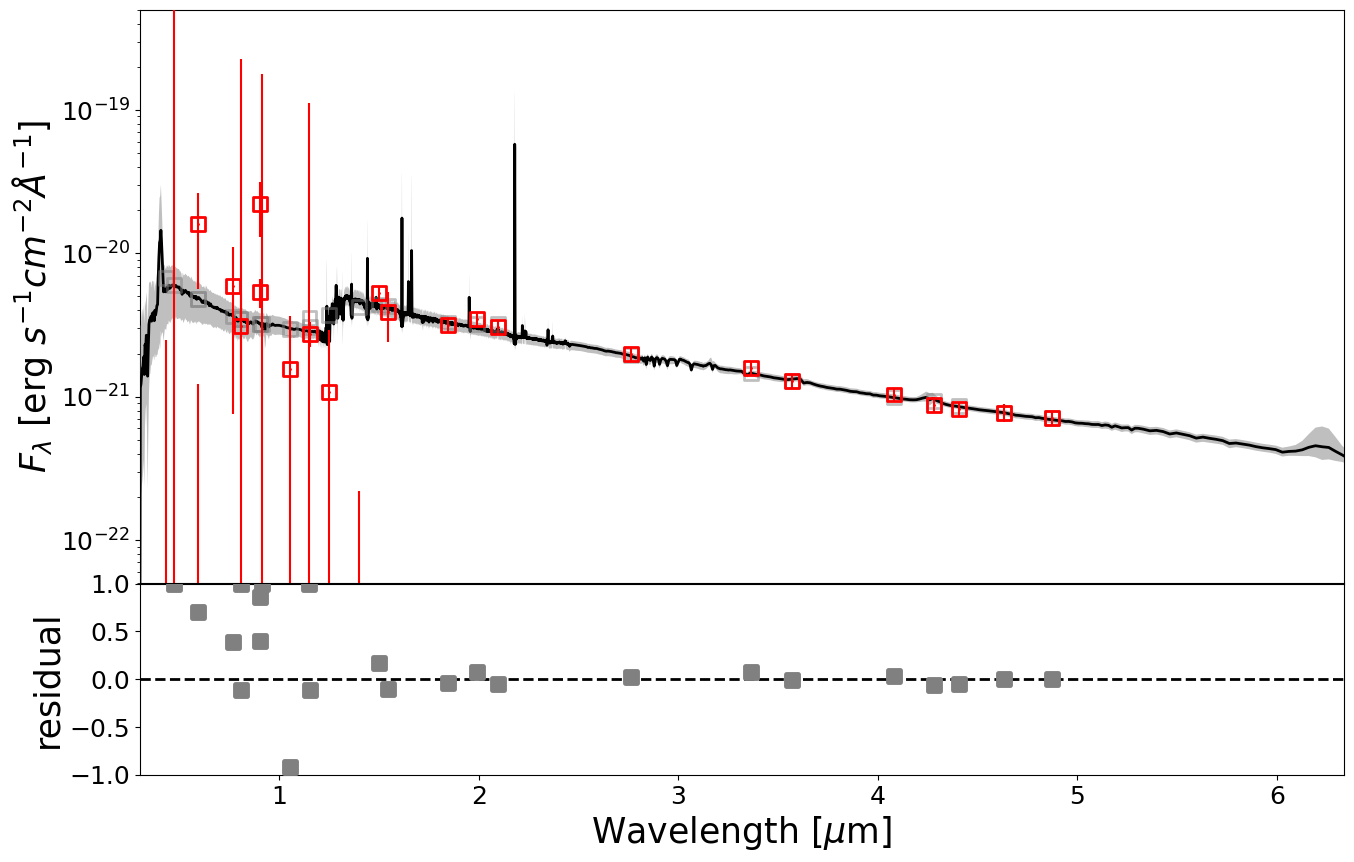

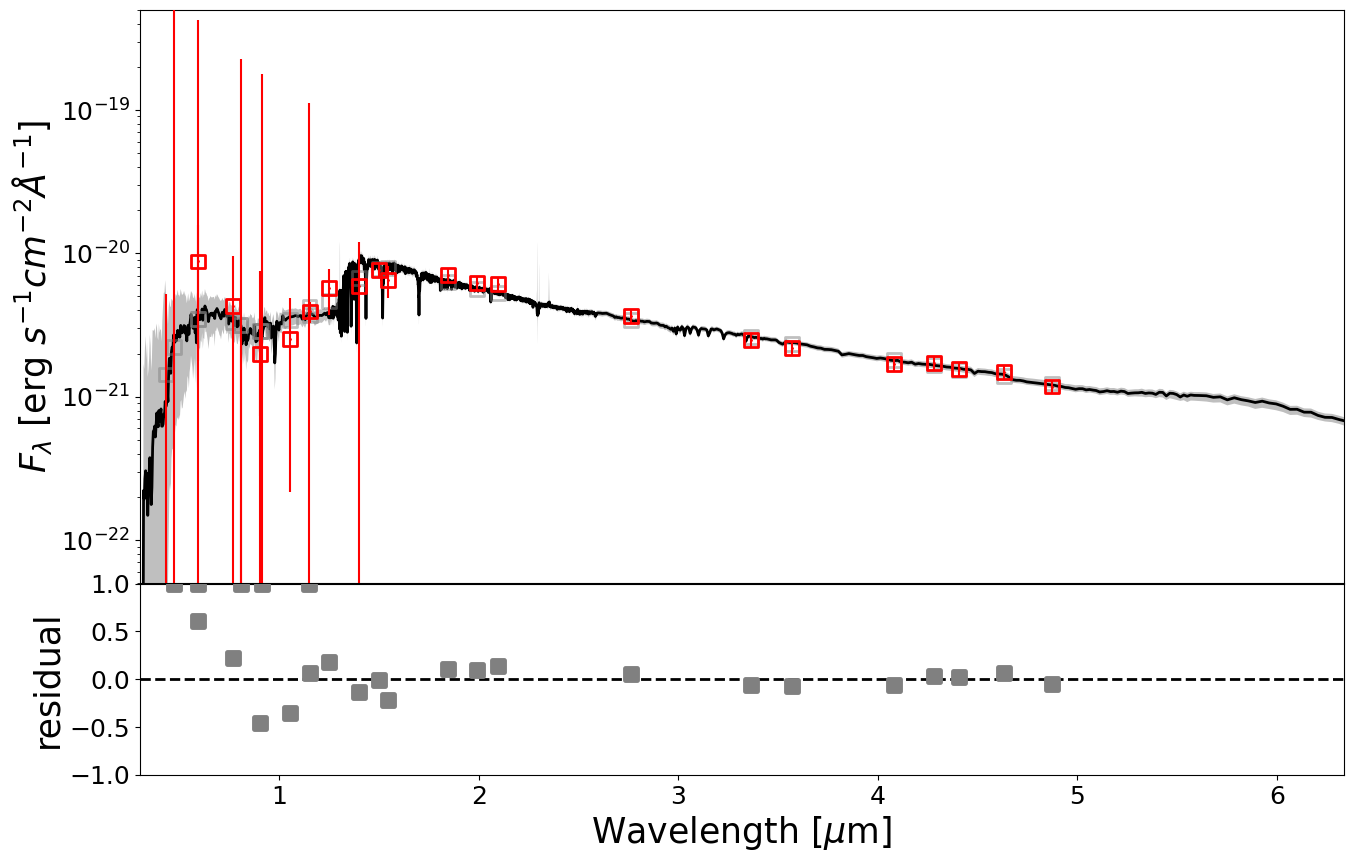

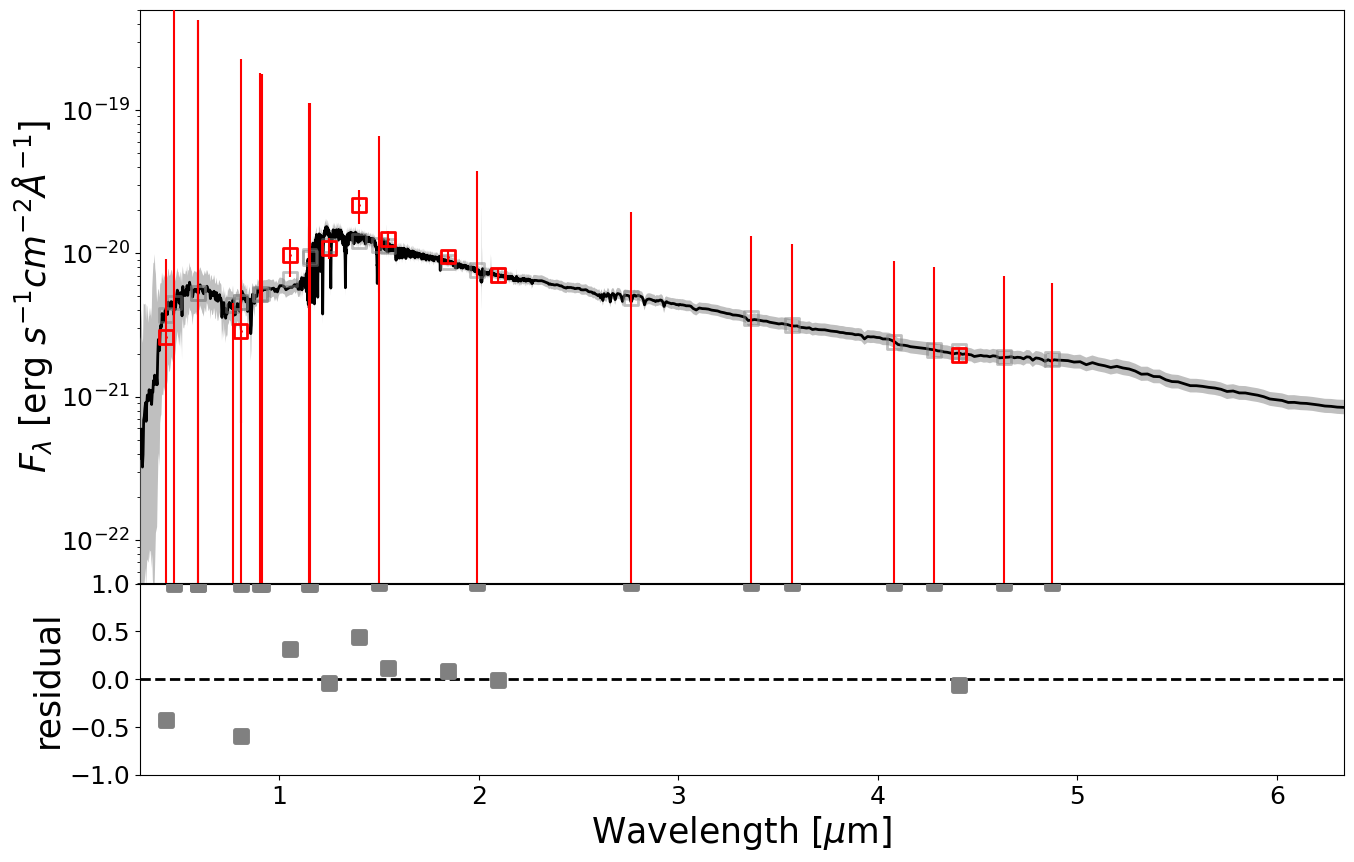

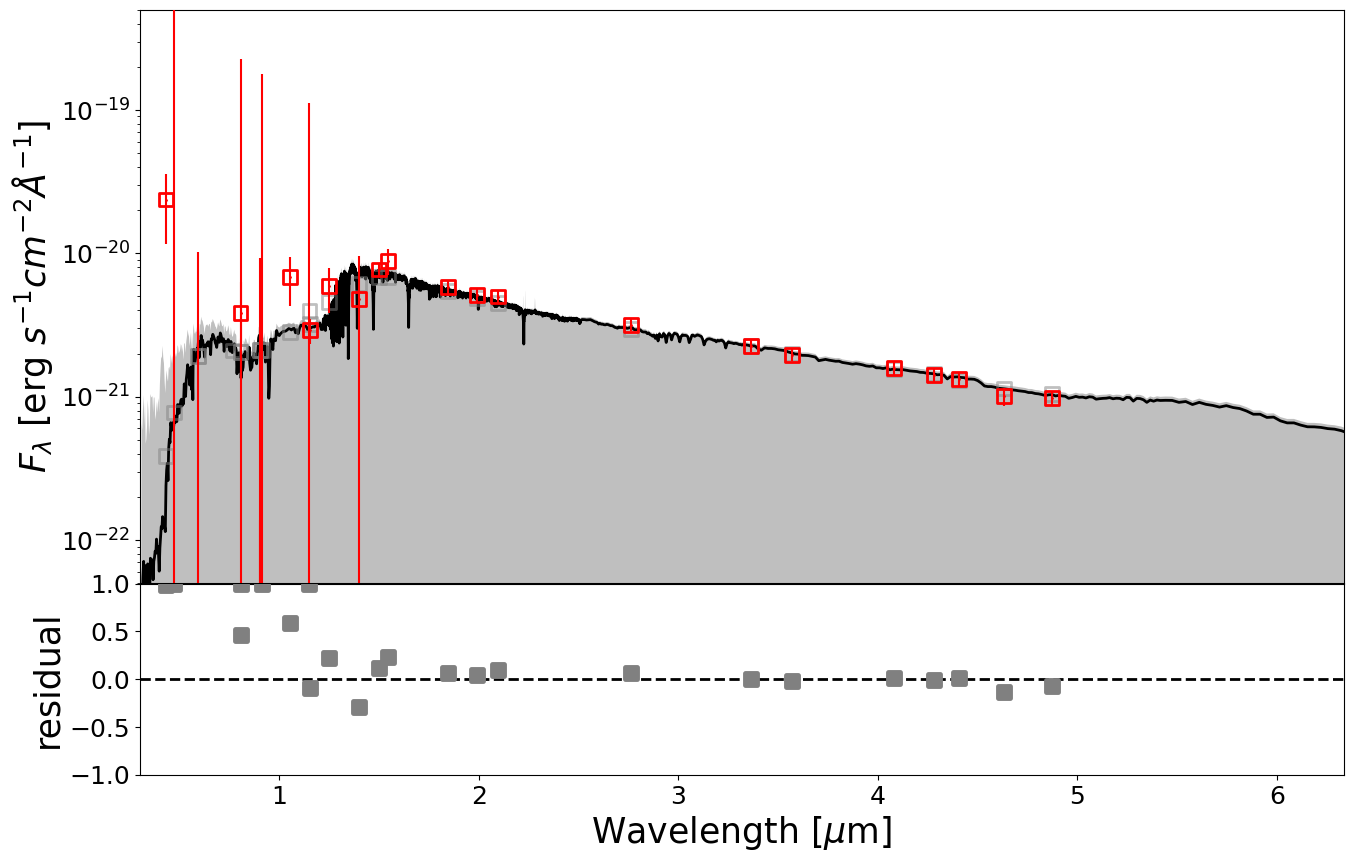

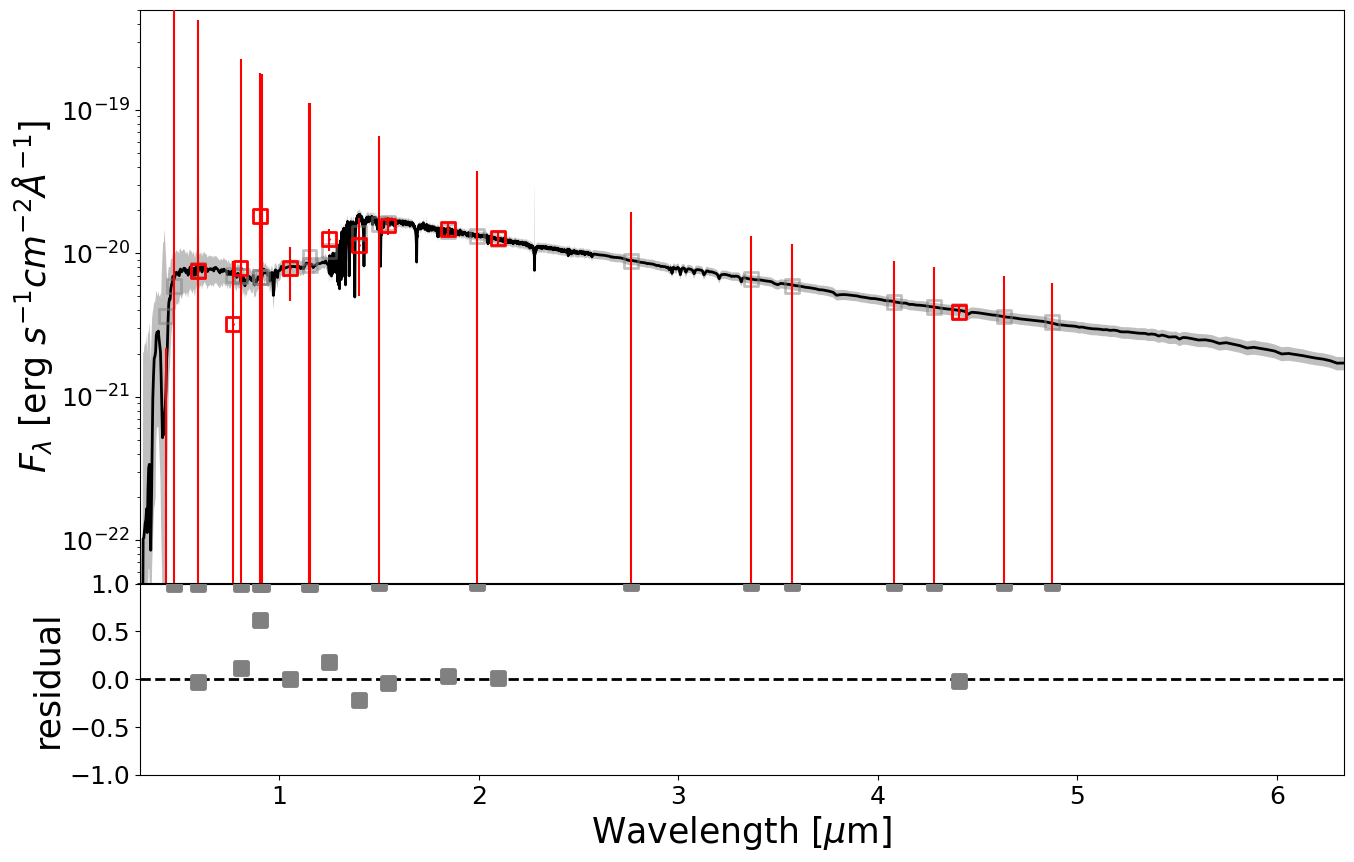

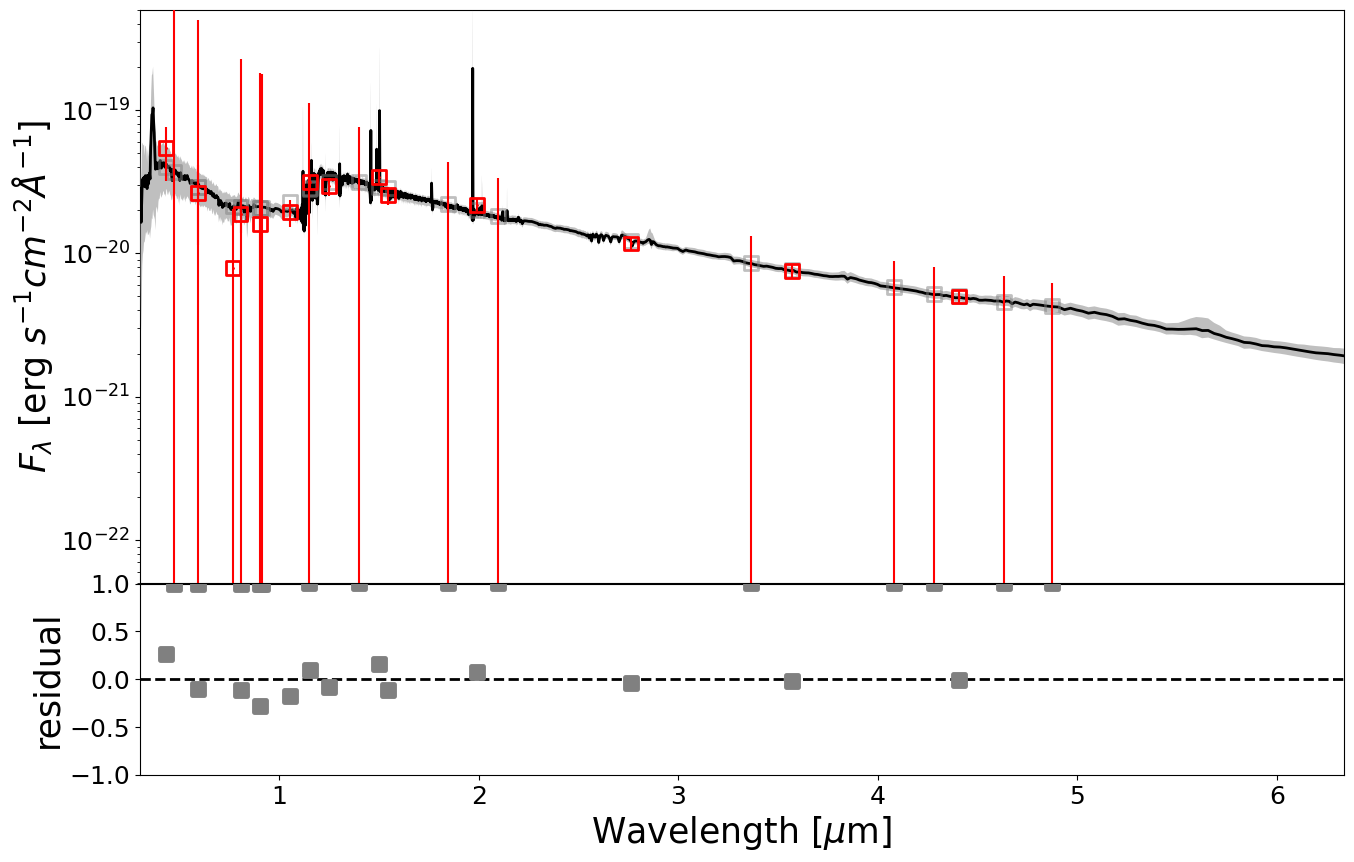

In [158]:
from piXedfit.piXedfit_analysis import plot_SED
from matplotlib.backends.backend_pdf import PdfPages

for i in z225fresco:
    data = '2_fresco_pixedfit_mcmc_{}.fits'.format(i+1)
    plot_SED(data, decompose=0, yrange=[5e-23,5e-19])
    
    
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "SEDs_FRESCO.pdf"
save_multi_image(filename)

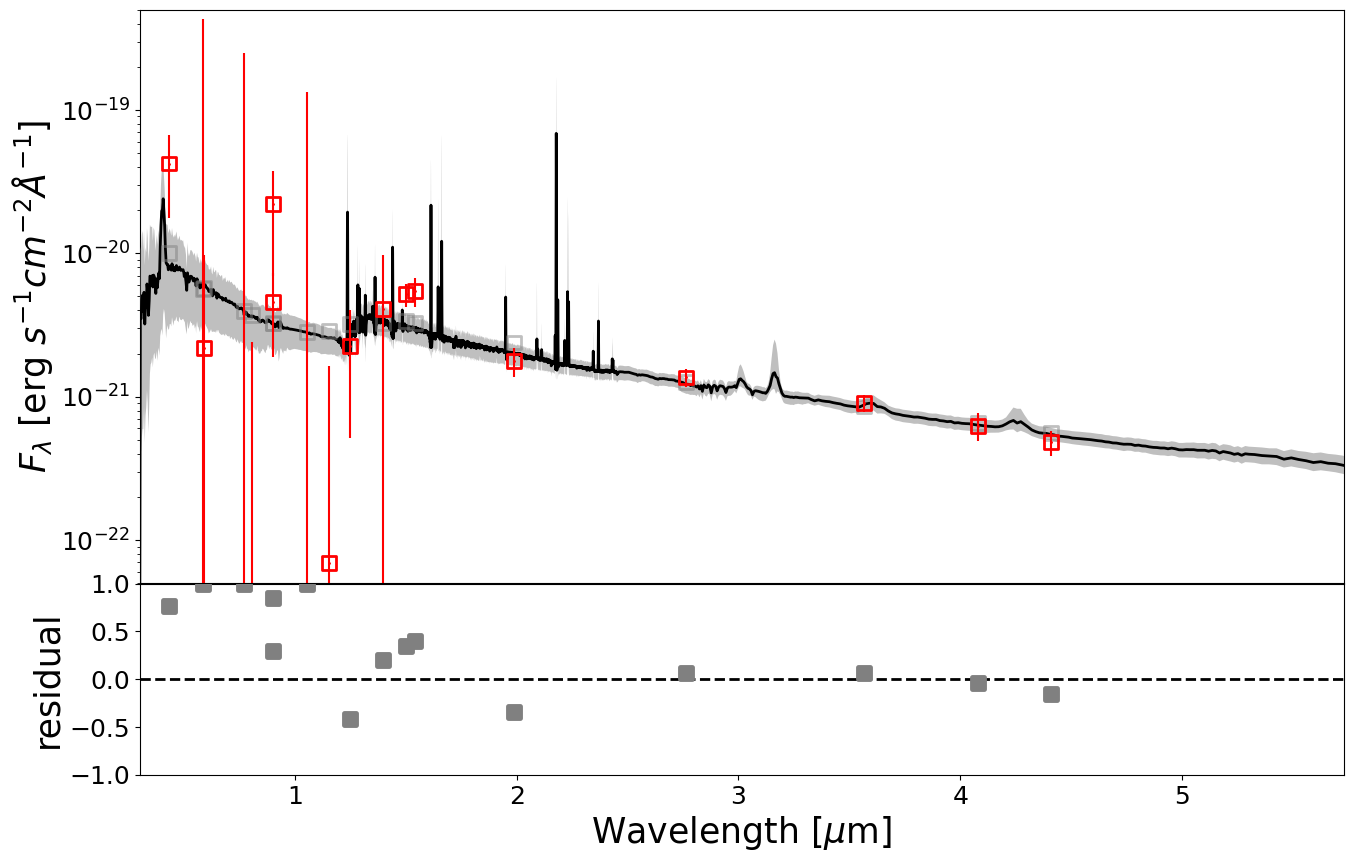

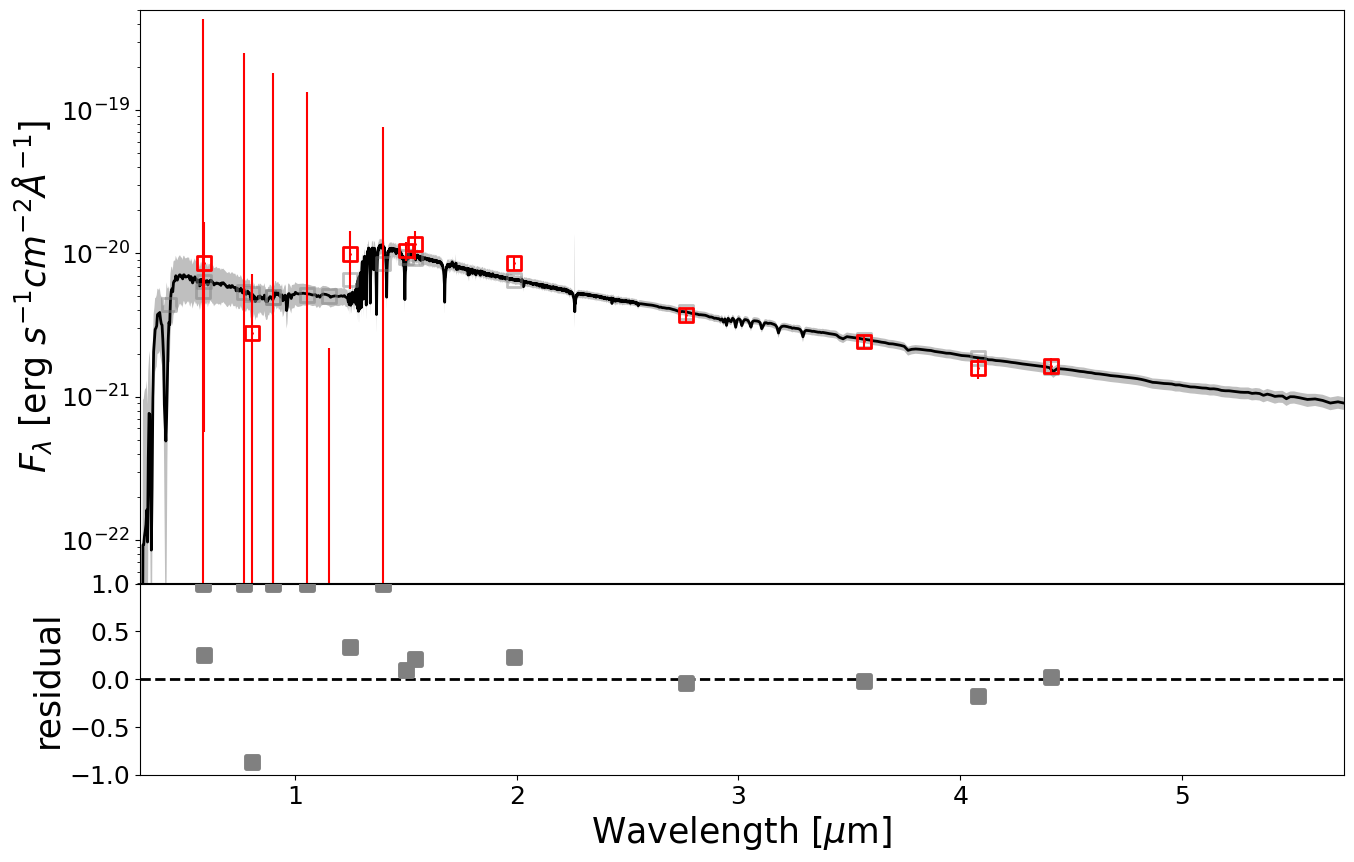

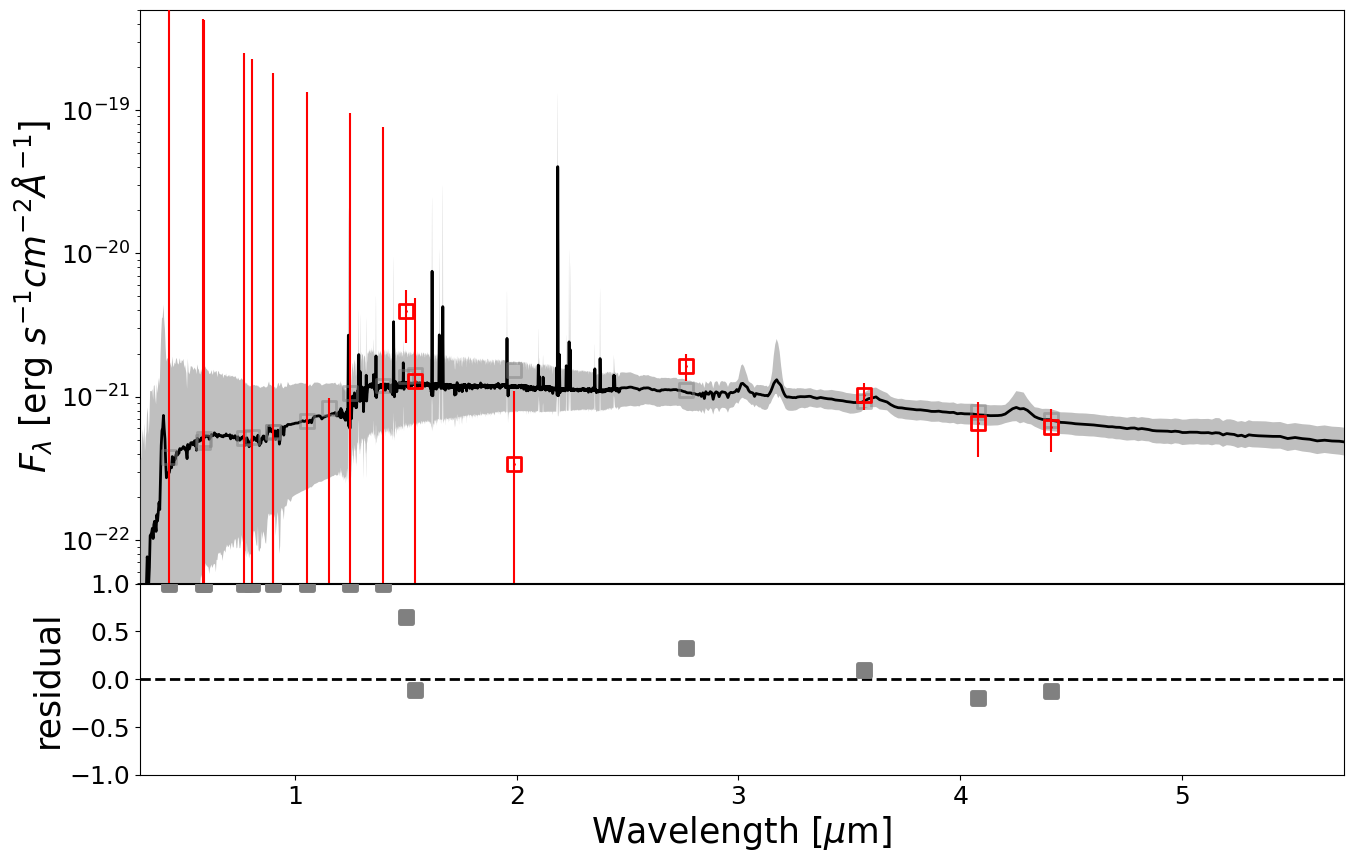

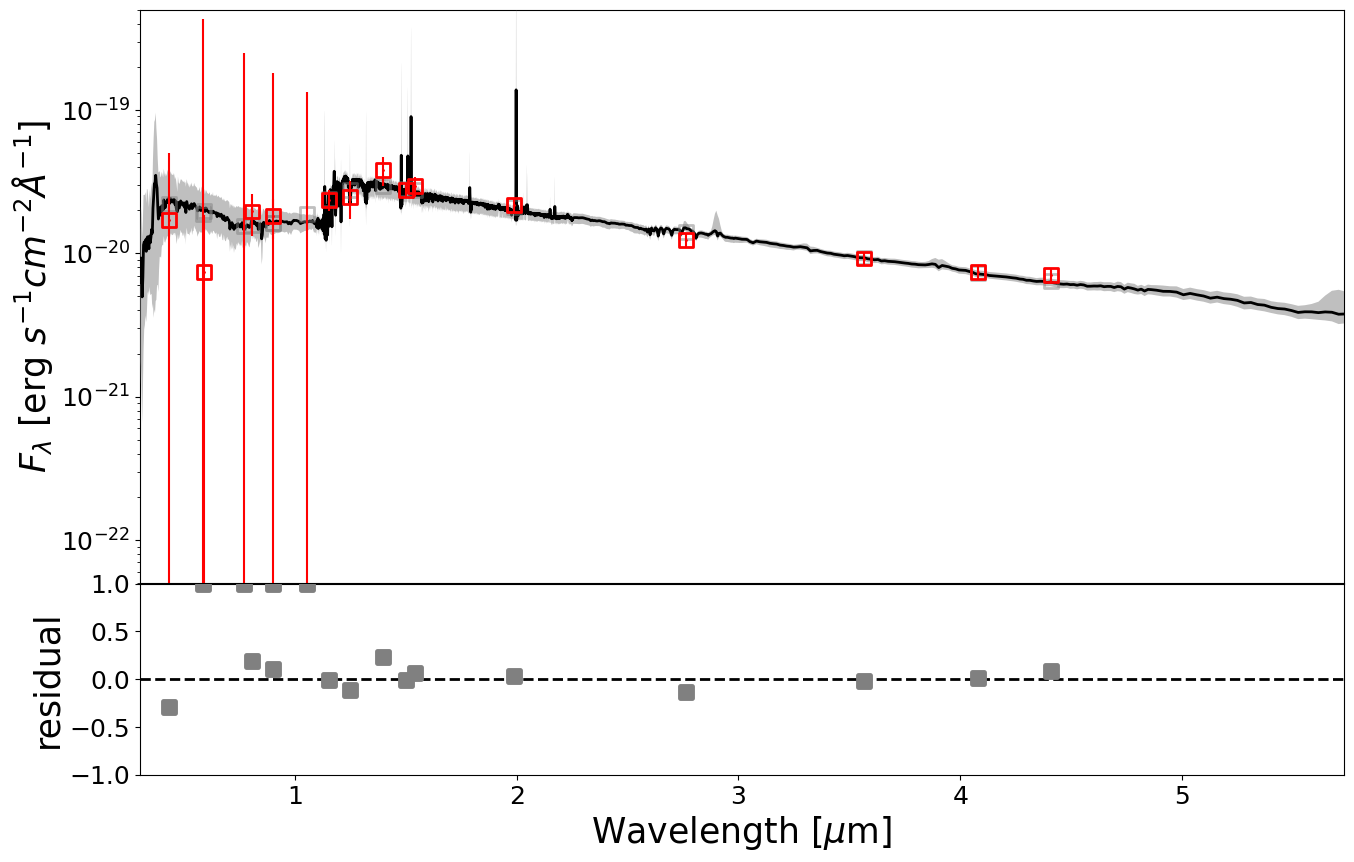

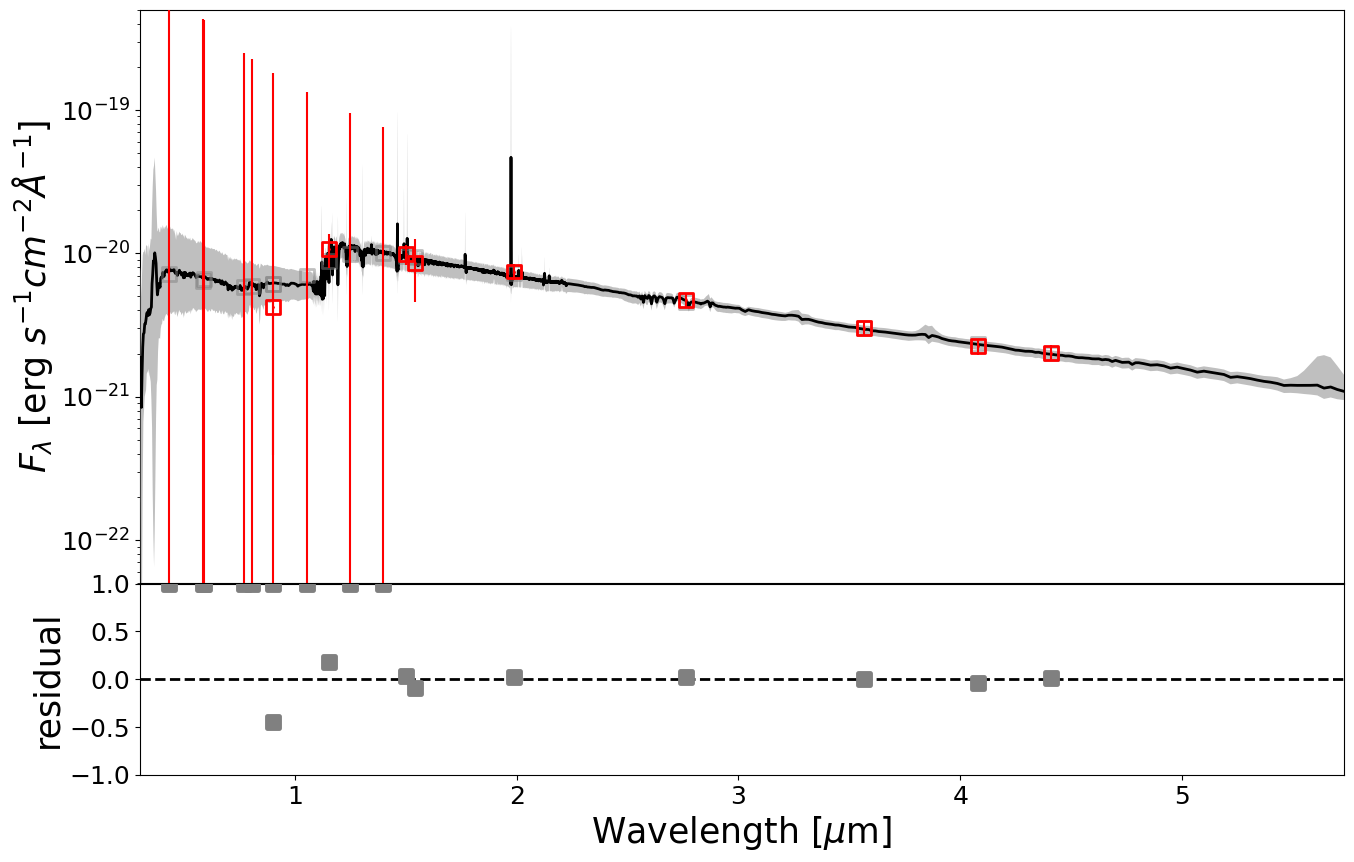

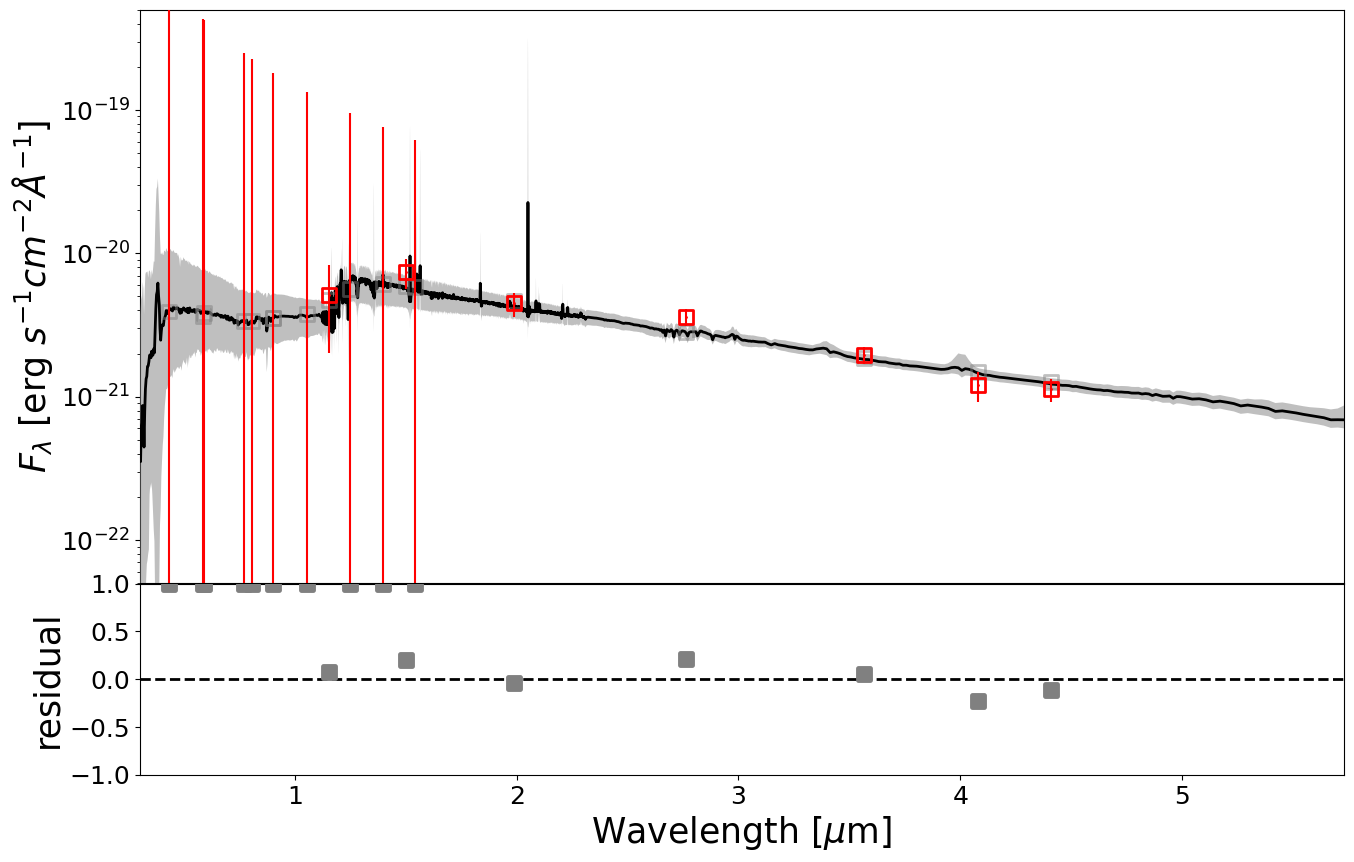

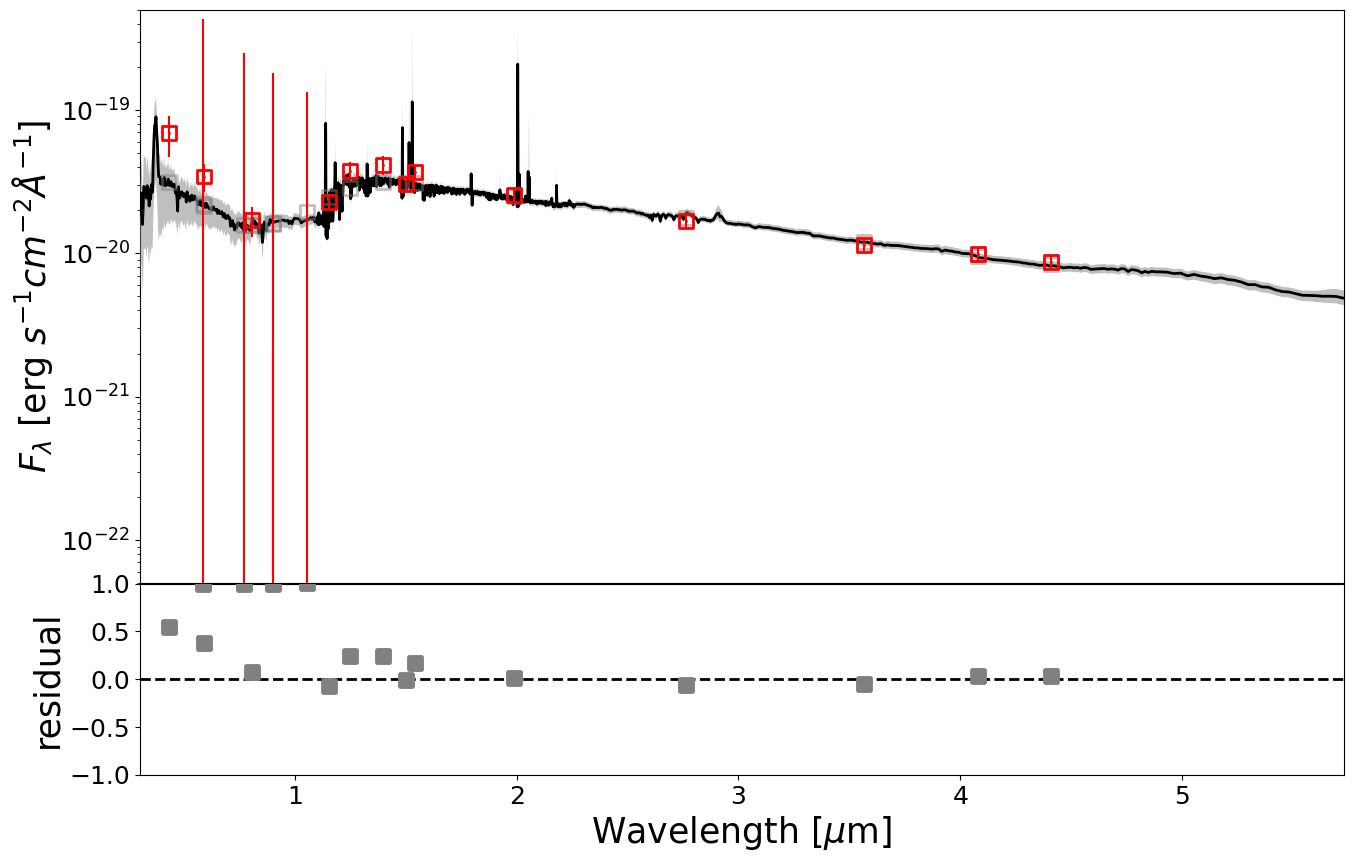

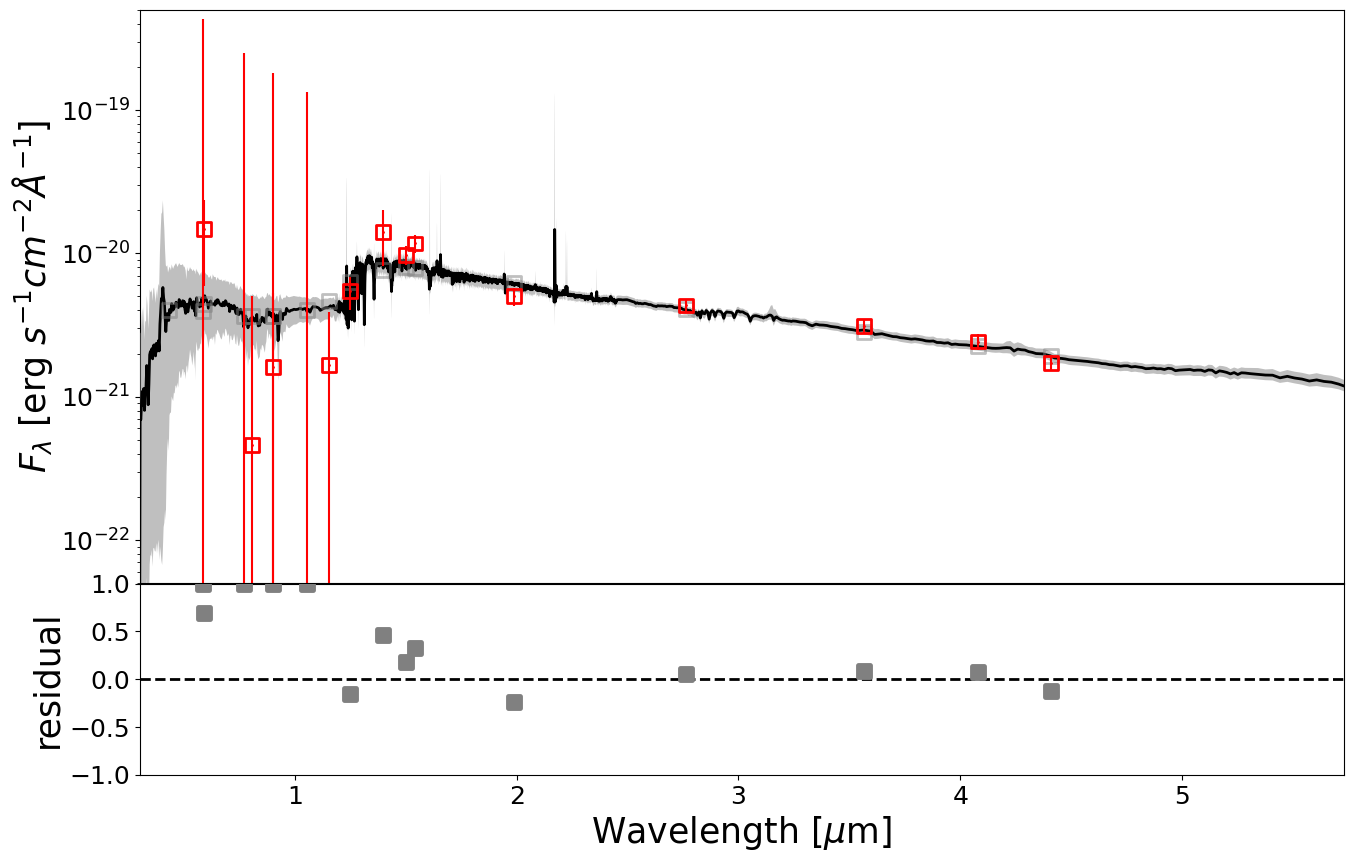

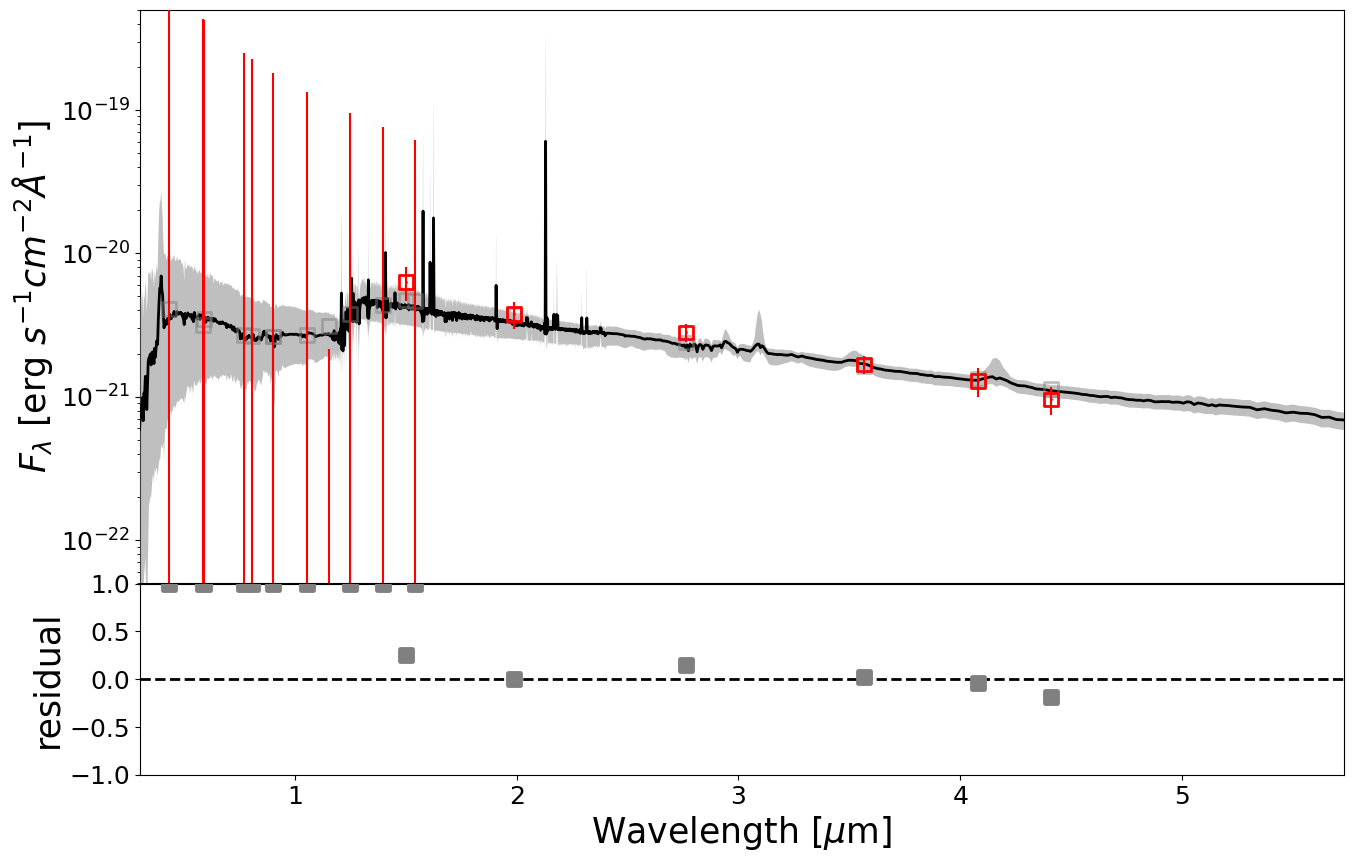

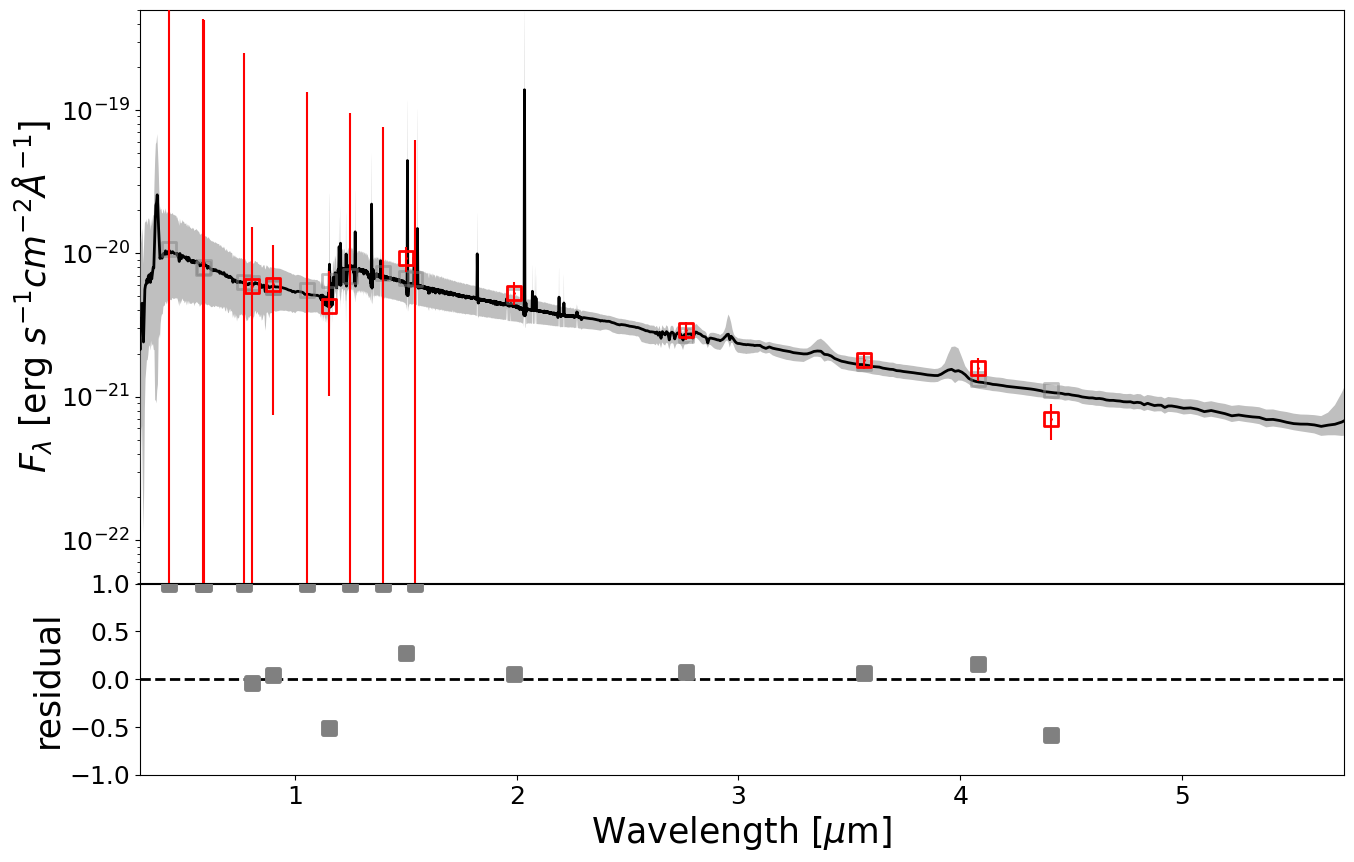

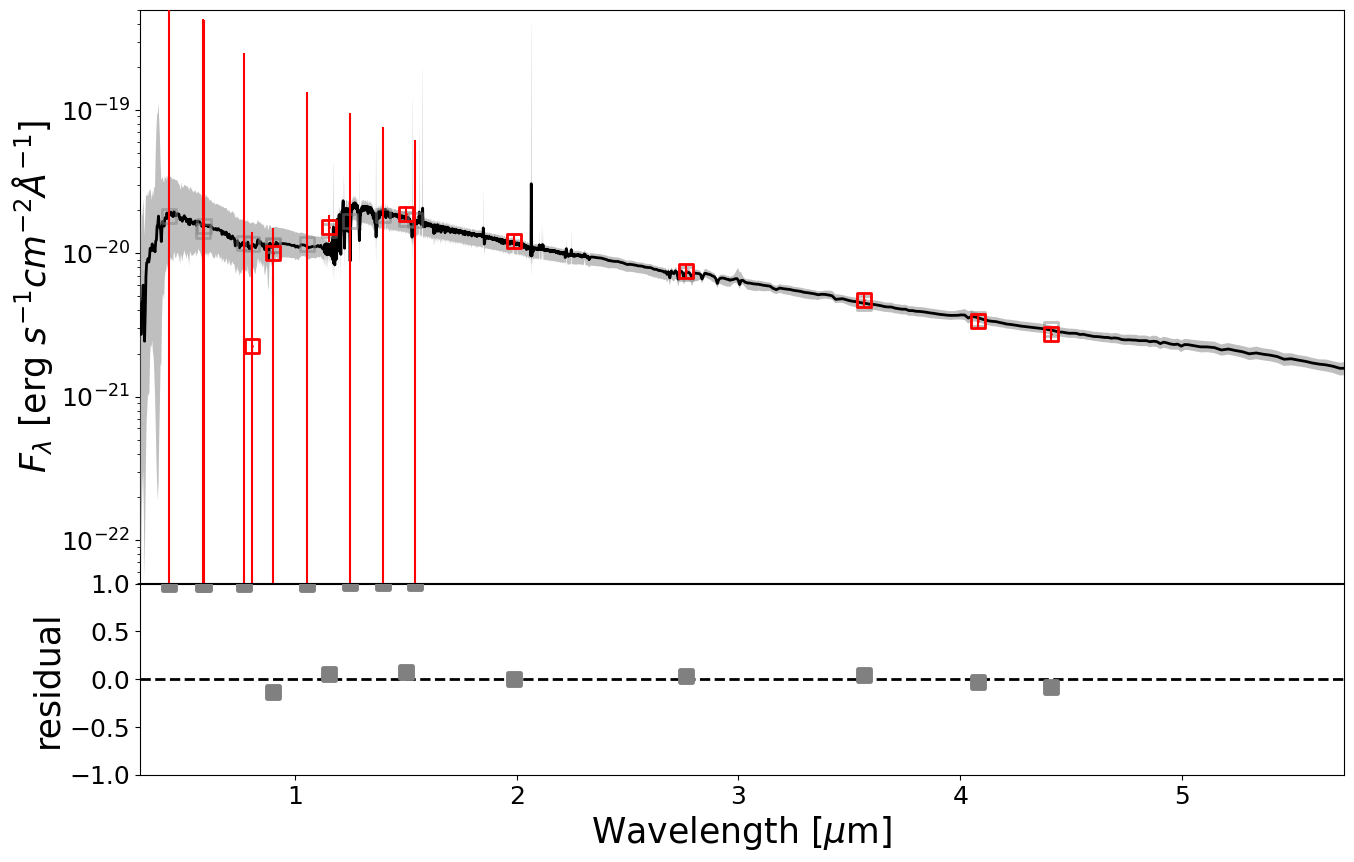

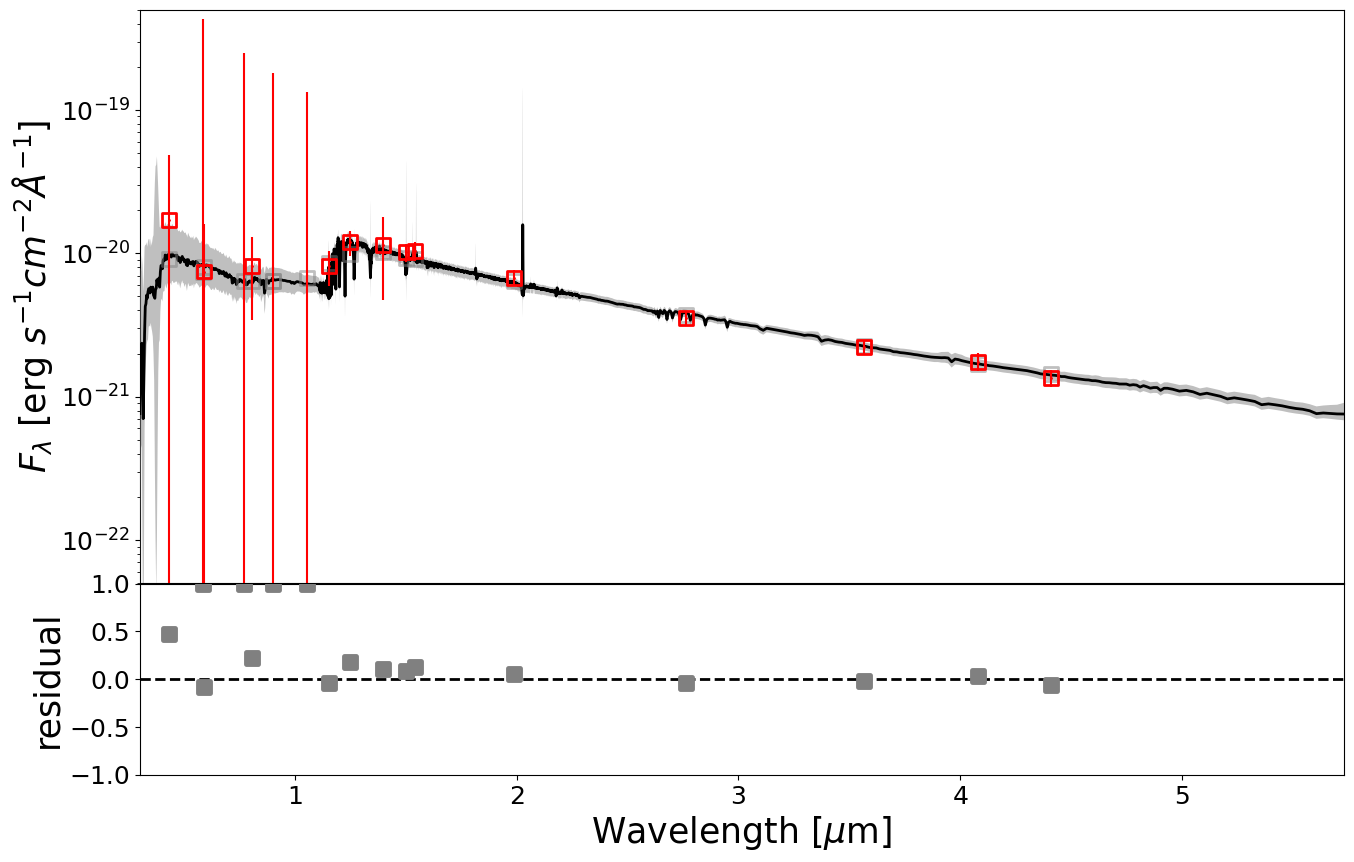

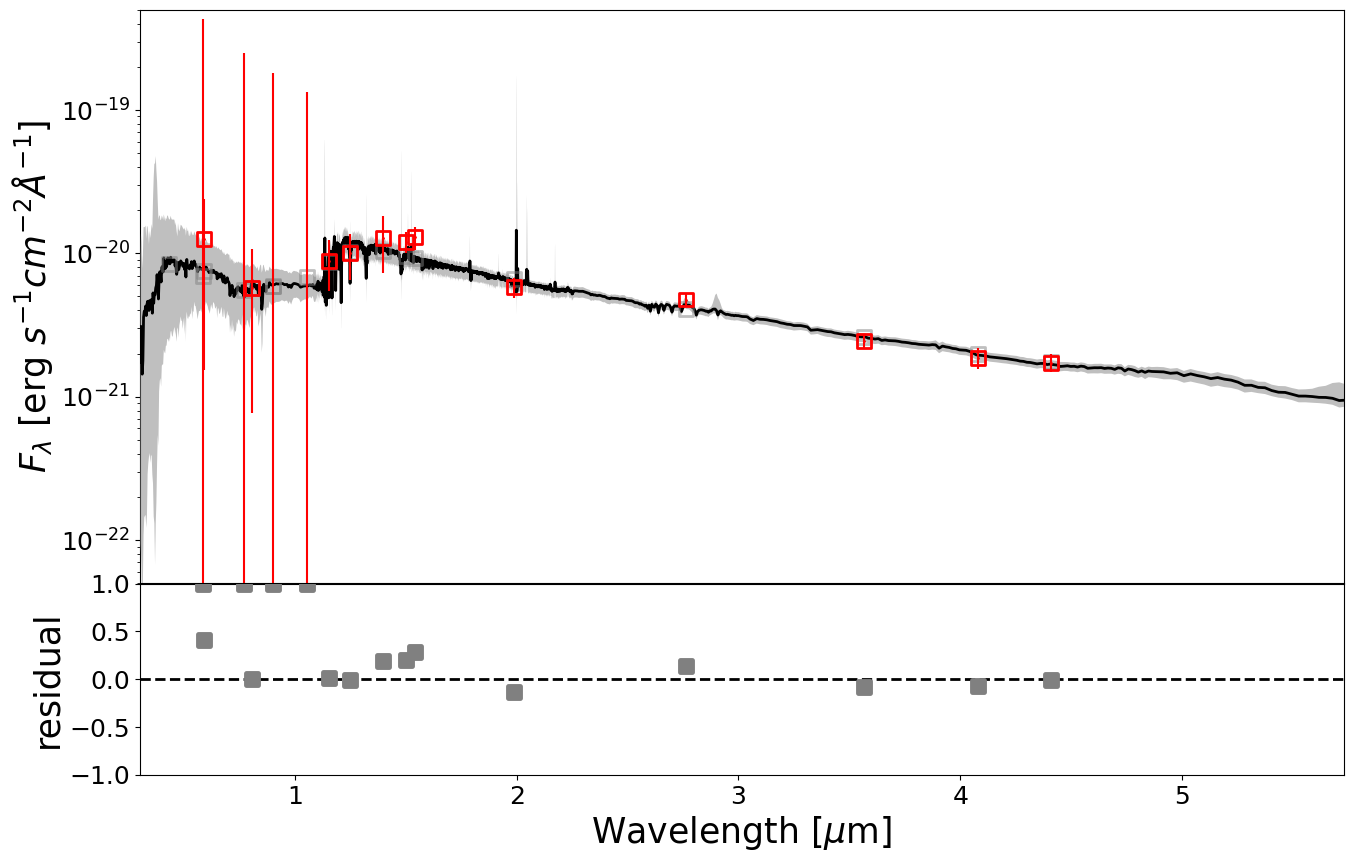

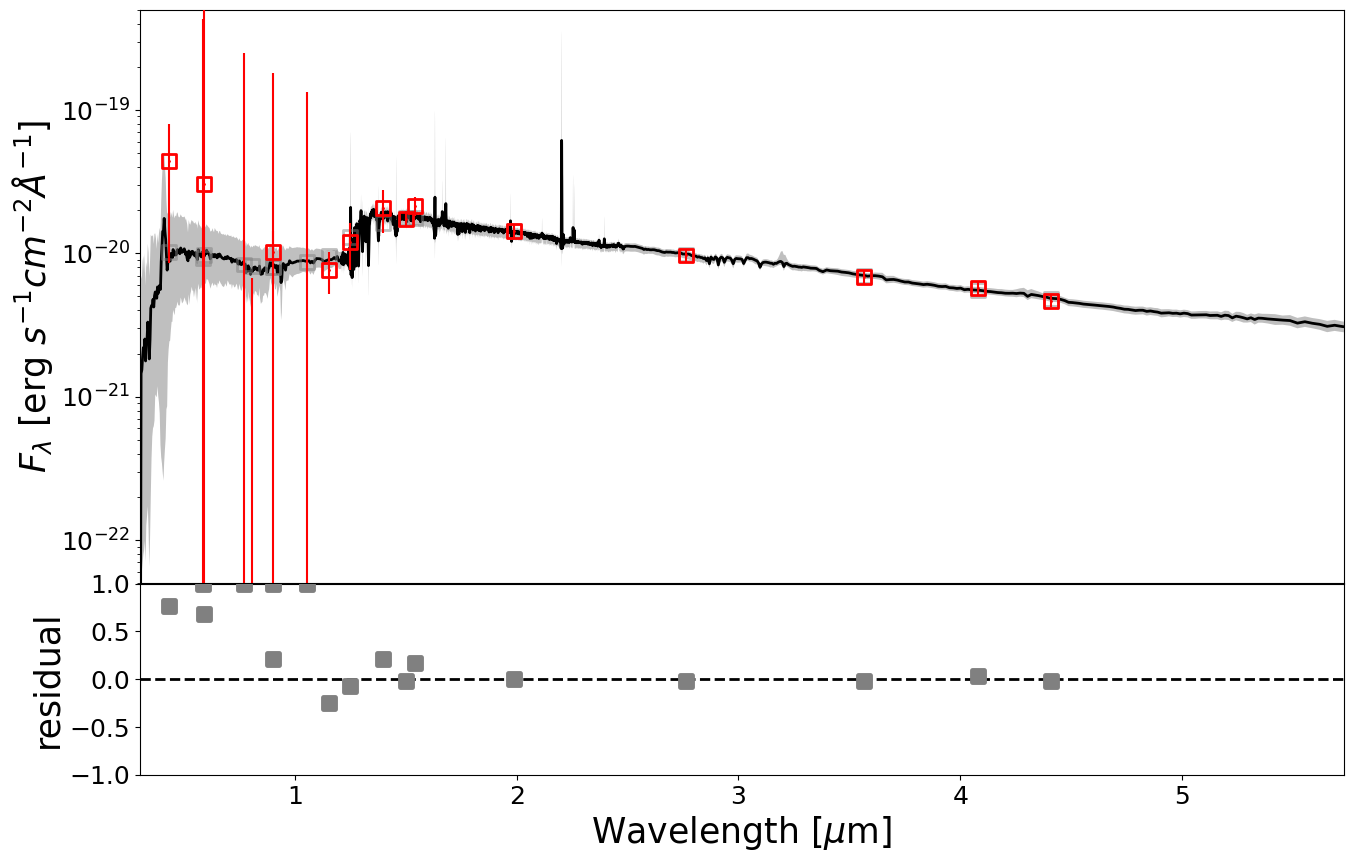

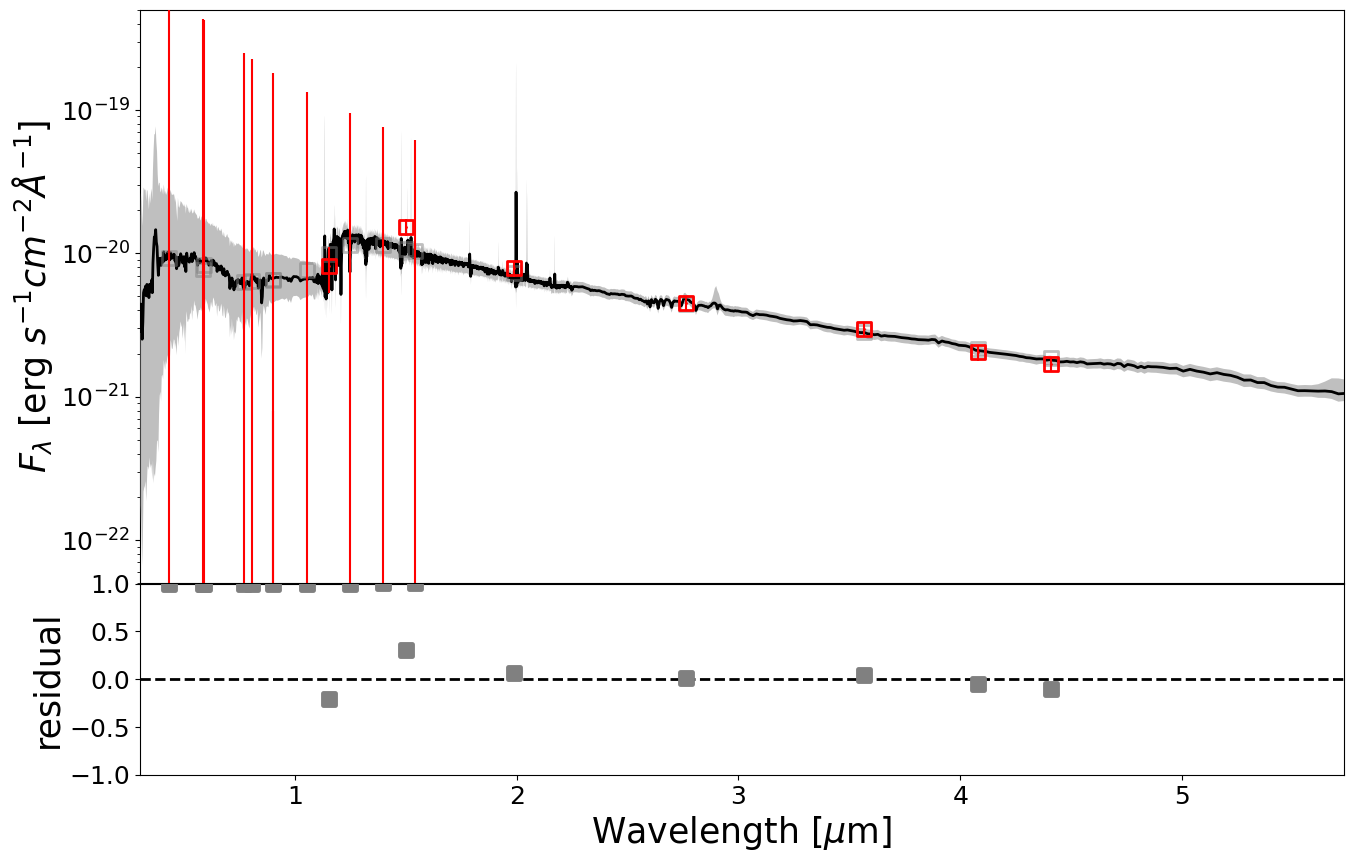

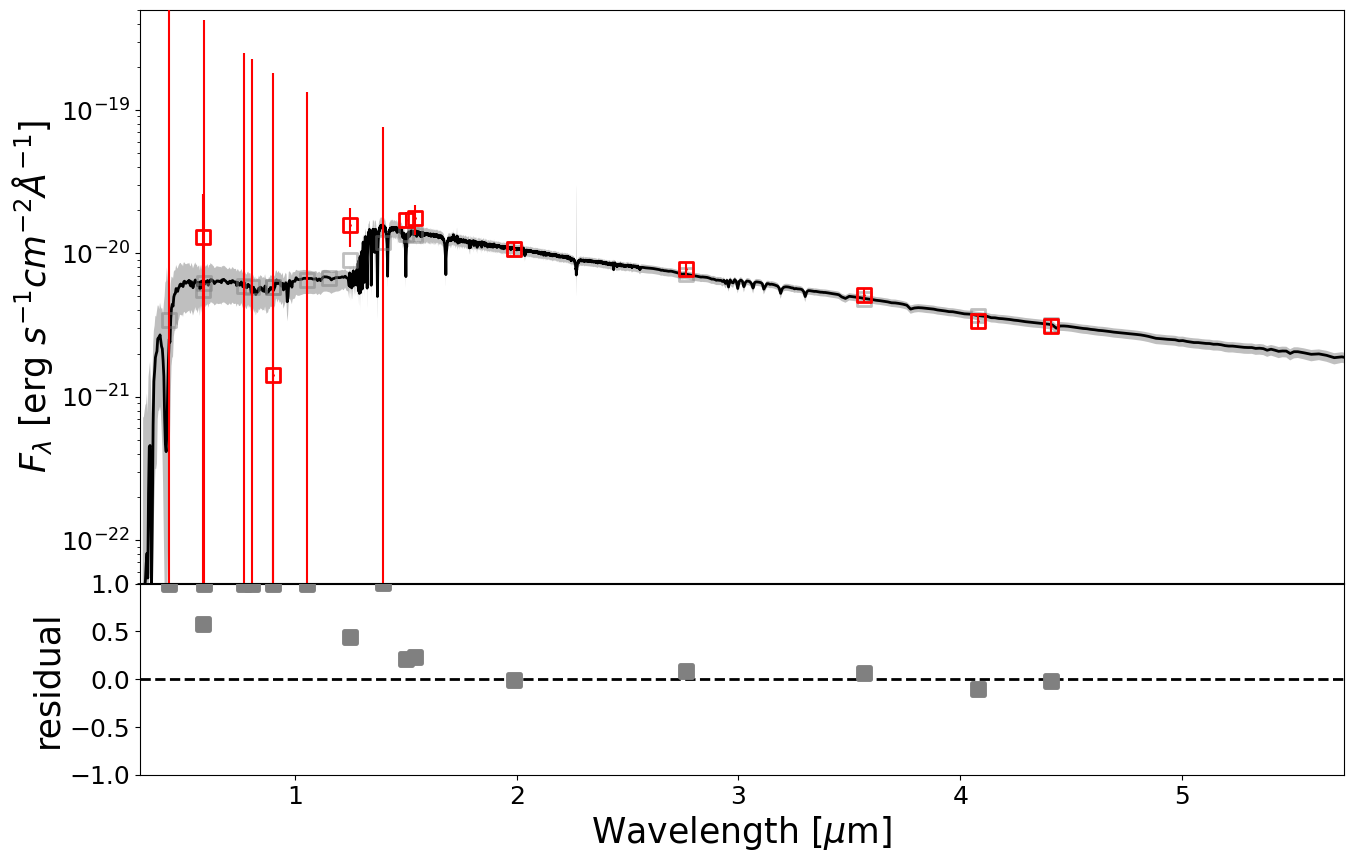

In [159]:
from piXedfit.piXedfit_analysis import plot_SED
from matplotlib.backends.backend_pdf import PdfPages

for i in z225primer:
    data = '2_primer_pixedfit_mcmc_{}.fits'.format(i+1)
    plot_SED(data, decompose=0, yrange=[5e-23,5e-19])
    
    
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = "SEDs_PRIMER.pdf"
save_multi_image(filename)

In [164]:
z225primer

array([41300, 51316,  6997, 45270, 11225,  2374, 36596, 40804,  1056,
        4716, 14913, 48410, 62794, 27729, 12149, 35607])

## PetroFit Fitting Results

In [21]:
import piXedfit

In [22]:
result4_petrofit_200 = np.loadtxt('petrofit_results_primer_f200w.txt')

# f200w
pet4_200 = []

for i in result4_petrofit_200:
    if i[1] in idx_qui_final4:
        pet4_200.append(i)
        
pet4_200 = np.array(pet4_200)

result4_petrofit_444 = np.loadtxt('petrofit_results_primer_f444w.txt')

# f444w
pet4_444 = []

for i in result4_petrofit_444:
    if i[1] in idx_qui_final4:
        pet4_444.append(i)
        
pet4_444 = np.array(pet4_444)

Re4_petrofit_200 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel4[(pet4_200[:, 0]-1).astype(int)], (pet4_200[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)
Re4_petrofit_444 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel4[(pet4_444[:, 0]-1).astype(int)], (pet4_444[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)


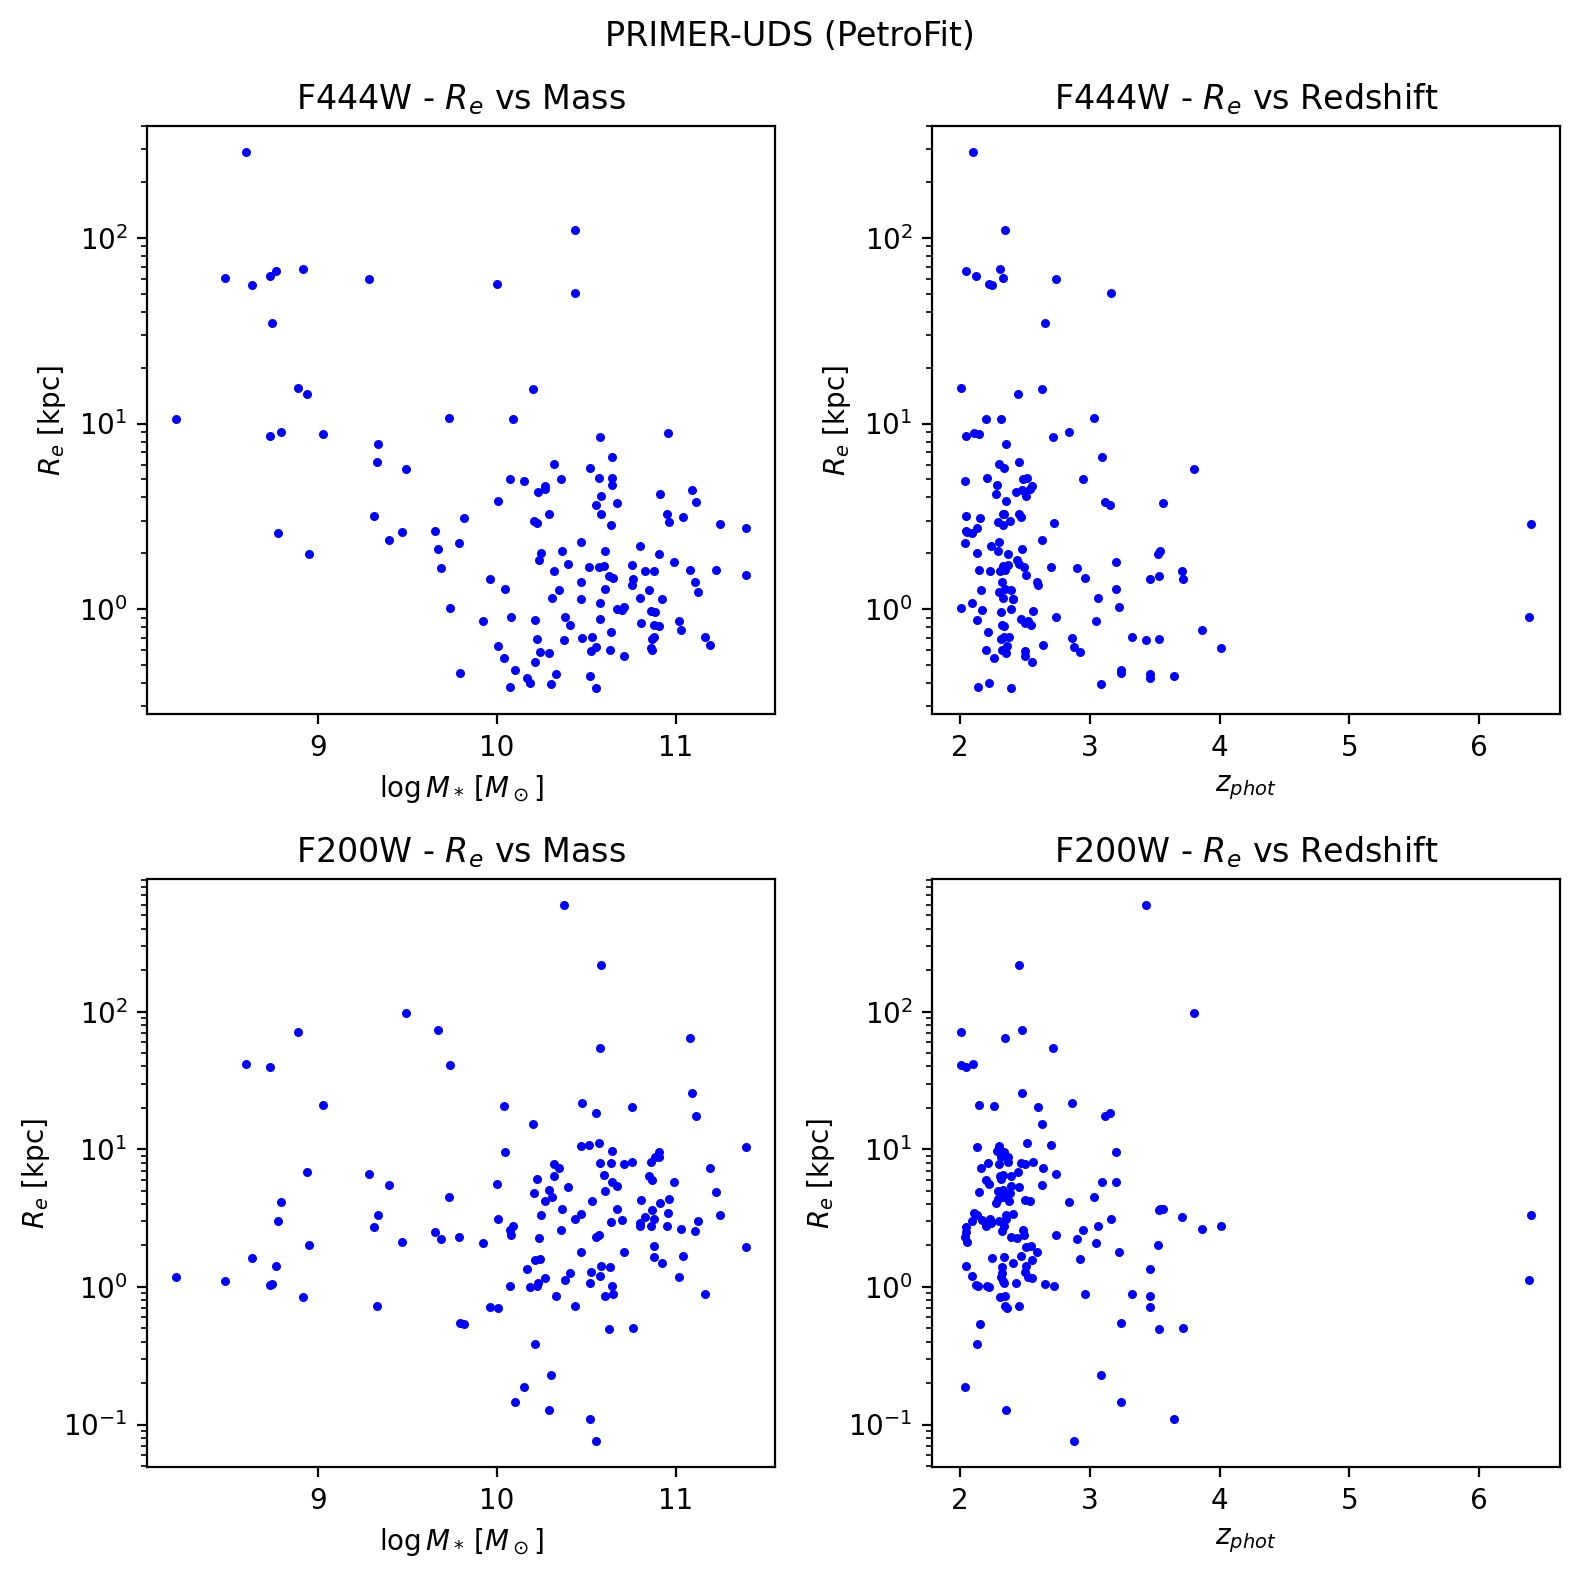

In [23]:
import matplotlib.pyplot as plt

# Assuming you have already loaded data into mass_pixedfit4, Re4_444, z_sel4, Re4_200, gal_result4_200

# Create a single figure for F444W and F200W
plt.figure(figsize=(8, 8), dpi=200)
plt.suptitle('PRIMER-UDS (PetroFit)')

# F444W Subplots

# Subplot 1
plt.subplot(2, 2, 1)
plt.scatter(mass_pixedfit4[:, 1][(pet4_444[:, 0]-1).astype(int)], Re4_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Mass')

# Subplot 2
plt.subplot(2, 2, 2)
plt.scatter(z_sel4[(pet4_444[:, 0]-1).astype(int)], Re4_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Redshift')

# F200W Subplots

# Subplot 3
plt.subplot(2, 2, 3)
plt.scatter(mass_pixedfit4[:, 1][(pet4_200[:, 0]-1).astype(int)], Re4_petrofit_200, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F200W - $R_e$ vs Mass')

# Subplot 4
plt.subplot(2, 2, 4)
plt.scatter(z_sel4[(pet4_200[:, 0]-1).astype(int)], Re4_petrofit_200, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F200W - $R_e$ vs Redshift')

plt.tight_layout()  # Adjust layout to prevent overlapping

# Save the combined plot as a PNG file
plt.savefig('PRIMER_PetroFit.png')

plt.show()


In [24]:
result3_petrofit_200 = np.loadtxt('petrofit_results_fresco_f200w.txt')

exclude = [21414, 21679, 21712, 15441, 34132]

# f200w
pet3_200 = []

for i in result3_petrofit_200:
    if (i[1] in idx_qui_final3) and (i[1] not in exclude):
        pet3_200.append(i)
        
pet3_200 = np.array(pet3_200)

result3_petrofit_444 = np.loadtxt('petrofit_results_fresco_f444w.txt')

# f444w
pet3_444 = []

for i in result3_petrofit_444:
    if (i[1] in idx_qui_final3) and (i[1] not in exclude):
        pet3_444.append(i)
        
pet3_444 = np.array(pet3_444)

Re3_petrofit_200 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel3[(pet3_200[:, 0]-1).astype(int)], (pet3_200[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)
Re3_petrofit_444 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel3[(pet3_444[:, 0]-1).astype(int)], (pet3_444[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)

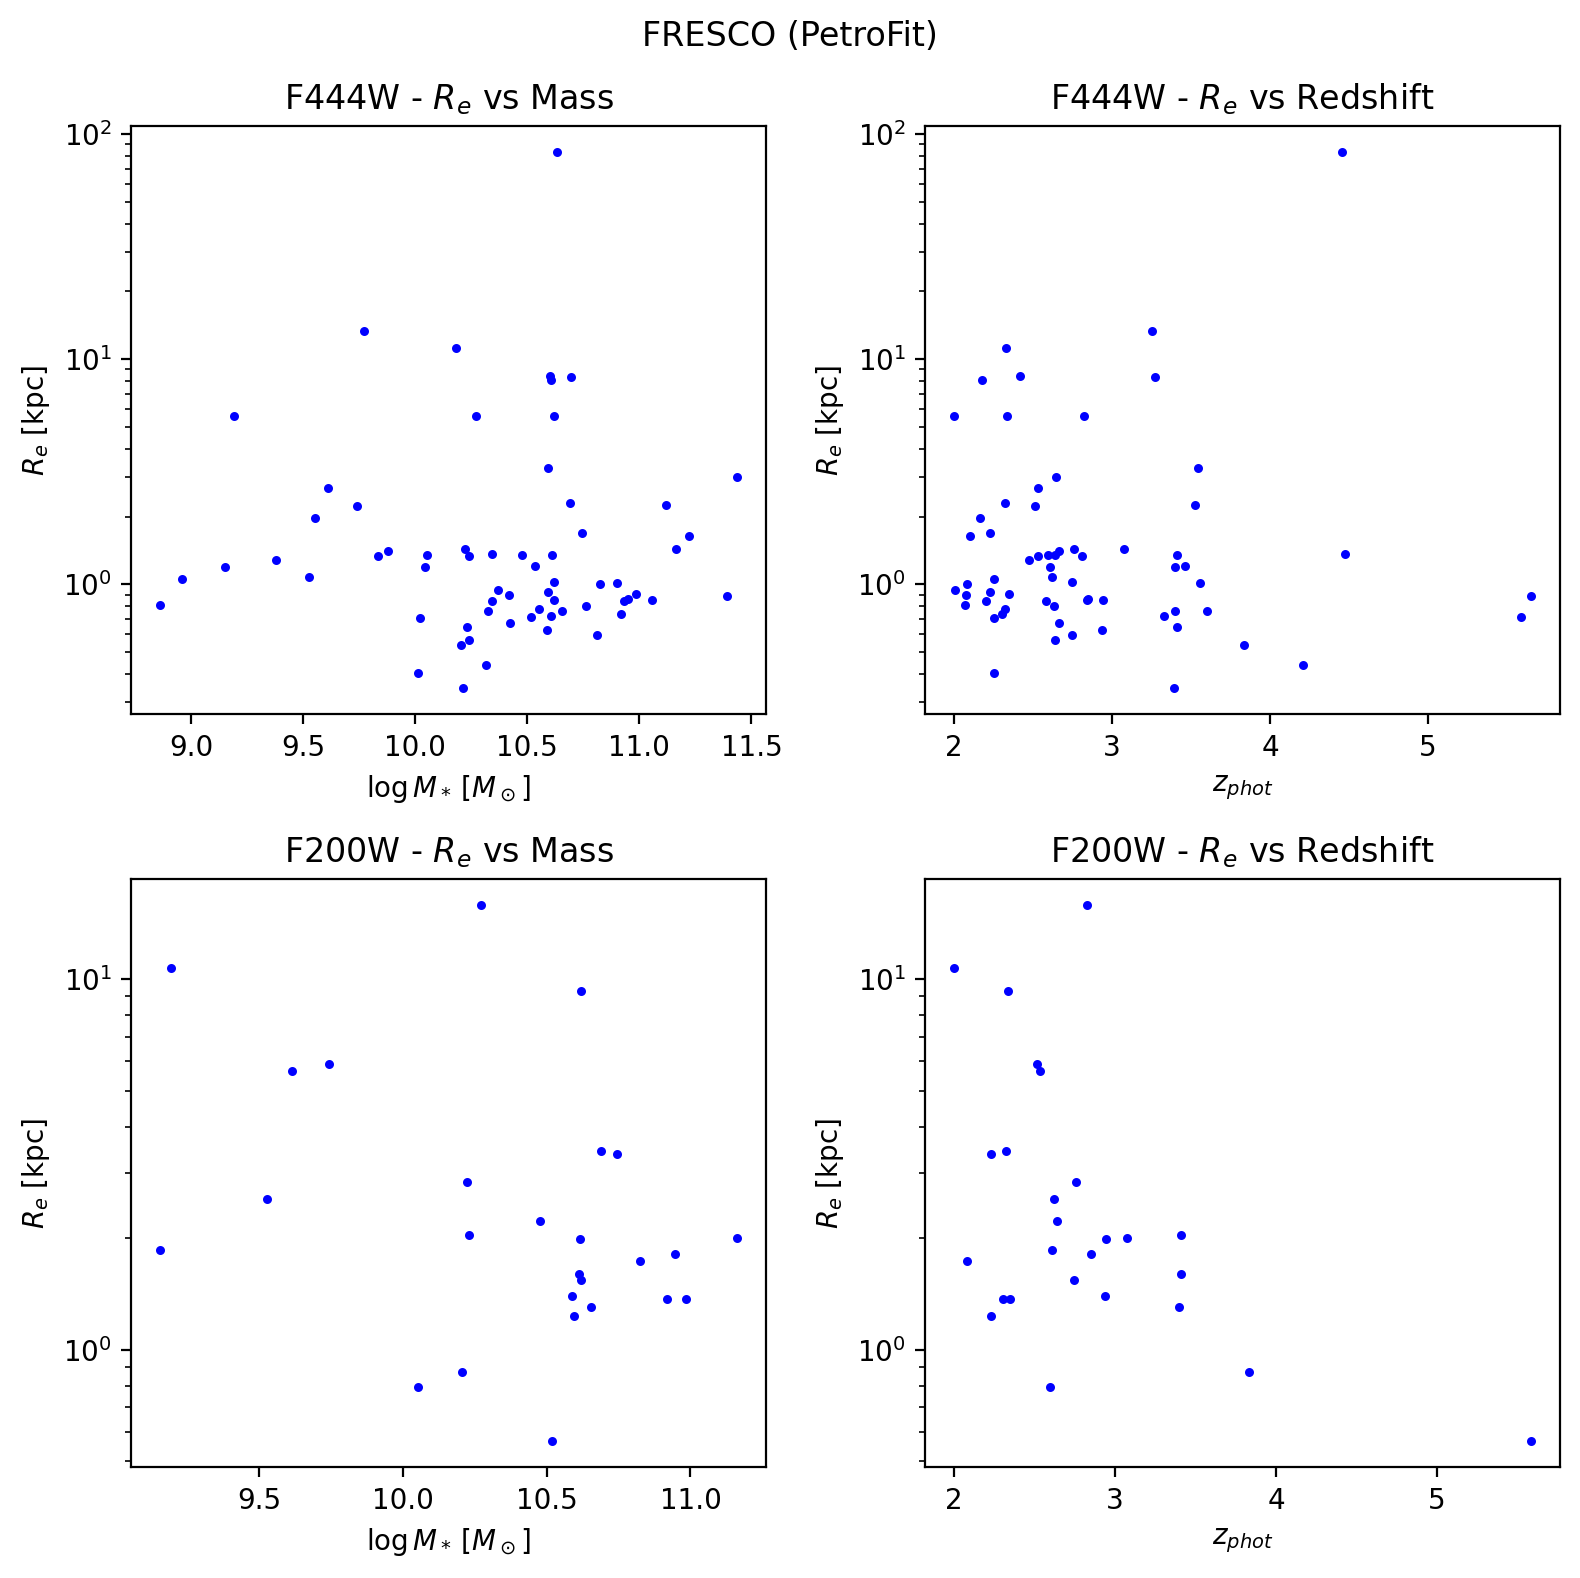

In [25]:
import matplotlib.pyplot as plt

# Assuming you have already loaded data into mass_pixedfit4, Re4_444, z_sel4, Re4_200, gal_result4_200

# Create a single figure for F444W and F200W
plt.figure(figsize=(8, 8), dpi=200)
plt.suptitle('FRESCO (PetroFit)')

# F444W Subplots

# Subplot 1
plt.subplot(2, 2, 1)
plt.scatter(mass_pixedfit3[:, 1][(pet3_444[:, 0]-1).astype(int)], Re3_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Mass')

# Subplot 2
plt.subplot(2, 2, 2)
plt.scatter(z_sel3[(pet3_444[:, 0]-1).astype(int)], Re3_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Redshift')

# F200W Subplots

# Subplot 3
plt.subplot(2, 2, 3)
plt.scatter(mass_pixedfit3[:, 1][(pet3_200[:, 0]-1).astype(int)], Re3_petrofit_200, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F200W - $R_e$ vs Mass')

# Subplot 4
plt.subplot(2, 2, 4)
plt.scatter(z_sel3[(pet3_200[:, 0]-1).astype(int)], Re3_petrofit_200, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F200W - $R_e$ vs Redshift')

plt.tight_layout()  # Adjust layout to prevent overlapping

# Save the combined plot as a PNG file
plt.savefig('FRESCO_PetroFit.png')

plt.show()


Text(0.5, 1.0, 'F444W - $R_e$ vs Redshift')

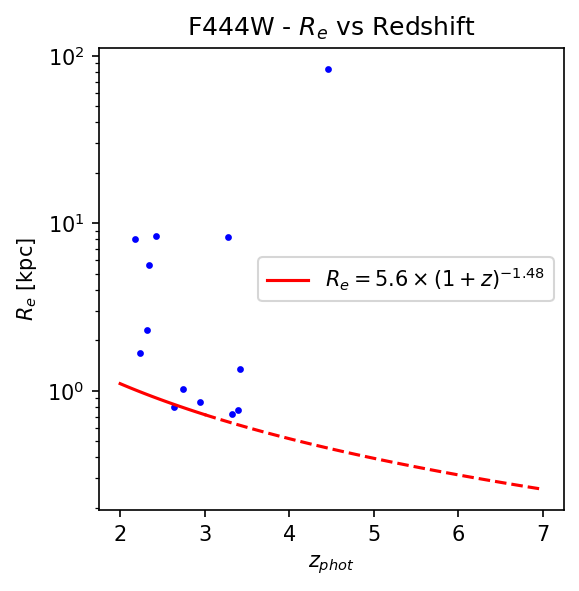

In [26]:
up = np.log10(5e10) + 0.1
low = np.log10(5e10) - 0.1

idx_tes_aja = np.where((mass_pixedfit3[:,1][(pet3_444[:, 0]-1).astype(int)] < up) &  (mass_pixedfit3[:,1][(pet3_444[:, 0]-1).astype(int)] > low))

idx_tes_aja

def Re(z):
    return 5.6 * (1+z)**(-1.48)

x1 = np.linspace(2,3,100)
x2 = np.linspace(3,7,100)

plt.figure(figsize=(4, 4), dpi=150)

plt.scatter(z_sel3[(pet3_444[:, 0]-1).astype(int)][idx_tes_aja], Re3_petrofit_444[idx_tes_aja], s=5, c='blue')
plt.plot(x1,Re(x1), c = 'red', label = r'$R_e = 5.6 \times (1+z)^{-1.48}$')
plt.plot(x2,Re(x2), c = 'red', linestyle = '--')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.legend()
plt.title(r'F444W - $R_e$ vs Redshift')

In [27]:
result2_petrofit_200 = np.loadtxt('petrofit_results_ceers_f200w.txt')

exclude = [17065, 54032, 59696, 69561, 59471, 62469, 23624, 3520, 67257, 15282, 7027, 15229, 10275, 69489, 7556]

# f200w
pet2_200 = []

for i in result2_petrofit_200:
    if (i[1] in idx_qui_final2) and (i[1] not in exclude):
        pet2_200.append(i)
        
pet2_200 = np.array(pet2_200)

result2_petrofit_444 = np.loadtxt('petrofit_results_ceers_f444w.txt')

# f444w
pet2_444 = []

for i in result2_petrofit_444:
    if (i[1] in idx_qui_final2) and (i[1] not in exclude):
        pet2_444.append(i)
        
pet2_444 = np.array(pet2_444)

Re2_petrofit_200 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel2[(pet2_200[:, 0]-1).astype(int)], (pet2_200[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)
Re2_petrofit_444 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel2[(pet2_444[:, 0]-1).astype(int)], (pet2_444[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)


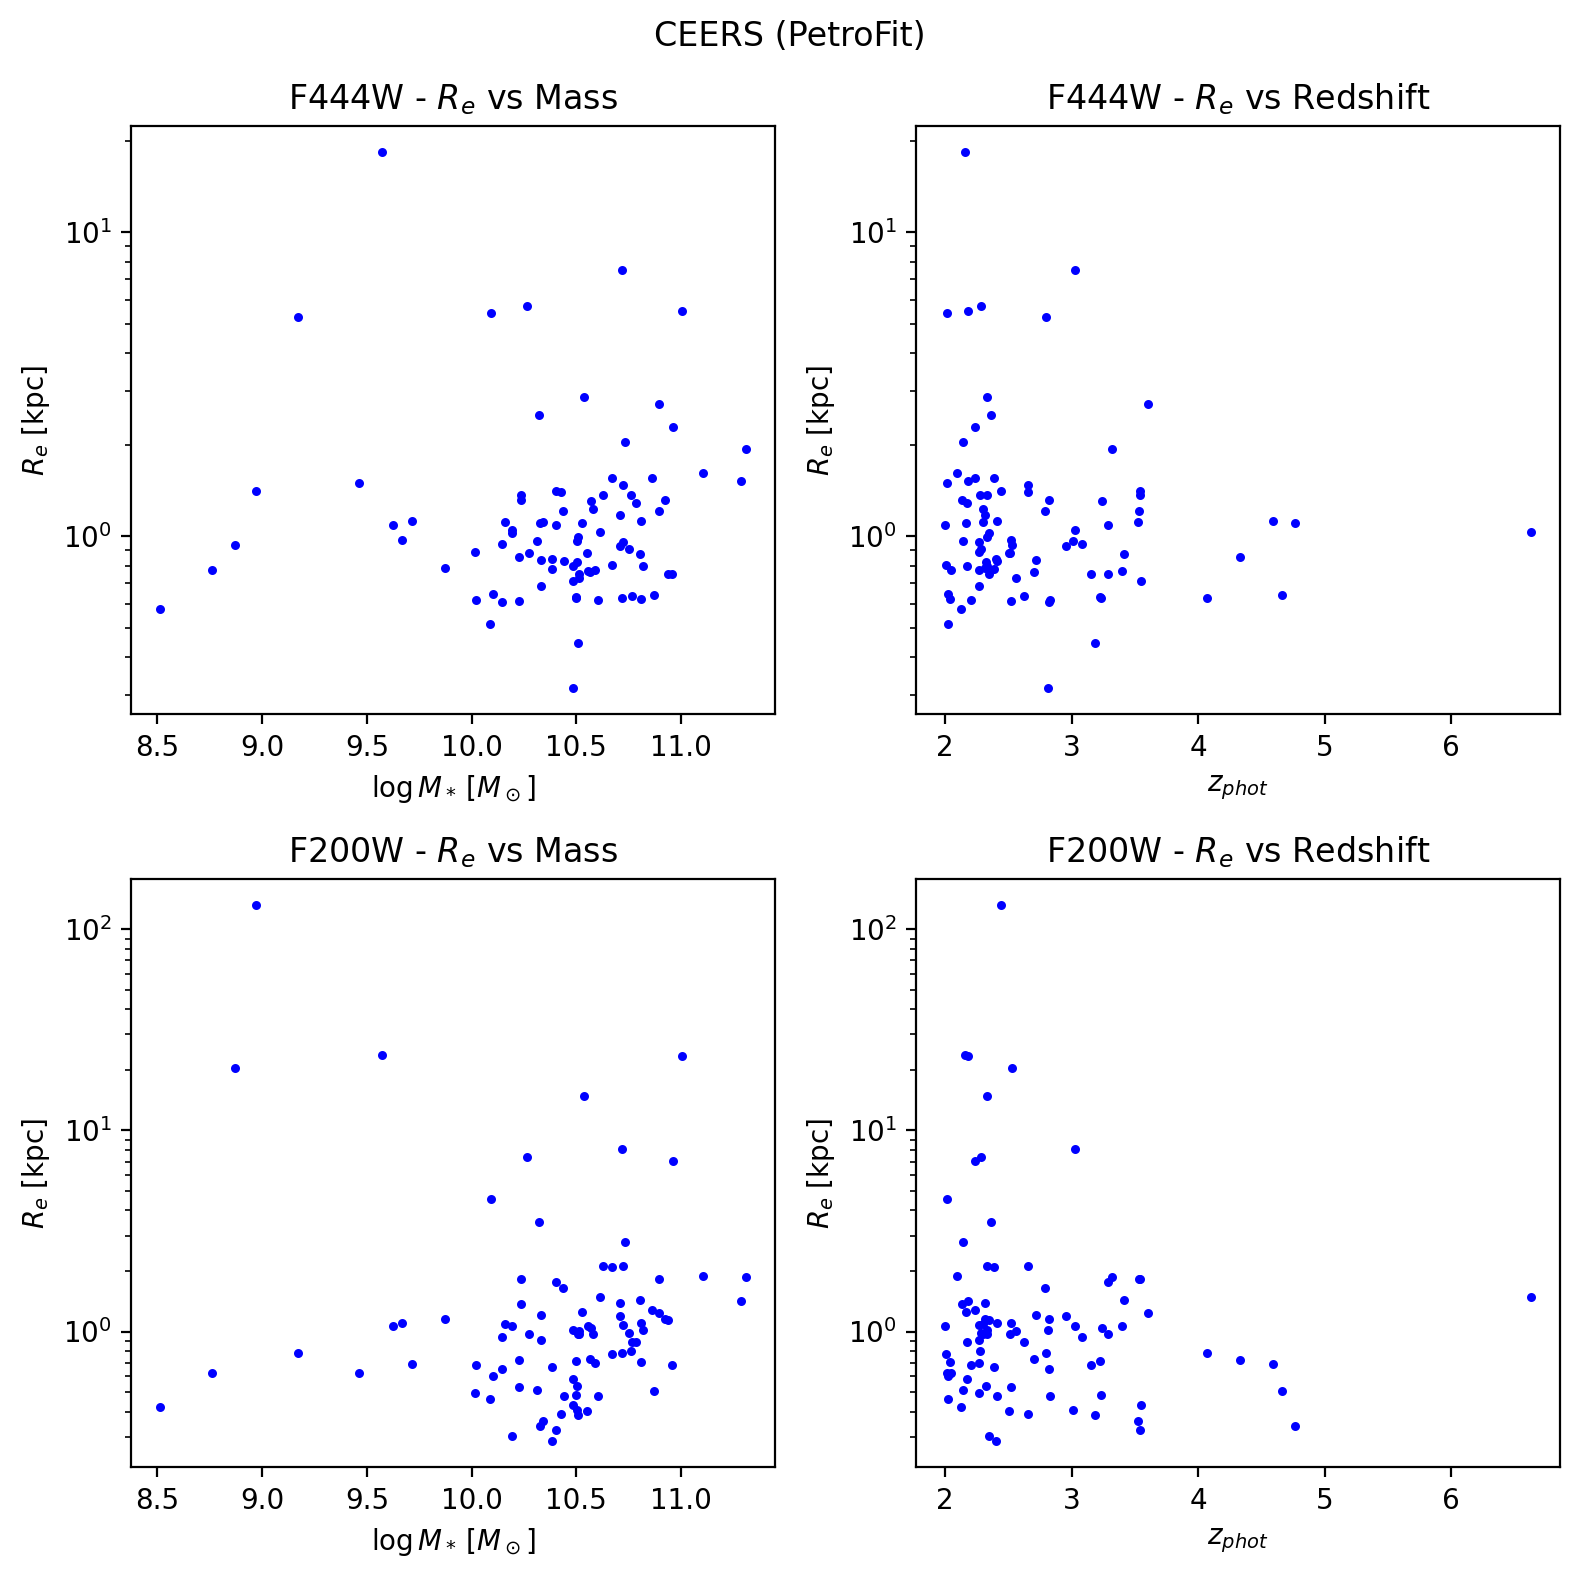

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already loaded data into mass_pixedfit4, Re4_444, z_sel4, Re4_200, gal_result4_200

# Create a single figure for F444W and F200W
plt.figure(figsize=(8, 8), dpi=200)
plt.suptitle('CEERS (PetroFit)')

# F444W Subplots

# Subplot 1
plt.subplot(2, 2, 1)
plt.scatter(mass_pixedfit2[:, 1][(pet2_444[:, 0]-1).astype(int)], Re2_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Mass')

# Subplot 2
plt.subplot(2, 2, 2)
plt.scatter(z_sel2[(pet2_444[:, 0]-1).astype(int)], Re2_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Redshift')

# F200W Subplots

# Subplot 3
plt.subplot(2, 2, 3)
plt.scatter(mass_pixedfit2[:, 1][(pet2_200[:, 0]-1).astype(int)], Re2_petrofit_200, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F200W - $R_e$ vs Mass')

# Subplot 4
plt.subplot(2, 2, 4)
plt.scatter(z_sel2[(pet2_200[:, 0]-1).astype(int)], Re2_petrofit_200, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F200W - $R_e$ vs Redshift')

plt.tight_layout()  # Adjust layout to prevent overlapping

# Save the combined plot as a PNG file
plt.savefig('CEERS_PetroFit.png')

plt.show()


Text(0.5, 1.0, 'F444W - $R_e$ vs Redshift')

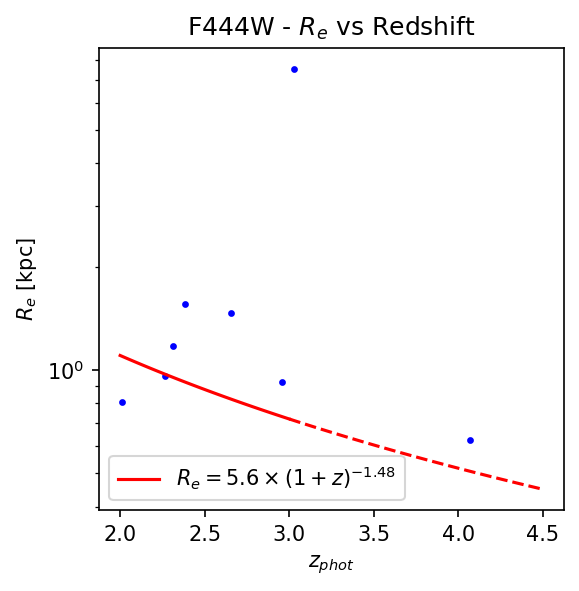

In [29]:
up = np.log10(5e10) + 0.03
low = np.log10(5e10) - 0.03

idx_tes_aja = np.where((mass_pixedfit2[:,1][(pet2_444[:, 0]-1).astype(int)] < up) &  (mass_pixedfit2[:,1][(pet2_444[:, 0]-1).astype(int)] > low))

idx_tes_aja

def Re(z):
    return 5.6 * (1+z)**(-1.48)

x1 = np.linspace(2,3,100)
x2 = np.linspace(3,4.5,100)

plt.figure(figsize=(4, 4), dpi=150)

plt.scatter(z_sel2[(pet2_444[:, 0]-1).astype(int)][idx_tes_aja], Re2_petrofit_444[idx_tes_aja], s=5, c='blue')
plt.plot(x1,Re(x1), c = 'red', label = r'$R_e = 5.6 \times (1+z)^{-1.48}$')
plt.plot(x2,Re(x2), c = 'red', linestyle = '--')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.legend()
plt.title(r'F444W - $R_e$ vs Redshift')

In [30]:
result1_petrofit_150 = np.loadtxt('petrofit_results_cosweb_f150w.txt')

exclude = [258, 24897, 13551, 7363, 18558, 22648, 6606, 22751, 8927, 13067]
# f200w
pet1_150 = []

for i in result1_petrofit_150:
    if (i[1] in idx_qui_final1) and (i[1] not in exclude):
        pet1_150.append(i)
        
pet1_150 = np.array(pet1_150)

result1_petrofit_444 = np.loadtxt('petrofit_results_cosweb_f444w.txt')

# f444w
pet1_444 = []

for i in result1_petrofit_444:
    if (i[1] in idx_qui_final1) and (i[1] not in exclude):
        pet1_444.append(i)
        
pet1_444 = np.array(pet1_444)

Re1_petrofit_150 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel1[(pet1_150[:, 0]-1).astype(int)], (pet1_150[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)
Re1_petrofit_444 = piXedfit.piXedfit_images.kpc_per_pixel(z_sel1[(pet1_444[:, 0]-1).astype(int)], (pet1_444[:,3]*0.04), cosmo='flat_LCDM', H0=70.0, Om0=0.3)


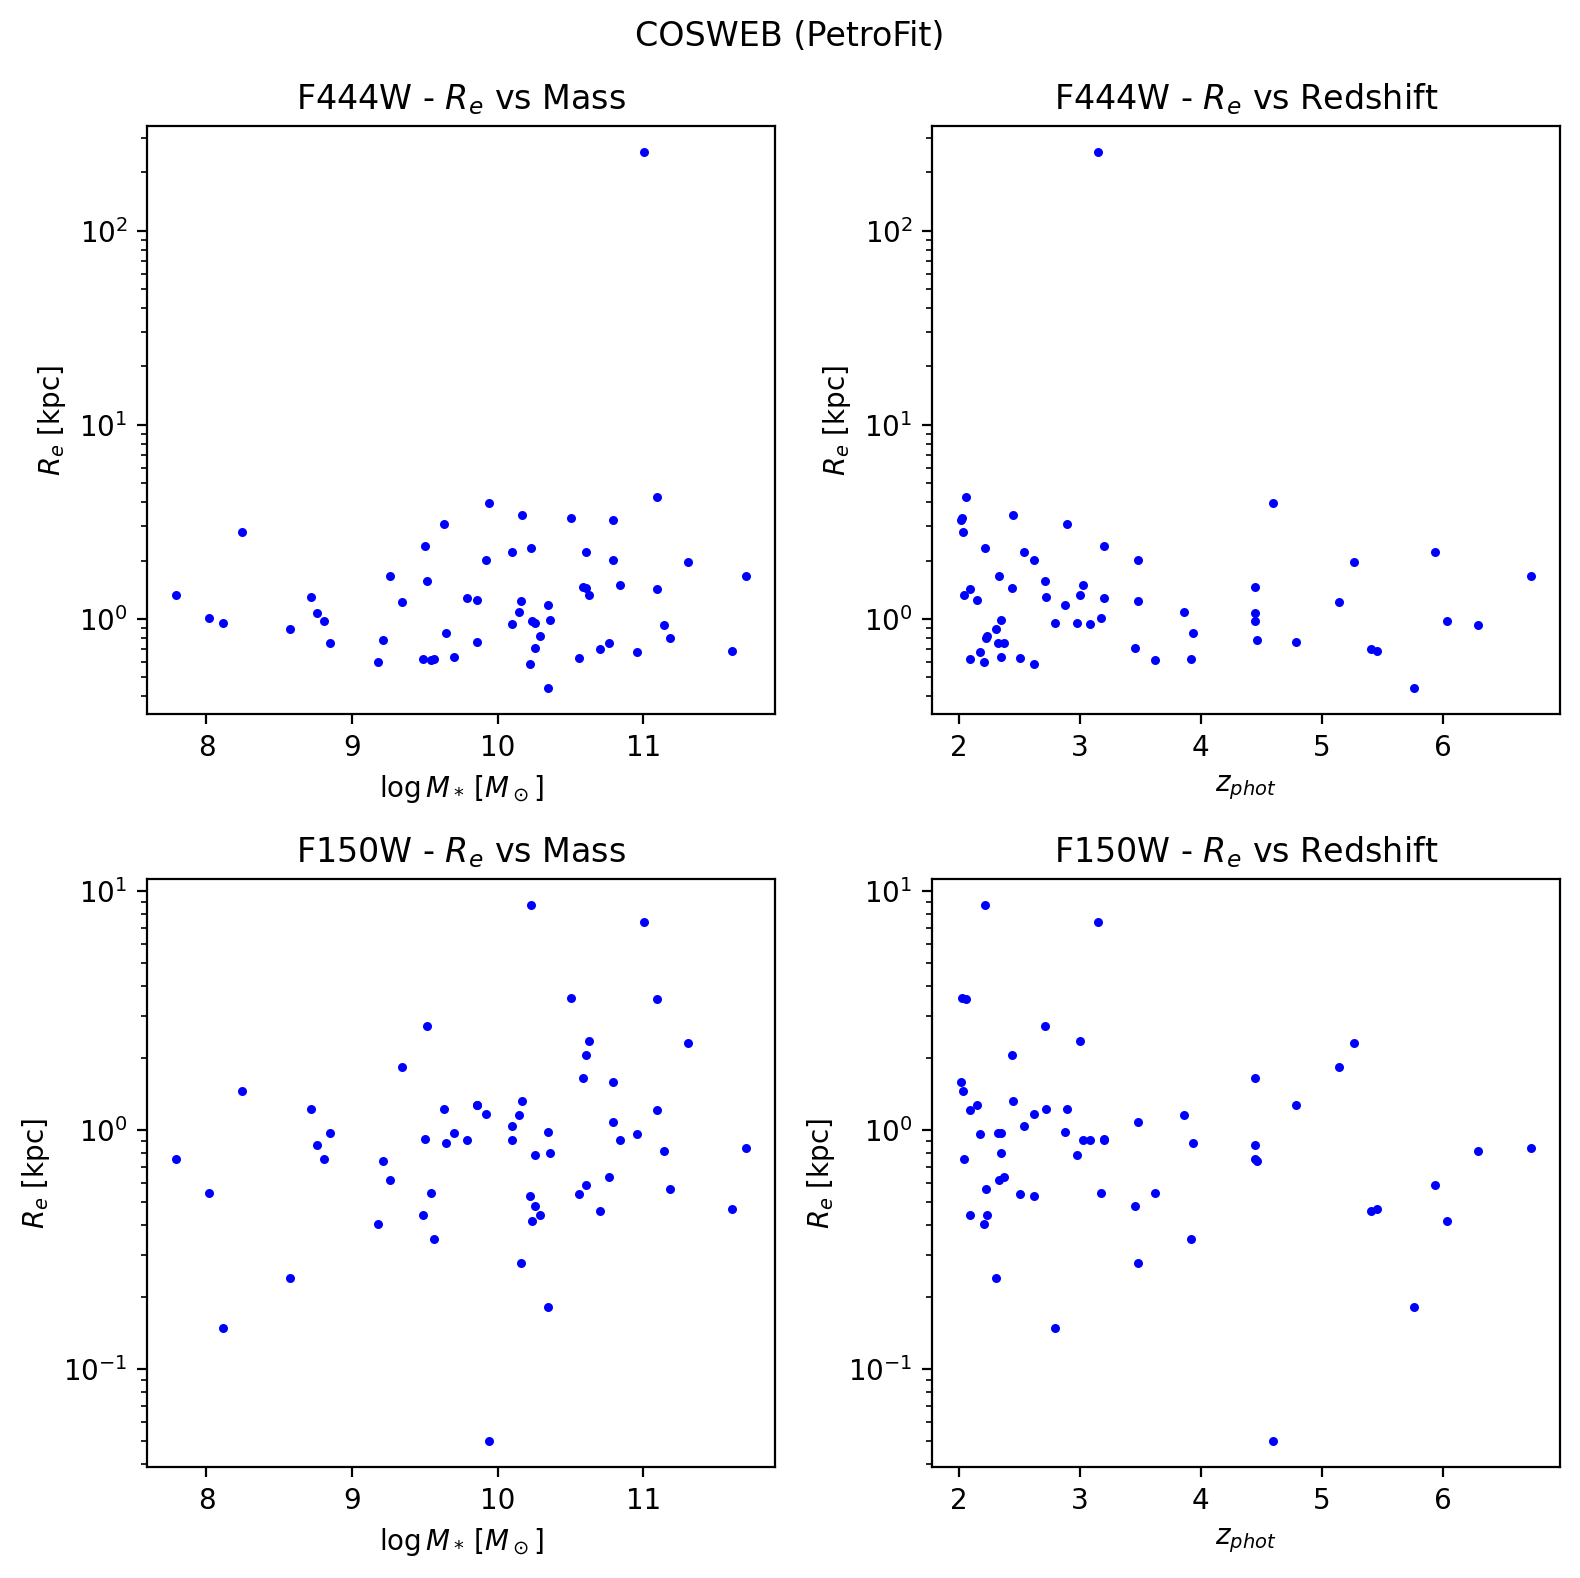

In [31]:
import matplotlib.pyplot as plt

# Assuming you have already loaded data into mass_pixedfit4, Re4_444, z_sel4, Re4_200, gal_result4_200

# Create a single figure for F444W and F200W
plt.figure(figsize=(8, 8), dpi=200)
plt.suptitle('COSWEB (PetroFit)')

# F444W Subplots

# Subplot 1
plt.subplot(2, 2, 1)
plt.scatter(mass_pixedfit1[:, 1][(pet1_444[:, 0]-1).astype(int)], Re1_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Mass')

# Subplot 2
plt.subplot(2, 2, 2)
plt.scatter(z_sel1[(pet1_444[:, 0]-1).astype(int)], Re1_petrofit_444, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F444W - $R_e$ vs Redshift')

# F200W Subplots

# Subplot 3
plt.subplot(2, 2, 3)
plt.scatter(mass_pixedfit1[:, 1][(pet1_150[:, 0]-1).astype(int)], Re1_petrofit_150, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$\log{M_*\: [M_\odot]}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F150W - $R_e$ vs Mass')

# Subplot 4
plt.subplot(2, 2, 4)
plt.scatter(z_sel1[(pet1_150[:, 0]-1).astype(int)], Re1_petrofit_150, s=5, c='blue')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.title(r'F150W - $R_e$ vs Redshift')

plt.tight_layout()  # Adjust layout to prevent overlapping

# Save the combined plot as a PNG file
plt.savefig('COSWEB_PetroFit.png')

plt.show()


Text(0.5, 1.0, 'F444W - $R_e$ vs Redshift')

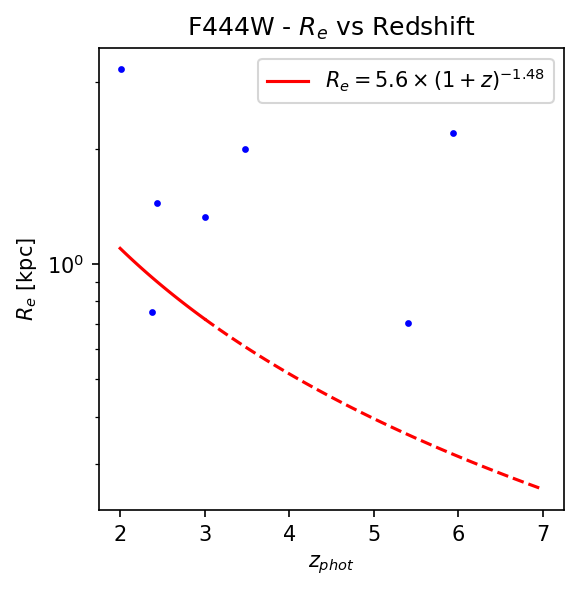

In [32]:
up = np.log10(5e10) + 0.1
low = np.log10(5e10) - 0.1

idx_tes_aja = np.where((mass_pixedfit1[:,1][(pet1_444[:, 0]-1).astype(int)] < up) &  (mass_pixedfit1[:,1][(pet1_444[:, 0]-1).astype(int)] > low))

idx_tes_aja

def Re(z):
    return 5.6 * (1+z)**(-1.48)

x1 = np.linspace(2,3,100)
x2 = np.linspace(3,7,100)

plt.figure(figsize=(4, 4), dpi=150)

plt.scatter(z_sel1[(pet1_444[:, 0]-1).astype(int)][idx_tes_aja], Re1_petrofit_444[idx_tes_aja], s=5, c='blue')
plt.plot(x1,Re(x1), c = 'red', label = r'$R_e = 5.6 \times (1+z)^{-1.48}$')
plt.plot(x2,Re(x2), c = 'red', linestyle = '--')
#plt.ylim(0, 3)
plt.yscale('log')
plt.xlabel(r'$z_{phot}$')
plt.ylabel(r'$R_e$ [kpc]')
plt.legend()
plt.title(r'F444W - $R_e$ vs Redshift')

In [44]:
m_bulan = 7.35e22
m_ast = 1e18
r_bulan = 1737000
v_ast = 15000
om_bulan = 2*np.pi/(27.322*24*3600)

om = ((2/5) * m_bulan * r_bulan * om_bulan - m_ast * v_ast * np.sqrt(3)/2 ) / ((2/5) * (m_bulan + m_ast) * r_bulan)
p = 2*np.pi/(om*24*3600)

In [45]:
p

30.20948942097453